### Problem Statement:

The market for logistics analytics is expected to develop at a CAGR of 17.3 percent
from 2019 to 2024, more than doubling in size. This data demonstrates how logistics
organizations are understanding the advantages of being able to predict what will
happen in the future with a decent degree of certainty. Logistics leaders may use this
data to address supply chain difficulties, cut costs, and enhance service levels all at the
same time.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set()

In [2]:
# Logging operation

#logging.basicConfig(filename='Development_logs.log', level=logging.INFO, format='%(levelname)s:%(asctime)s:%(message)s')

In [3]:
# importing dataset

df = pd.read_csv(r'C:\Users\sushi\Data Science\iNeuron\Internship project\Consignment Pricing\Consignment_Pricing\Dataset/SCMS_Delivery_History_Dataset.csv')

df.head(10)

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   
5  23   112-NG-T01  Pre-PQ Process   SCMS-87   ASN-57        Nigeria   
6  44   110-ZM-T01  Pre-PQ Process  SCMS-139  ASN-130         Zambia   
7  45   109-TZ-T01  Pre-PQ Process  SCMS-140   ASN-94       Tanzania   
8  46   112-NG-T01  Pre-PQ Process  SCMS-156   ASN-93        Nigeria   
9  47   110-ZM-T01  Pre-PQ Process  SCMS-165  ASN-199         Zambia   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              EXW           Air   
2   PMO - US  Direct Drop              FCA           Air   
3   PMO - US  Direct Drop              EXW           Air   
4   PMO - US  Direct Drop              EXW           Air   
5   PMO - US  Direct Drop              EXW           Air   
6   PMO - US  Direct Drop              DDU           Air   
7   PMO - US  Direct Drop              EXW           Air   
8   PMO - US  Direct Drop              EXW           Air   
9   PMO - US  Direct Drop              CIP           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured               02-Jun-06   
1               Pre-PQ Process      Date Not Captured               14-Nov-06   
2               Pre-PQ Process      Date Not Captured               27-Aug-06   
3               Pre-PQ Process      Date Not Captured               01-Sep-06   
4               Pre-PQ Process      Date Not Captured               11-Aug-06   
5               Pre-PQ Process      Date Not Captured               28-Sep-06   
6               Pre-PQ Process      Date Not Captured               08-Jan-07   
7               Pre-PQ Process      Date Not Captured               24-Nov-06   
8               Pre-PQ Process      Date Not Captured               07-Dec-06   
9               Pre-PQ Process               11/13/06               30-Jan-07   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0                02-Jun-06              02-Jun-06          HRDT   
1                14-Nov-06              14-Nov-06           ARV   
2                27-Aug-06              27-Aug-06          HRDT   
3                01-Sep-06              01-Sep-06           ARV   
4                11-Aug-06              11-Aug-06           ARV   
5                28-Sep-06              28-Sep-06           ARV   
6                08-Jan-07              08-Jan-07           ARV   
7                24-Nov-06              24-Nov-06           ARV   
8                07-Dec-06              07-Dec-06           ARV   
9                30-Jan-07              30-Jan-07           ARV   

  Sub Classification                                             Vendor  \
0           HIV test                        RANBAXY Fine Chemicals LTD.   
1          Pediatric                           Aurobindo Pharma Limited   
2           HIV test                               Abbott GmbH & Co. KG   
3              Adult  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4              Adult                           Aurobindo Pharma Limited   
5          Pediatric                           Aurobindo Pharma Limited   
6          Pediatric  MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK ...   
7              Adult                           Aurobindo Pharma Limited   
8              Adult                           Aurobindo Pharma Limited   
9              Adult    ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibod

In [4]:
# checking the dimensions of the dataframe

df.shape

(10324, 33)

In [5]:
# Checking missing value in dataset

df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [6]:
# Checking the statistical aspects of the dataframe

df.describe()

ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000      0.000000                   0.000000  
25%       4.314593e+03      4.120000      0.080000                   6.510000  
50%       3.047147e+04      9.300000      0.160000                  47.040000  
75%       1.664471e+05     23.592500      0.470000                 252.400000  
max       5.951990e+06   1345.640000    238.650000                7708.440000

In [7]:
# Checking type and value count of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [8]:
# Logging operation

logging.info('model checks are done')

### Data Checks and Data Cleaning

In [9]:
# Checking categorical columns

cat_col= df.select_dtypes(include='object')
print(cat_col.columns)
print(len(cat_col.columns))

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')
26


In [10]:
# Checking numerical columns

num_col= df.select_dtypes(exclude='object')
print(num_col.columns)
print(len(num_col.columns))

Index(['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price',
       'Line Item Insurance (USD)'],
      dtype='object')
7


In [11]:
# Checking for missing value

df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [12]:
# Checking for missing value percentage

100*(df.isnull().sum()/len(df))

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

### Missing Value treatment: Column `Shipment Mode`

In [13]:
# Missing value treatment for columns- Shipment Mode 

df['Shipment Mode'].value_counts(dropna=False)

Air            6113
Truck          2830
Air Charter     650
Ocean           371
NaN             360
Name: Shipment Mode, dtype: int64

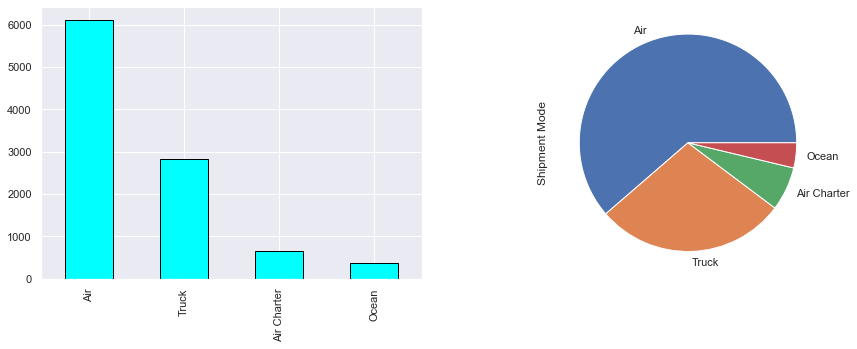

In [14]:
# Plotting barplot for levels 

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Shipment Mode'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Shipment Mode'].value_counts().plot.pie()
plt.show()

In [15]:
# Replacing missing value as level 'Other_Mode'

df['Shipment Mode'] = df['Shipment Mode'].fillna('Other_Mode')

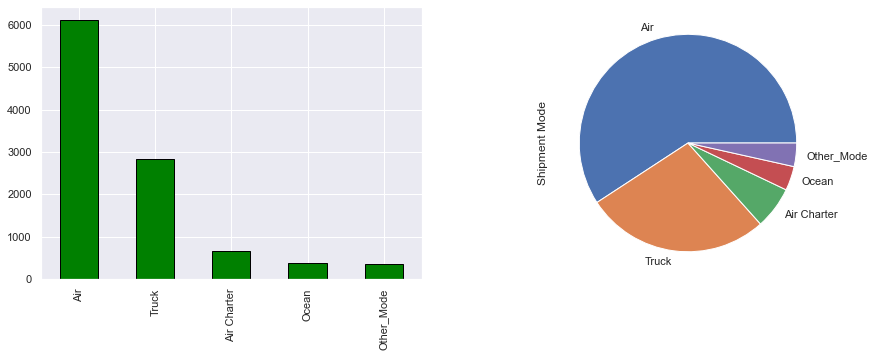

In [16]:
# Checking column again

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Shipment Mode'].value_counts().plot.bar(color= 'Green',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Shipment Mode'].value_counts().plot.pie()
plt.show()

### Shipment Mode: Column `Dosage`

In [17]:
# Missing value treatment for column- Dosage

df['Dosage'].value_counts(dropna=False)

NaN                1736
300mg               990
200mg               932
600mg               772
150/300mg           600
150/300/200mg       580
10mg/ml             552
150mg               431
200/50mg            395
300/300mg           301
600/300/300mg       286
150/200/30mg        250
100mg               228
50mg                174
200/300mg           160
80/20mg/ml          158
400mg               156
20mg/ml             152
30mg                144
600/200/300mg       139
150/30mg            133
30/50/60mg          127
300/200mg            94
30/60mg              89
250mg                88
60/30mg              73
100/25mg             73
600/300mg            63
300/100mg            54
1mg/ml               54
20mg                 43
25mg                 39
15mg                 38
30mg/ml              33
300/150/300mg        28
30/50/6mg            19
30/6mg               14
500/25mg             13
80mg/ml              13
60/100/12mg          12
20/120mg             12
2g              

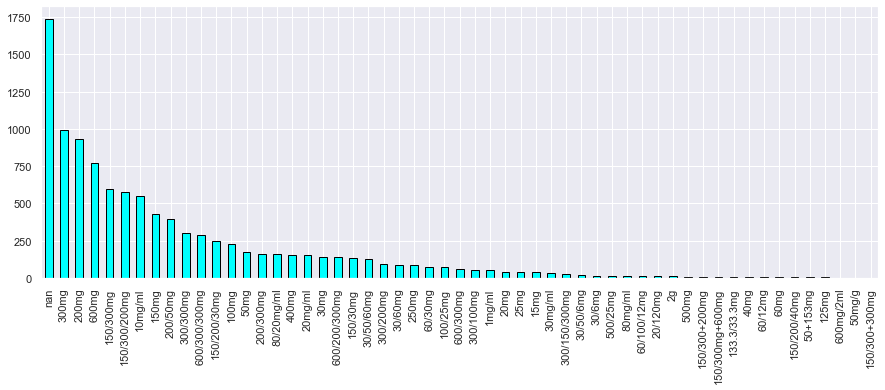

In [18]:
# Plotting barplot for levels 
plt.figure(figsize=(15,5))
df['Dosage'].value_counts(dropna=False).plot.bar(color= 'Cyan',edgecolor='Black')
plt.show()

#### Dropping Dosage column as maximum values are missing and number of levels will only increase computing.

In [19]:
df = df.drop('Dosage',axis = 1)

### Shipment Mode: Column `Line Item Insurance (USD)`

In [20]:
# Checking missing values
df['Line Item Insurance (USD)'].value_counts(dropna=False)

NaN        287
0.00        54
0.02        37
0.07        33
0.05        30
0.06        30
0.01        26
0.03        23
0.09        21
0.08        20
0.49        18
0.24        18
0.13        18
0.12        18
0.15        18
0.26        18
0.14        17
0.44        17
0.34        16
0.29        15
0.38        15
0.19        15
0.17        15
342.39      15
0.10        15
0.28        15
0.25        15
0.42        15
0.04        14
0.30        14
0.18        14
0.31        13
5.12        13
0.20        13
330.00      13
0.51        12
0.54        12
0.96        12
0.35        12
0.99        11
0.23        11
1.03        11
0.82        11
0.71        11
0.52        11
0.16        11
36.96       10
0.64        10
31.36       10
0.57        10
320.00      10
0.41        10
0.67        10
1.10        10
0.22        10
0.72         9
0.60         9
0.46         9
1.16         9
0.89         9
2.96         9
1.92         9
0.37         9
0.11         9
0.86         9
440.92       8
0.33      

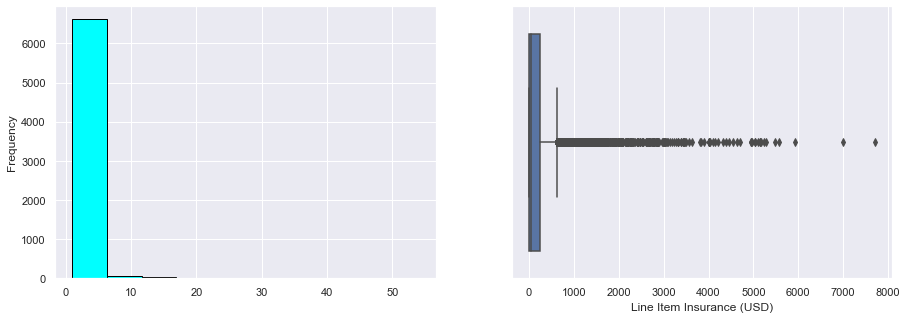

In [21]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Line Item Insurance (USD)'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Line Item Insurance (USD)'])
plt.show()

In [22]:
# Checking statistical aspects of column

df['Line Item Insurance (USD)'].describe()

count    10037.000000
mean       240.117626
std        500.190568
min          0.000000
25%          6.510000
50%         47.040000
75%        252.400000
max       7708.440000
Name: Line Item Insurance (USD), dtype: float64

In [23]:
# Checking missing value present in the column

df['Line Item Insurance (USD)'].isnull().sum()

287

In [24]:
# Replacing missing values with the median value of column

mid_insurance = df['Line Item Insurance (USD)'].median()

df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(mid_insurance)

In [25]:
# Checking missing value present in the column again

df['Line Item Insurance (USD)'].isnull().sum()

0

In [26]:
# Checking for missing value in dataframe again

df.isnull().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Designation          0
Weight (Kilogr

In [27]:
# Logging operation

#logging.info('Missing value treatment done.')

## Data Cleaning & Visualization:

In [28]:
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              EXW           Air   
2   PMO - US  Direct Drop              FCA           Air   
3   PMO - US  Direct Drop              EXW           Air   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured               02-Jun-06   
1               Pre-PQ Process      Date Not Captured               14-Nov-06   
2               Pre-PQ Process      Date Not Captured               27-Aug-06   
3               Pre-PQ Process      Date Not Captured               01-Sep-06   
4               Pre-PQ Process      Date Not Captured               11-Aug-06   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0                02-Jun-06              02-Jun-06          HRDT   
1                14-Nov-06              14-Nov-06           ARV   
2                27-Aug-06              27-Aug-06          HRDT   
3                01-Sep-06              01-Sep-06           ARV   
4                11-Aug-06              11-Aug-06           ARV   

  Sub Classification                                             Vendor  \
0           HIV test                        RANBAXY Fine Chemicals LTD.   
1          Pediatric                           Aurobindo Pharma Limited   
2           HIV test                               Abbott GmbH & Co. KG   
3              Adult  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4              Adult                           Aurobindo Pharma Limited   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                 Lamivudine 150mg, tablets, 60 Tabs   
4                  Stavudine 30mg, capsules, 60 Caps   

                         Molecule/Test Type      Brand      Dosage Form  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal         Test kit   
1                                Nevirapine    Generic  Oral suspension   
2       HIV 1/2, Determine Complete HIV Kit  Determine         Test kit   
3                                Lamivudine    Generic           Tablet   
4                                 Stavudine    Generic          Capsule   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price             Manufacturing Site  \
0       29.00        0.97     Ranbaxy Fine Chemicals LTD   
1        6.20        0.03      Aurobindo Unit III, India   
2       80.00        0.80  ABBVIE GmbH & Co.KG Wiesbaden   
3        3.99        0.07  Ranbaxy, Paonta Shahib, India   
4        3.20        0.05      Aurobindo Unit III, India   

  First Line Designation Weight (Kilograms) Freight Cost (USD)  \
0                    Yes                 13             780.34   
1                    Yes                358             4521.5   
2                    Yes                171            1653.78   
3                    Yes          

In [29]:
# Dropping Columns - ID and Project code

df = df.drop(['ID', 'Project Code'], axis= 1)

In [30]:
df.head()

PQ # PO / SO # ASN/DN #        Country Managed By  Fulfill Via  \
0  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   PMO - US  Direct Drop   
1  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   PMO - US  Direct Drop   
2  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   PMO - US  Direct Drop   
3  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   PMO - US  Direct Drop   
4  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   PMO - US  Direct Drop   

  Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0              EXW           Air               Pre-PQ Process   
1              EXW           Air               Pre-PQ Process   
2              FCA           Air               Pre-PQ Process   
3              EXW           Air               Pre-PQ Process   
4              EXW           Air               Pre-PQ Process   

  PO Sent to Vendor Date Scheduled Delivery Date Delivered to Client Date  \
0      Date Not Captured               02-Jun-06                02-Jun-06   
1      Date Not Captured               14-Nov-06                14-Nov-06   
2      Date Not Captured               27-Aug-06                27-Aug-06   
3      Date Not Captured               01-Sep-06                01-Sep-06   
4      Date Not Captured               11-Aug-06                11-Aug-06   

  Delivery Recorded Date Product Group Sub Classification  \
0              02-Jun-06          HRDT           HIV test   
1              14-Nov-06           ARV          Pediatric   
2              27-Aug-06          HRDT           HIV test   
3              01-Sep-06           ARV              Adult   
4              11-Aug-06           ARV              Adult   

                                              Vendor  \
0                        RANBAXY Fine Chemicals LTD.   
1                           Aurobindo Pharma Limited   
2                               Abbott GmbH & Co. KG   
3  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4                           Aurobindo Pharma Limited   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                 Lamivudine 150mg, tablets, 60 Tabs   
4                  Stavudine 30mg, capsules, 60 Caps   

                         Molecule/Test Type      Brand      Dosage Form  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal         Test kit   
1                                Nevirapine    Generic  Oral suspension   
2       HIV 1/2, Determine Complete HIV Kit  Determine         Test kit   
3                                Lamivudine    Generic           Tablet   
4                                 Stavudine    Generic          Capsule   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price             Manufacturing Site  \
0       29.00        0.97     Ranbaxy Fine Chemicals LTD   
1        6.20        0.03      Aurobindo Unit III, India   
2       80.00        0.80  ABBVIE GmbH & Co.KG Wiesbaden   
3        3.99        0.07  Ranbaxy, Paonta Shahib, India   
4        3.20        0.05      Aurobindo Unit III, India   

  First Line Designation Weight (Kilograms) Freight Cost (USD)  \
0                    Yes                 13             780.34   
1                    Yes                358             4521.5   
2                    Yes                171            1653.78   
3                    Yes               1855           16007.06   
4                    Yes               7590           45450.08   

   Line Item 

### Data Cleaning & Visualization - column`PQ #`

In [31]:
# Checking column 'PQ #' i.e. Price Quote(PQ) number

df['PQ #'].value_counts()

Pre-PQ Process    2681
FPQ-14942          205
FPQ-12522          154
FPQ-13973          110
FPQ-4537            98
FPQ-8840            90
FPQ-7175            78
FPQ-5303            78
FPQ-6262            75
FPQ-5023            70
FPQ-11828           57
FPQ-8464            48
FPQ-9432            42
FPQ-15569           42
FPQ-6708            39
FPQ-13035           39
FPQ-4384            38
FPQ-12800           35
FPQ-8952            35
FPQ-5648            34
FPQ-5925            33
FPQ-7053            33
FPQ-4378            33
FPQ-3560            33
FPQ-15038           33
FPQ-11022           33
FPQ-9749            31
FPQ-16001           30
FPQ-13123           29
FPQ-14226           28
FPQ-15692           27
FPQ-13214           27
FPQ-3815            27
FPQ-14370           27
FPQ-12587           27
FPQ-13142           27
FPQ-14989           27
FPQ-5688            26
FPQ-14396           26
FPQ-14895           26
FPQ-15294           25
FPQ-12456           24
FPQ-11033           24
FPQ-10811  

#### Considering Field Notes " Pre-PQ Process" indicates deliveries that occurred before the PQ process was put in place in mid-2009.
- Creating only two levels as "Pre-PQ Process" and "Post-PQ Process".

In [32]:
# Creating only two levels as "Pre-PQ Process" and "Post-PQ Process".

def two_level(x):
    if x == 'Pre-PQ Process':
        return 'Pre-PQ Process'
    else:
        return 'Post-PQ Process'
    
df['PQ #'] = df['PQ #'].apply(two_level)

In [33]:
# Checking value counts

df['PQ #'].value_counts()

Post-PQ Process    7643
Pre-PQ Process     2681
Name: PQ #, dtype: int64

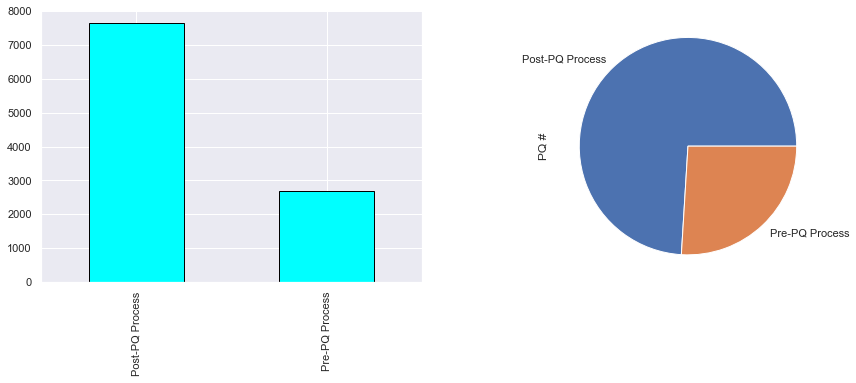

In [34]:
# Plotting values
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['PQ #'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['PQ #'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column`PO /SO #`

In [35]:
# Checking column 'PO /SO #' i.e. Order number: Purchase order (PO) for Direct Drop deliveries, or Sales Order (SO) 
# for from Regional Delivery Center (RDC) deliveries

df['PO / SO #'].value_counts()

SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
SCMS-259079    33
SCMS-215410    26
SCMS-23500     26
SCMS-259078    20
SCMS-162440    20
SCMS-19800     18
SCMS-16600     18
SCMS-272160    17
SCMS-71370     17
SCMS-259072    17
SO-298         17
SCMS-259074    17
SCMS-238555    17
SCMS-238550    17
SCMS-259077    16
SCMS-238554    16
SCMS-295800    16
SCMS-196561    16
SCMS-14050     16
SCMS-267020    16
SCMS-238552    15
SCMS-33320     15
SCMS-60170     15
SCMS-259073    15
SCMS-41190     15
SCMS-280210    15
SCMS-280220    15
SCMS-199280    15
SCMS-259071    15
SCMS-272170    14
SCMS-54980     14
SCMS-238551    14
SCMS-238553    14
SCMS-28830     14
SCMS-253260    14
SCMS-41140     13
SO-44400       13
SCMS-83790     13
SCMS-238556    13
SCMS-83770     12
SO-1039        12
SCMS-259076    12
SCMS-204300    11
SCMS-83830     11
SO-47630       11
SCMS-240830    11
SCMS-68980     11
SO-37150       11
SCMS-239410    11
SCMS-224840    10
SCMS-26070

#### Removing numbers from Purchase Order or Sales Order and keeping only order type level.

In [36]:
# Removing numbers from Purchase Order or Sales Order and keeping only order type level.

def red_order(x):
    x_split = x.split("-")
    x_return = x_split[0]
    return x_return

In [37]:
# Applying function

df['PO / SO #'] = df['PO / SO #'].apply(red_order)

In [38]:
# Checking value counts

df['PO / SO #'].value_counts(dropna=False)

SO      5404
SCMS    4919
DSCM       1
Name: PO / SO #, dtype: int64

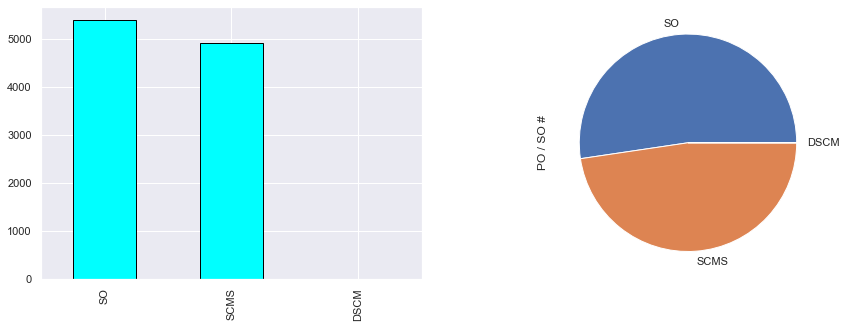

In [39]:
# Plotting values
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['PO / SO #'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['PO / SO #'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column `ASN/DN #`

In [40]:
# Checking column 'ASN/DN #' i.e. Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, 
# or Delivery Note (DN) for from RDC deliveries

df['ASN/DN #'].value_counts()

ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
DN-304       17
ASN-28036    17
ASN-30792    17
ASN-28034    17
ASN-28033    17
ASN-1520     16
ASN-29764    16
ASN-7373     16
ASN-28037    16
ASN-1665     16
ASN-2293     16
ASN-24433    15
ASN-27978    15
ASN-27979    15
ASN-27980    15
ASN-3732     15
ASN-31750    15
ASN-27976    15
ASN-1251     15
ASN-32231    15
ASN-3553     14
ASN-29257    14
ASN-28279    14
ASN-33852    14
ASN-30671    14
ASN-31070    14
ASN-30377    14
ASN-26882    14
ASN-28021    14
ASN-33851    13
ASN-3752     13
ASN-33865    13
ASN-32122    13
ASN-31854    13
DN-3015      13
ASN-33470    13
ASN-33477    12
ASN-29597    12
DN-3561      11
ASN-32524    11
DN-2035      11
ASN-26738    11
ASN-5933     10
DN-2981      10
ASN-5373     10
DN-2812      10
DN-3843      10
ASN-3607     10
ASN-24721    10
ASN-28627    10
ASN-2503     10
DN-332       10
DN-2090       9
DN-2025       9
DN-1311       9
DN-3017       9
DN-373        9
DN-475        9
DN-1982 

#### Removing numbers from Shipment number keeping only order type level.

In [41]:
# Removing numbers from Shipment number keeping only order type level.

df['ASN/DN #'] = df['ASN/DN #'].apply(red_order)

In [42]:
# Checking value counts

df['ASN/DN #'].value_counts(dropna=False)

DN     5404
ASN    4920
Name: ASN/DN #, dtype: int64

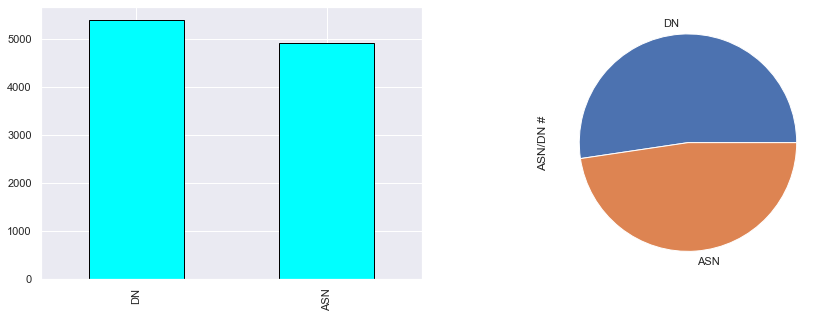

In [43]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['ASN/DN #'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['ASN/DN #'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column`Country`

In [44]:
# Checking value counts of each level in column 'Country'

df['Country'].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Lesotho                  4
Sierra Leone             4
Afghanistan              3
Senegal                  3
T

In [45]:
other_country = df['Country'].value_counts().to_dict()
other_cat = []
for k,v in other_country.items():
    if v < 30:
        other_cat.append(k)

In [46]:
df['Country'] = df['Country'].replace(other_cat, 'other')

In [47]:
df['Country'].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
other                  128
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Name: Country, dtype: int64

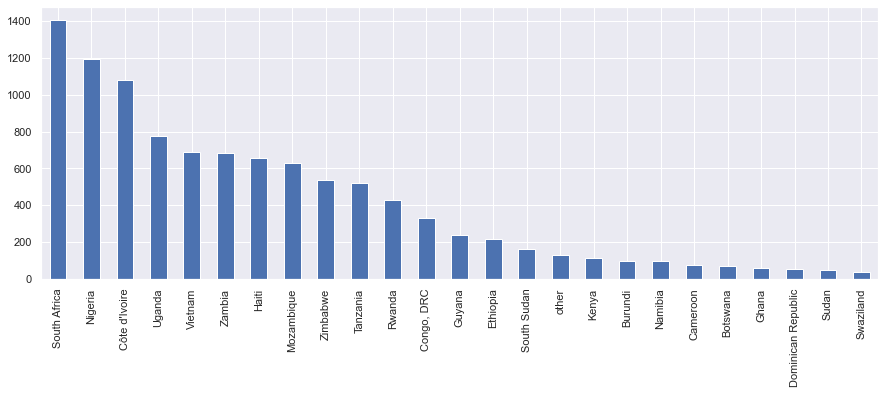

In [48]:
# Plotting values

plt.figure(figsize=(15,5))
df['Country'].value_counts().plot(kind='bar')
plt.show()

#### Country column making clear the frequency of consignment.

### Data Cleaning & Visualization - column`Managed By`

In [49]:
# Checking value count
df['Managed By'].value_counts()

PMO - US                     10265
South Africa Field Office       57
Ethiopia Field Office            1
Haiti Field Office               1
Name: Managed By, dtype: int64

In [50]:
# Checking contribution of value count in percentages

100*(df['Managed By'].value_counts()/len(df))

PMO - US                     99.428516
South Africa Field Office     0.552112
Ethiopia Field Office         0.009686
Haiti Field Office            0.009686
Name: Managed By, dtype: float64

#### From above it is clear that PMO - US contributing '99+'% to the column 'Managed By'. Hence dropping column 'Managed By' as it is highly biased.

In [51]:
df = df.drop('Managed By', axis=1)

### Data Cleaning & Visualization - column`Fulfill Via`

In [52]:
# Checking value count
df['Fulfill Via'].value_counts()

From RDC       5404
Direct Drop    4920
Name: Fulfill Via, dtype: int64

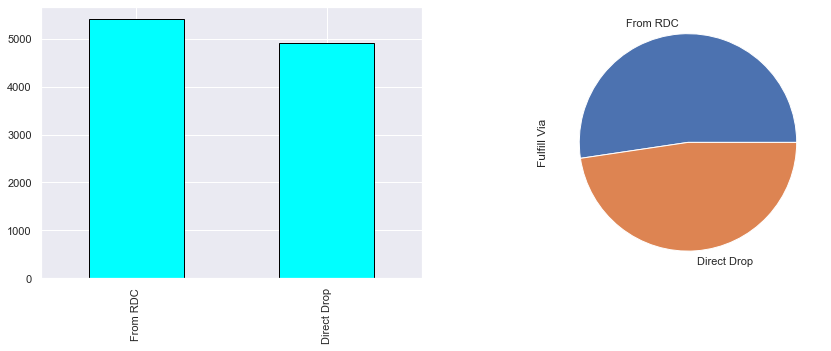

In [53]:
# plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Fulfill Via'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Fulfill Via'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column`Vendor INCO Term`

In [54]:
# Checking value count

df['Vendor INCO Term'].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: Vendor INCO Term, dtype: int64

In [55]:
df['Vendor INCO Term'] = df['Vendor INCO Term'].replace(['DDU', 'DAP', 'CIF'], 'Other')

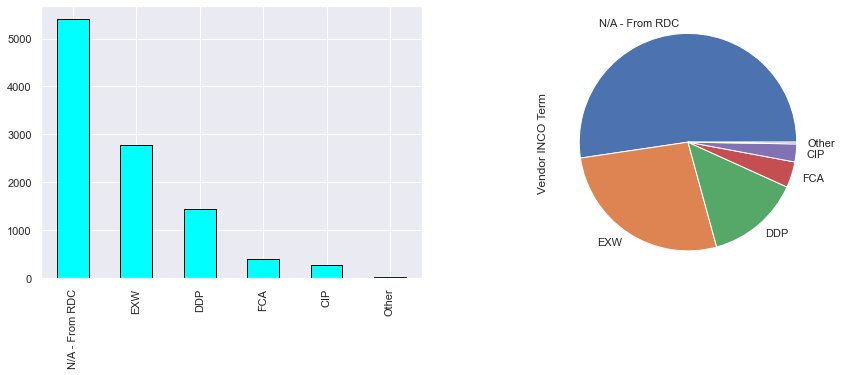

In [56]:
# Plottimg values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Vendor INCO Term'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Vendor INCO Term'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column`PQ First Sent to Client Date`

In [57]:
# Checking value count
df['PQ First Sent to Client Date'].value_counts()

Pre-PQ Process       2476
09-11-2014            205
Date Not Captured     205
07-11-2013            173
4/30/14               123
11-06-2009             98
11/21/11               90
03-10-2011             89
3/18/10                78
8/31/10                75
02-10-2010             72
3/18/13                64
10/13/10               62
12/13/12               56
10/21/13               53
05-07-2009             52
08-09-2013             51
12-08-2009             49
10-04-2011             48
1/16/13                46
8/29/11                46
03-01-2012             46
4/19/10                44
09-11-2012             43
4/19/13                43
6/23/10                43
12/29/14               42
10/23/09               40
11/26/10               39
10-08-2013             39
5/15/12                39
12-08-2011             38
05-06-2013             37
10/15/09               36
8/22/11                36
10/22/14               36
12/14/12               36
11/15/12               35
10-05-2012  

In [58]:
# Cleaning data from column - PQ First Sent to Client Date

def client_date(x):
    if x == 'Pre-PQ Process':
        return pd.to_datetime('01/06/2009', format="%d/%m/%Y")
    elif x == 'Date Not Captured':
        return 'Date Not Captured'
    else:
        if len(x) < 9:
            x= pd.to_datetime(x, format="%m/%d/%y")
            return x
        else:
            x = x.replace('-', '/')
            x= pd.to_datetime(x, format="%d/%m/%Y")
            return x

In [59]:
# Applying function

df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].apply(client_date)

In [60]:
# Dropping records having value as 'Date Not Captured'

df.drop(df.index[df['PQ First Sent to Client Date'] == 'Date Not Captured'], inplace = True)

In [61]:
# Checking value count

df['PQ First Sent to Client Date'].value_counts()

2009-06-01    2476
2014-11-09     205
2013-11-07     173
2014-04-30     123
2009-06-11      98
2011-11-21      90
2011-10-03      89
2010-03-18      78
2010-08-31      75
2010-10-02      72
2013-03-18      64
2010-10-13      62
2012-12-13      56
2013-10-21      53
2009-07-05      52
2013-09-08      51
2009-08-12      49
2011-04-10      48
2012-01-03      46
2013-01-16      46
2011-08-29      46
2010-04-19      44
2010-06-23      43
2013-04-19      43
2012-11-09      43
2014-12-29      42
2009-10-23      40
2012-05-15      39
2013-08-10      39
2010-11-26      39
2011-08-12      38
2013-06-05      37
2012-12-14      36
2009-10-15      36
2014-10-22      36
2011-08-22      36
2012-11-15      35
2012-05-10      35
2010-02-06      34
2015-10-03      33
2011-04-08      33
2011-01-24      33
2014-06-02      33
2012-04-19      31
2014-01-04      30
2013-03-19      30
2013-10-22      30
2014-08-04      30
2010-07-05      30
2009-09-09      29
2014-02-05      29
2013-06-28      28
2009-09-17  

### Data Cleaning & Visualization - column`PO Sent to Vendor Date`

In [62]:
# Checking value count

df['PO Sent to Vendor Date'].value_counts()

N/A - From RDC       5199
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
10-09-2014             71
12-02-2013             67
9/24/10                53
2/20/15                43
05-11-2015             40
3/24/11                34
12/14/10               34
3/28/11                32
6/17/10                32
04-02-2009             32
4/30/14                31
3/27/09                29
07-10-2013             27
06-02-2014             26
7/21/09                26
2/17/15                25
10/16/12               25
1/23/12                24
06-05-2009             23
1/26/15                23
11/14/14               23
06-12-2012             23
05-08-2014             22
9/21/10                21
4/21/10                21
03-10-2014             21
8/13/13                20
8/23/13                20
12/24/14               19
12/23/09               19
9/22/09                19
3/31/08                19
2/15/11                19
08-06-2013  

In [63]:
# Dropping column as it's most infomation is captured by from RDC.

df = df.drop('PO Sent to Vendor Date', axis= 1)

### Data Cleaning & Visualization - column `Scheduled Delivery Date`

In [64]:
df['Scheduled Delivery Date'].value_counts()

29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
30-Sep-14    57
16-Apr-13    56
15-Jul-10    55
19-Apr-10    53
30-Jun-15    51
24-Aug-15    51
30-Jun-14    50
12-May-15    42
30-Jan-15    42
31-Mar-11    40
06-Feb-14    39
20-Aug-08    36
24-Jul-15    36
25-Jun-09    36
30-May-14    32
31-Oct-13    31
30-Apr-13    31
31-Oct-14    31
02-Aug-12    31
30-Mar-12    30
28-Nov-14    30
02-Jul-15    30
30-Jun-10    29
31-Aug-10    29
30-Nov-10    29
31-Mar-15    28
31-Jan-11    28
30-Apr-15    27
13-Jan-14    27
30-Sep-10    26
27-Feb-15    26
30-Apr-14    26
21-Sep-07    26
16-Feb-15    25
31-Mar-09    25
30-Nov-12    25
20-Jun-12    24
07-Nov-13    24
31-Dec-13    24
16-Jun-09    24
30-Sep-13    24
29-May-15    24
09-Jan-13    24
28-Feb-14    24
21-Jan-08    23
29-Nov-13    23
31-Jul-14    23
31-May-13    22
30-Sep-11    22
31-Mar-14    22
10-Dec-14    21
23-Jul-15    21
31-May-11    21
29-Jan-08    21
18-Dec-09    20
09-Apr-13    20
30-Nov-09    20
13-Aug-1

In [65]:
def Scheduled_date(x):
    x = x.replace('-', '/')
    x = pd.to_datetime(x, format="%d/%b/%y")
    return x

df['Scheduled Delivery Date'] = df['Scheduled Delivery Date'].apply(Scheduled_date)

In [66]:
df['Scheduled Delivery Date'].value_counts()

2014-08-29    97
2012-03-16    83
2014-08-27    63
2010-05-31    62
2014-01-31    60
2014-09-30    57
2013-04-16    56
2010-07-15    55
2010-04-19    53
2015-08-24    51
2015-06-30    51
2014-06-30    50
2015-01-30    42
2015-05-12    42
2011-03-31    40
2014-02-06    39
2009-06-25    36
2015-07-24    36
2008-08-20    36
2014-05-30    32
2013-10-31    31
2013-04-30    31
2012-08-02    31
2014-10-31    31
2014-11-28    30
2015-07-02    30
2012-03-30    30
2010-06-30    29
2010-08-31    29
2010-11-30    29
2015-03-31    28
2011-01-31    28
2014-01-13    27
2015-04-30    27
2010-09-30    26
2015-02-27    26
2014-04-30    26
2007-09-21    26
2015-02-16    25
2012-11-30    25
2009-03-31    25
2012-06-20    24
2013-11-07    24
2015-05-29    24
2013-09-30    24
2009-06-16    24
2014-02-28    24
2013-01-09    24
2013-12-31    24
2008-01-21    23
2014-07-31    23
2013-11-29    23
2013-05-31    22
2011-09-30    22
2014-03-31    22
2008-01-29    21
2014-12-10    21
2015-07-23    21
2011-05-31    

### Data Cleaning & Visualization - column `Delivered to Client Date`

In [67]:
df['Delivered to Client Date'].value_counts()

29-Aug-14    74
27-Aug-14    66
28-Jun-10    60
14-Feb-12    60
16-Apr-13    59
31-Mar-10    52
24-Aug-15    51
12-May-15    41
18-May-10    41
06-Feb-14    39
30-Oct-14    39
24-Jul-15    36
14-Mar-13    34
13-Jan-14    32
23-Aug-10    31
17-Aug-10    30
19-Feb-15    29
23-Jul-15    27
31-May-10    26
21-Sep-07    25
05-Nov-14    23
15-May-15    23
02-Dec-09    22
02-Jun-15    22
14-Apr-14    22
16-Jun-09    22
16-Feb-12    21
10-Dec-14    21
03-Mar-10    21
28-Apr-15    21
21-Nov-08    21
07-Jul-15    20
08-May-08    20
25-Jun-14    20
29-Jan-08    20
07-Feb-14    19
03-Oct-14    19
19-May-14    19
02-Jul-15    19
02-Jun-08    19
26-Jan-15    18
19-Mar-09    18
12-Mar-12    18
14-Mar-12    18
15-Mar-13    18
16-Feb-11    18
20-Oct-09    17
24-Jan-14    17
30-Apr-07    17
10-Feb-14    17
20-Jun-14    17
24-Jul-12    17
09-Mar-15    17
03-Jun-15    17
28-Sep-11    17
12-Feb-15    17
18-Dec-09    16
04-Jan-08    16
04-May-07    16
05-Sep-14    16
18-Feb-15    16
20-Sep-13    16
08-Dec-1

In [68]:
df['Delivered to Client Date'] = df['Delivered to Client Date'].apply(Scheduled_date)

In [69]:
df['Delivered to Client Date'].value_counts()

2014-08-29    74
2014-08-27    66
2010-06-28    60
2012-02-14    60
2013-04-16    59
2010-03-31    52
2015-08-24    51
2010-05-18    41
2015-05-12    41
2014-10-30    39
2014-02-06    39
2015-07-24    36
2013-03-14    34
2014-01-13    32
2010-08-23    31
2010-08-17    30
2015-02-19    29
2015-07-23    27
2010-05-31    26
2007-09-21    25
2014-11-05    23
2015-05-15    23
2009-12-02    22
2009-06-16    22
2015-06-02    22
2014-04-14    22
2015-04-28    21
2008-11-21    21
2014-12-10    21
2010-03-03    21
2012-02-16    21
2015-07-07    20
2008-05-08    20
2008-01-29    20
2014-06-25    20
2015-07-02    19
2008-06-02    19
2014-05-19    19
2014-02-07    19
2014-10-03    19
2011-02-16    18
2012-03-14    18
2013-03-15    18
2015-01-26    18
2012-03-12    18
2009-03-19    18
2014-02-10    17
2007-04-30    17
2015-06-03    17
2015-03-09    17
2012-07-24    17
2014-06-20    17
2014-01-24    17
2009-10-20    17
2015-02-12    17
2011-09-28    17
2008-12-01    16
2008-09-19    16
2011-05-20    

In [70]:
# Dropping column Delivered to Client Date as column Delivery Recorded date is considered valid.

df = df.drop('Delivered to Client Date', axis = 1)

### Data Cleaning & Visualization - column`Delivery Recorded Date`

In [71]:
df['Delivery Recorded Date'].value_counts()

29-Aug-14    67
27-Aug-14    66
14-Feb-12    60
28-Jun-10    60
16-Apr-13    59
31-Mar-10    52
24-Aug-15    50
18-May-10    41
12-May-15    40
07-Nov-14    39
06-Feb-14    38
24-Jul-15    36
14-Mar-13    34
23-Aug-10    31
11-Jun-14    31
25-Jun-14    31
17-Aug-10    30
13-Jan-14    29
28-Apr-14    28
04-Mar-14    27
31-May-10    26
21-Sep-07    25
05-Sep-14    25
28-Aug-14    25
09-Mar-15    24
19-Feb-15    23
13-Nov-14    23
10-Dec-14    22
02-Dec-09    22
16-Jun-09    22
03-Oct-14    21
03-Mar-10    21
30-Mar-15    21
16-Feb-12    21
21-Nov-08    21
15-May-15    21
26-Jan-15    20
29-Jan-08    20
29-Jul-15    20
08-May-08    20
07-Jul-15    19
02-Jun-08    19
28-Apr-15    19
03-Sep-15    19
30-Jul-15    19
05-Nov-14    18
06-Jun-14    18
15-Mar-13    18
16-Feb-11    18
12-Mar-12    18
20-Dec-13    18
14-Mar-12    18
19-Mar-09    18
18-Oct-13    17
05-Jun-15    17
24-Jul-12    17
06-Oct-14    17
28-Sep-11    17
20-Oct-09    17
30-Apr-07    17
12-Jun-14    17
07-Feb-14    17
20-Apr-1

In [72]:
df['Delivery Recorded Date'] = df['Delivery Recorded Date'].apply(Scheduled_date)

In [73]:
df['Delivery Recorded Date'].value_counts()

2014-08-29    67
2014-08-27    66
2012-02-14    60
2010-06-28    60
2013-04-16    59
2010-03-31    52
2015-08-24    50
2010-05-18    41
2015-05-12    40
2014-11-07    39
2014-02-06    38
2015-07-24    36
2013-03-14    34
2014-06-11    31
2014-06-25    31
2010-08-23    31
2010-08-17    30
2014-01-13    29
2014-04-28    28
2014-03-04    27
2010-05-31    26
2014-09-05    25
2007-09-21    25
2014-08-28    25
2015-03-09    24
2015-02-19    23
2014-11-13    23
2014-12-10    22
2009-06-16    22
2009-12-02    22
2015-03-30    21
2008-11-21    21
2014-10-03    21
2015-05-15    21
2012-02-16    21
2010-03-03    21
2015-01-26    20
2008-01-29    20
2015-07-29    20
2008-05-08    20
2015-07-30    19
2015-09-03    19
2008-06-02    19
2015-04-28    19
2015-07-07    19
2012-03-14    18
2013-03-15    18
2013-12-20    18
2011-02-16    18
2014-11-05    18
2012-03-12    18
2014-06-06    18
2009-03-19    18
2013-10-18    17
2007-04-30    17
2012-07-24    17
2011-09-28    17
2015-06-05    17
2014-10-06    

### Data Cleaning & Visualization - column `Product Group`

In [74]:
df['Product Group'].value_counts()

ARV     8345
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

In [75]:
100*(df['Product Group'].value_counts()/len(df))

ARV     82.468623
HRDT    17.076786
ANTM     0.217413
ACT      0.158118
MRDT     0.079059
Name: Product Group, dtype: float64

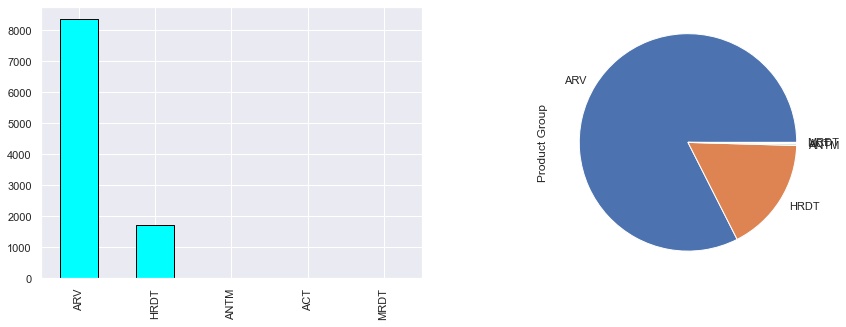

In [76]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Product Group'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Product Group'].value_counts().plot.pie()
plt.show()

In [77]:
# Dropping Product group column as its level ARV describe 82%+ infomation

df = df.drop('Product Group', axis=1)

### Data Cleaning & Visualization - column `Sub Classification`

In [78]:
df['Sub Classification'].value_counts()

Adult                   6418
Pediatric               1927
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: Sub Classification, dtype: int64

In [79]:
100*(df['Sub Classification'].value_counts()/len(df))

Adult                   63.425240
Pediatric               19.043384
HIV test                15.485720
HIV test - Ancillary     1.591066
Malaria                  0.296472
ACT                      0.158118
Name: Sub Classification, dtype: float64

In [80]:
df['Sub Classification'] = df['Sub Classification'].replace('HIV test - Ancillary', 'HIV test')

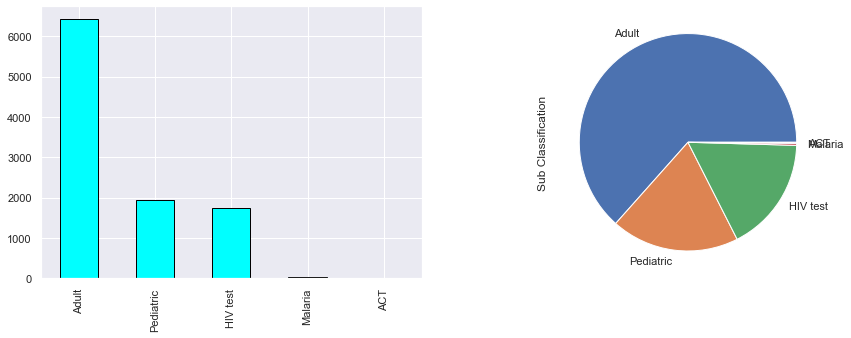

In [81]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Sub Classification'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Sub Classification'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column `Vendor`

In [82]:
df['Vendor'].value_counts()

SCMS from RDC                                                        5199
Orgenics, Ltd                                                         754
S. BUYS WHOLESALER                                                    715
Aurobindo Pharma Limited                                              668
Trinity Biotech, Plc                                                  356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                       347
PHARMACY DIRECT                                                       326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                 317
HETERO LABS LIMITED                                                   277
CIPLA LIMITED                                                         175
CHEMBIO DIAGNOSTIC SYSTEMS, INC.                                      109
Standard Diagnostics, Inc.                                             98
STRIDES ARCOLAB LIMITED                                                93
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.

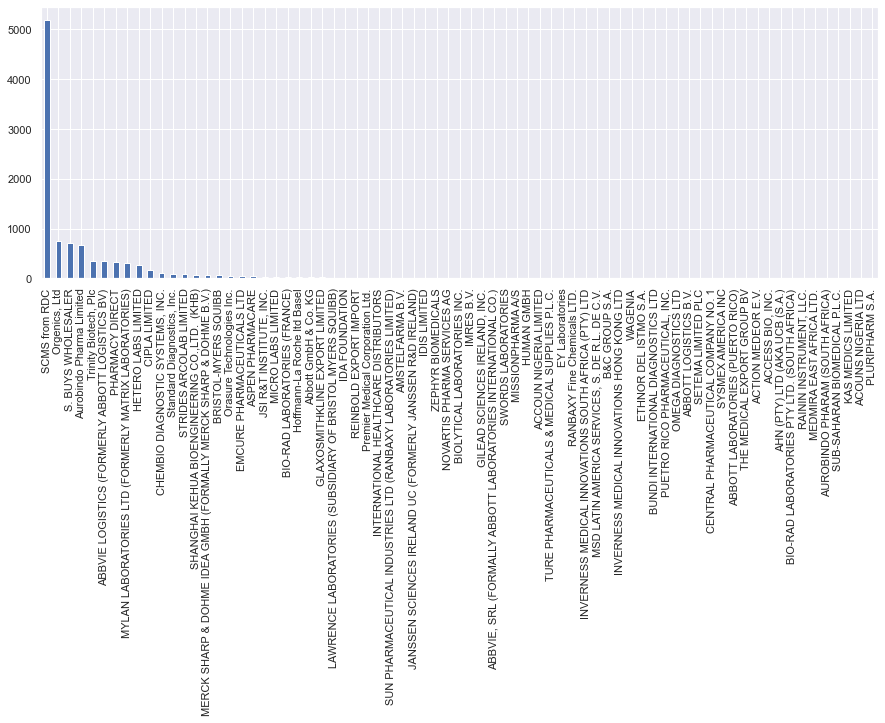

In [83]:
plt.figure(figsize=(15,5))
df['Vendor'].value_counts().plot(kind='bar')
plt.show()

#### Here most of the information is explained by level 'SCMS from RDC' for column 'Vendor'. Hence dropping column Vendor.

In [84]:
df = df.drop('Vendor', axis=1)

### Data Cleaning & Visualization - column `Item Description`

In [85]:
df['Item Description'].value_counts()

Efavirenz 600mg, tablets, 30 Tabs                                                                                    733
Nevirapine 200mg, tablets, 60 Tabs                                                                                   605
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                                                    580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                                                       577
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                                                     554
HIV 1/2, Uni-Gold HIV Kit, 20 Tests                                                                                  369
Lamivudine 150mg, tablets, 60 Tabs                                                                                   367
Zidovudine 300mg, tablets, 60 Tabs                                                                                   310
Lamivudine/Tenofovir Disoproxil 

#### Here, column Item Description gives infomation on drugs, hence dropping it.

In [86]:
df = df.drop('Item Description', axis= 1)

### Data Cleaning & Visualization - column `Molecule/Test Type`

In [87]:
df['Molecule/Test Type'].value_counts()

Efavirenz                                                                                             1099
Nevirapine                                                                                             854
Lamivudine/Nevirapine/Zidovudine                                                                       681
Lamivudine/Zidovudine                                                                                  672
Lopinavir/Ritonavir                                                                                    629
HIV 1/2, Determine Complete HIV Kit                                                                    577
Lamivudine                                                                                             577
Zidovudine                                                                                             516
Abacavir                                                                                               441
HIV 1/2, Uni-Gold HIV Kit            

#### Here, column Molecule/Test Type gives information on test type and consituting molecules present in it. Hence dropping it.

In [88]:
df = df.drop('Molecule/Test Type',axis=1)

### Data Cleaning & Visualization - column `Brand`

In [89]:
df['Brand'].value_counts()

Generic            7098
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             161
Norvir              136
Stat-Pak            115
Bioline             113
Videx                84
Truvada              83
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Invirase             51
Viread               51
Zerit                46
Isentress            44
Prezista             42
Epivir               42
Videx EC             41
Retrovir             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Reyataz              18
Trizivir             18
Atripla              16
First Response       15
Coartem              12
Viracept             11
INSTi                 5
Paramax               5
DoubleCheck           5
Multispot             5
LAV                   4
ImmunoComb            3
Hexagon               3
Combivir        

In [90]:
100*(df['Brand'].value_counts(normalize=True))

Generic            70.145271
Determine           7.896037
Uni-Gold            3.686135
Aluvia              2.470600
Kaletra             1.591066
Norvir              1.344006
Stat-Pak            1.136476
Bioline             1.116711
Videx               0.830122
Truvada             0.820239
Colloidal Gold      0.691768
Stocrin/Sustiva     0.681886
OraQuick            0.592944
Invirase            0.504002
Viread              0.504002
Zerit               0.454590
Isentress           0.434826
Prezista            0.415061
Epivir              0.415061
Videx EC            0.405178
Retrovir            0.405178
Ziagen              0.365649
Crixivan            0.355766
Capillus            0.345884
Intelence           0.316237
Genie               0.296472
Viramune            0.276707
Clearview           0.187766
Reyataz             0.177883
Trizivir            0.177883
Atripla             0.158118
First Response      0.148236
Coartem             0.118589
Viracept            0.108706
INSTi         

#### Dropping Brand column as 70% of infomation is described by level Generic

In [91]:
df = df.drop('Brand', axis= 1)

### Data Cleaning & Visualization - column `Dosage Form`

In [92]:
df['Dosage Form'].value_counts()

Tablet                                3462
Tablet - FDC                          2659
Test kit                              1575
Oral solution                          712
Capsule                                706
Chewable/dispersible tablet - FDC      239
Oral suspension                        209
Test kit - Ancillary                   161
Chewable/dispersible tablet            144
Delayed-release capsules               131
Delayed-release capsules - blister      41
Powder for oral solution                28
Tablet - FDC + co-blister               20
Tablet - FDC + blister                  15
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: Dosage Form, dtype: int64

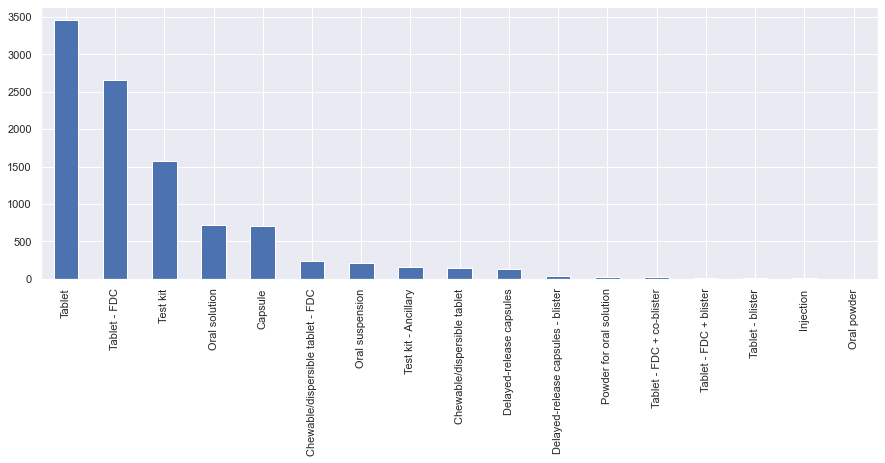

In [93]:
plt.figure(figsize=(15,5))
df['Dosage Form'].value_counts().plot(kind='bar')
plt.show()

#### Dropping column Dosage Form as its is dependent on Dosage.

In [94]:
df = df.drop('Dosage Form', axis= 1)

### Data Cleaning & Visualization - column `Unit of Measure (Per Pack)`

In [95]:
df['Unit of Measure (Per Pack)'].value_counts()

60      3993
30      2580
100      974
240      655
120      474
20       470
90       219
300      153
1        126
25       114
180       76
200       75
270       51
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
5          4
18         4
2          4
36         3
168        3
12         2
24         2
160        1
144        1
48         1
Name: Unit of Measure (Per Pack), dtype: int64

### Data Cleaning & Visualization - column `Line Item Quantity`

In [96]:
df['Line Item Quantity'].value_counts()

10000     93
1000      91
100       85
2000      73
5000      69
500       67
20000     66
3000      66
3         62
50000     62
300       60
4000      58
200       55
400       55
20        54
10        54
30        54
50        49
100000    49
1500      49
6         48
4         46
2         40
6000      39
120       39
1200      38
1         35
150       35
60        34
40        33
8000      32
2500      32
600       32
80        31
15        31
12        29
800       28
25        28
240       27
15000     27
5         27
90        27
7         27
350       26
8         26
25000     25
450       25
45        24
30000     24
2744      23
250       22
60000     22
9         22
7000      21
40000     21
70        20
11        20
1600      19
18        19
168       19
24        19
140       19
36        19
3500      18
19        18
45000     18
1800      18
4500      18
12000     18
23        18
27        17
2100      17
17        17
9000      17
4200      16
35000     16
1400      16

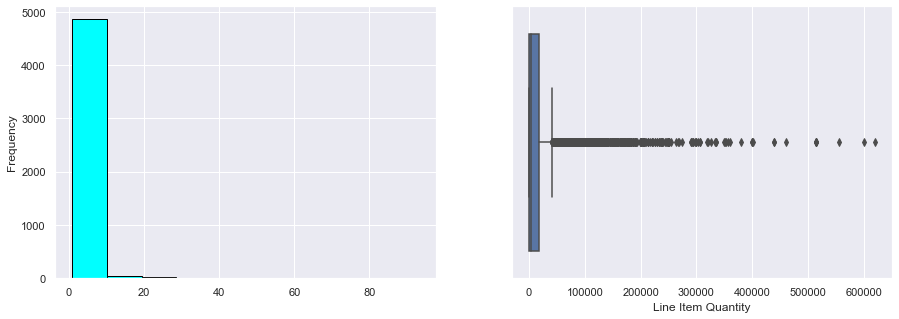

In [97]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Line Item Quantity'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Line Item Quantity'])
plt.show()

### Data Cleaning & Visualization - column `Line Item Value`

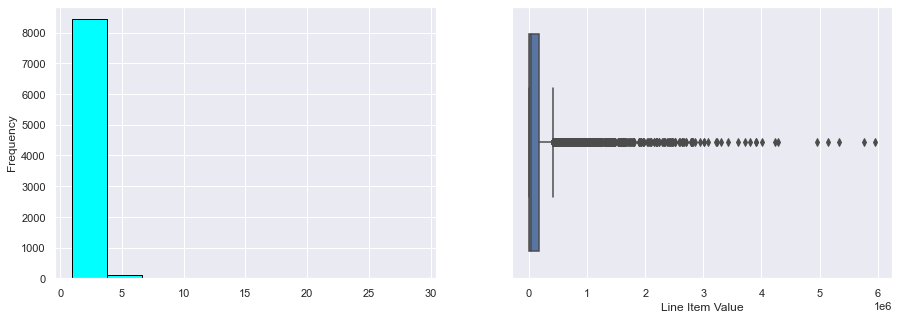

In [98]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Line Item Value'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Line Item Value'])
plt.show()

In [99]:
round(df['Line Item Value'].describe(),3)

count      10119.000
mean      157236.232
std       344675.474
min            0.000
25%         4283.825
50%        30400.000
75%       165451.220
max      5951990.400
Name: Line Item Value, dtype: float64

### Data Cleaning & Visualization - column `Pack Price`

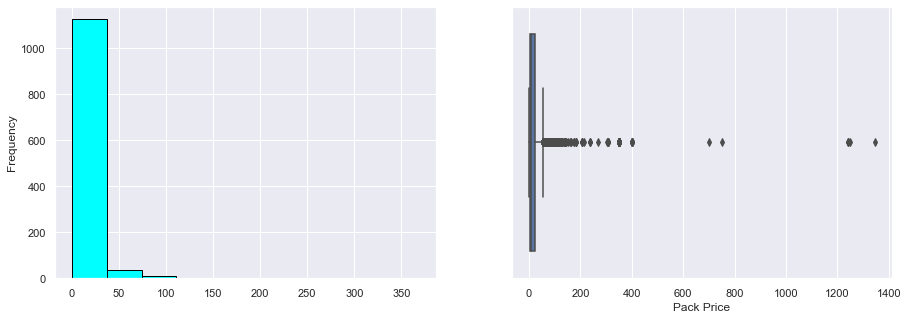

In [100]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Pack Price'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Pack Price'])
plt.show()

In [101]:
round(df['Pack Price'].describe(),3)

count    10119.000
mean        22.181
std         46.013
min          0.000
25%          4.150
50%          9.350
75%         24.000
max       1345.640
Name: Pack Price, dtype: float64

### Data Cleaning & Visualization - column `Unit Price`

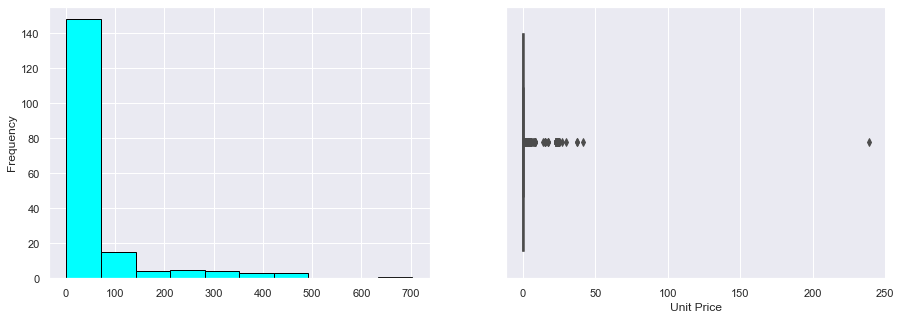

In [102]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Unit Price'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Unit Price'])
plt.show()

In [103]:
round(df['Unit Price'].describe(),3)

count    10119.000
mean         0.620
std          3.308
min          0.000
25%          0.080
50%          0.160
75%          0.485
max        238.650
Name: Unit Price, dtype: float64

### Data Cleaning & Visualization - column `Manufacturing Site`

In [104]:
df['Manufacturing Site'].value_counts()

Aurobindo Unit III, India                                                   3056
Mylan (formerly Matrix) Nashik                                              1383
Hetero Unit III Hyderabad IN                                                 858
Cipla, Goa, India                                                            652
Strides, Bangalore, India.                                                   530
Alere Medical Co., Ltd.                                                      481
Trinity Biotech, Plc                                                         405
ABBVIE Ludwigshafen Germany                                                  366
Inverness Japan                                                              345
ABBVIE (Abbott) Logis. UK                                                    215
BMS Meymac, France                                                           148
Aspen-OSD, Port Elizabeth, SA                                                129
Chembio Diagnostics Sys. Inc

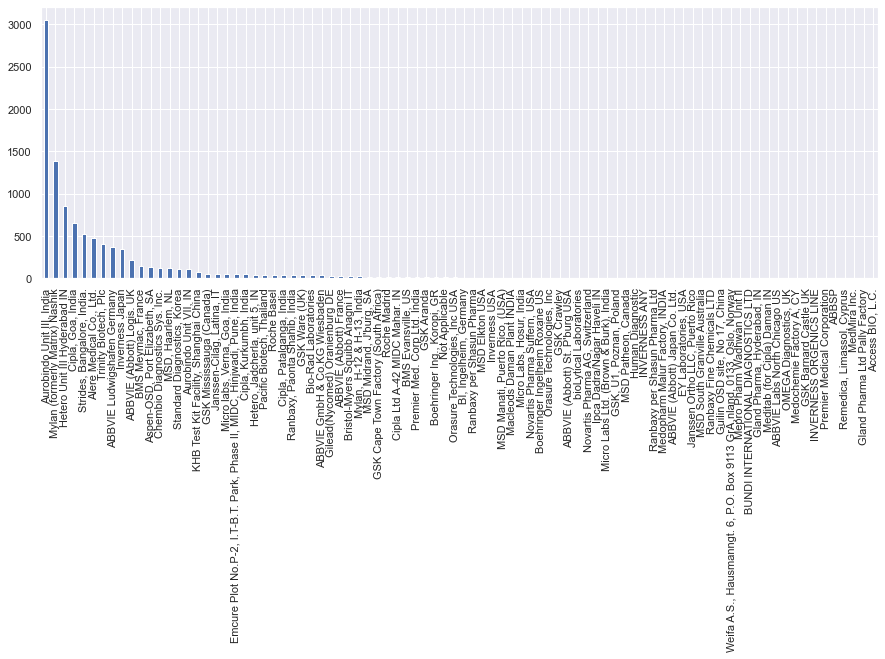

In [105]:
plt.figure(figsize=(15,5))
df['Manufacturing Site'].value_counts().plot(kind='bar')
plt.show()

In [106]:
other_manuf = df['Manufacturing Site'].value_counts().to_dict()
other_cat = []
for k,v in other_manuf.items():
    if v < 50:
        other_cat.append(k)

In [107]:
df['Manufacturing Site'] = df['Manufacturing Site'].replace(other_cat, 'other')

In [108]:
df['Manufacturing Site'].value_counts()

Aurobindo Unit III, India                                                   3056
Mylan (formerly Matrix) Nashik                                              1383
Hetero Unit III Hyderabad IN                                                 858
other                                                                        798
Cipla, Goa, India                                                            652
Strides, Bangalore, India.                                                   530
Alere Medical Co., Ltd.                                                      481
Trinity Biotech, Plc                                                         405
ABBVIE Ludwigshafen Germany                                                  366
Inverness Japan                                                              345
ABBVIE (Abbott) Logis. UK                                                    215
BMS Meymac, France                                                           148
Aspen-OSD, Port Elizabeth, S

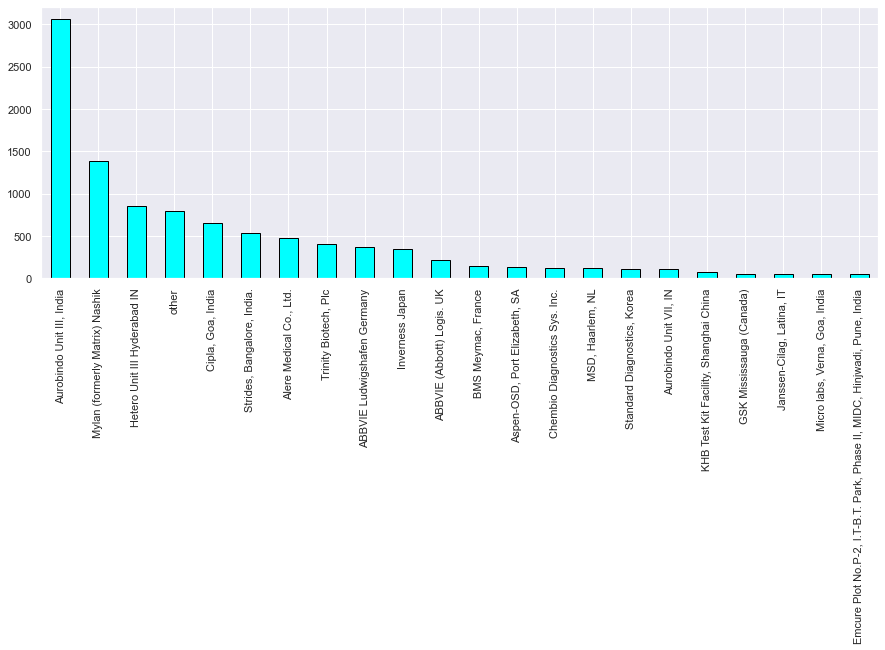

In [109]:
plt.figure(figsize= (15,5))
df['Manufacturing Site'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')
plt.show()

### Data Cleaning & Visualization - column `First Line Designation`

In [110]:
df['First Line Designation'].value_counts()

Yes    6876
No     3243
Name: First Line Designation, dtype: int64

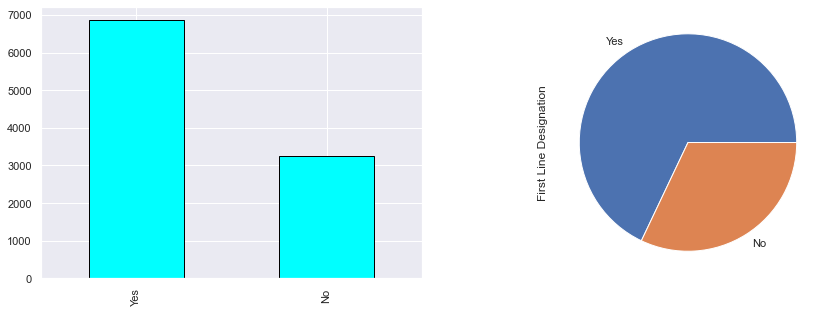

In [111]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['First Line Designation'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['First Line Designation'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column `Weight (Kilograms)`

In [112]:
df['Weight (Kilograms)'].value_counts()

Weight Captured Separately    1499
2                               29
6                               26
1                               21
5                               20
60                              20
3                               18
4                               18
14                              17
12                              17
17                              17
9                               17
21                              16
7                               16
36                              16
See DN-304 (ID#:10589)          16
25                              16
39                              16
46                              15
30                              15
16                              15
24                              15
40                              15
15                              15
58                              15
76                              15
13                              15
See ASN-31750 (ID#:19272)       14
22                  

In [113]:
# Dropping column Weight (Kilograms) as it contain missing values in terms of nomianal values

df = df.drop('Weight (Kilograms)', axis= 1)

### Data Cleaning & Visualization - column`Freight Cost (USD)`

In [114]:
df['Freight Cost (USD)'].value_counts()

Freight Included in Commodity Cost    1440
Invoiced Separately                    231
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
13398.06                                16
See ASN-31750 (ID#:19272)               14
See ASN-32231 (ID#:13648)               14
See ASN-28279 (ID#:13547)               13
7329.83                                 12
See DN-3015 (ID#:82554)                 12
1211.48                                 11
25231.96                                11
15322.73                                10
See DN-2035 (ID#:82356)                 10
17090                                   10
12601.07                                10
See DN-3561 (ID#:82654)                 10
15128.37                                10
18495.9                                 10
See ASN-26738 (ID#:15115)               10
15459.09                                10
16532.5                                 10
14547.55   

In [115]:
def other_cate(x):
    if x.find('See') != -1:
        return np.nan
    elif x == 'Freight Included in Commodity Cost' or x == 'Invoiced Separately':
        return 0
    else:
        return x

In [116]:
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].apply(other_cate)

In [117]:
df['Freight Cost (USD)'].value_counts(dropna=False)

NaN          2394
0            1671
9736.1         36
6147.18        27
13398.06       16
7329.83        12
25231.96       11
1211.48        11
15128.37       10
12601.07       10
15322.73       10
16532.5        10
17090          10
14547.55       10
15459.09       10
18495.9        10
11637.64        9
1698.83         8
290             8
5121.68         7
18461.22        7
20761           7
27441.22        7
20264.93        6
24927.19        6
21326.73        6
3279.25         6
4263.07         6
20225.07        6
26340           6
11492.86        6
3646.13         6
28812.57        6
3296.34         5
7317.47         5
2938.92         5
6036.96         5
51090           5
9405.81         5
6443.61         5
1791.42         5
30936.1         5
29780.5         5
21084.84        5
26266.34        5
5530.11         5
20666.07        5
6105.79         4
1573.41         4
20602.3         4
37242.5         4
8815.65         4
43548           4
7134.39         4
44347.71        4
29674.92  

In [118]:
# Changing dtype to float

df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype('float')

In [119]:
df['Freight Cost (USD)'].describe()

count      7725.000000
mean       8778.633996
std       14839.980798
min           0.000000
25%         578.010000
50%        3526.690000
75%       11311.600000
max      289653.200000
Name: Freight Cost (USD), dtype: float64

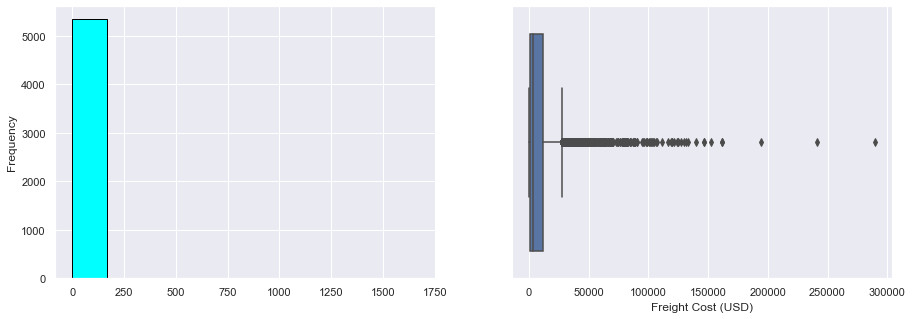

In [120]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Freight Cost (USD)'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Freight Cost (USD)'])
plt.show()

In [121]:
# Replacing np.nan values with column median values

median_val = df['Freight Cost (USD)'].median()

df['Freight Cost (USD)'] = df['Freight Cost (USD)'].replace(np.nan,median_val)

In [122]:
df['Freight Cost (USD)'].value_counts(dropna=False)

3526.69      2397
0.00         1671
9736.10        36
6147.18        27
13398.06       16
7329.83        12
25231.96       11
1211.48        11
15459.09       10
15128.37       10
12601.07       10
16532.50       10
14547.55       10
15322.73       10
17090.00       10
18495.90       10
11637.64        9
1698.83         8
290.00          8
5121.68         7
20761.00        7
27441.22        7
18461.22        7
3646.13         6
4263.07         6
20225.07        6
20264.93        6
21326.73        6
24927.19        6
28812.57        6
26340.00        6
11492.86        6
3279.25         6
2938.92         5
9405.81         5
3296.34         5
51090.00        5
30936.10        5
6443.61         5
5530.11         5
26266.34        5
7317.47         5
1791.42         5
29780.50        5
21084.84        5
6036.96         5
20666.07        5
8815.65         4
5886.90         4
7134.39         4
1211.49         4
21347.12        4
21347.13        4
522.42          4
226.25          4
29674.92  

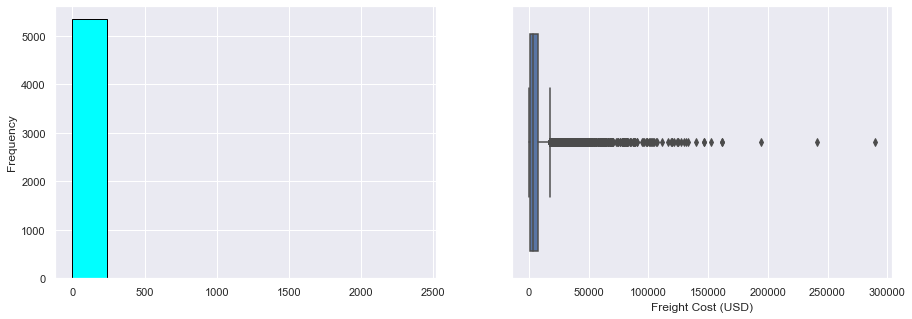

In [123]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Freight Cost (USD)'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Freight Cost (USD)'])
plt.show()

In [124]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0              EXW           Air          2009-06-01 00:00:00   
1              EXW           Air          2009-06-01 00:00:00   
2              FCA           Air          2009-06-01 00:00:00   
3              EXW           Air          2009-06-01 00:00:00   
4              EXW           Air          2009-06-01 00:00:00   

  Scheduled Delivery Date Delivery Recorded Date Sub Classification  \
0              2006-06-02             2006-06-02           HIV test   
1              2006-11-14             2006-11-14          Pediatric   
2              2006-08-27             2006-08-27           HIV test   
3              2006-09-01             2006-09-01              Adult   
4              2006-08-11             2006-08-11              Adult   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price         Manufacturing Site First Line Designation  \
0       29.00        0.97                      other                    Yes   
1        6.20        0.03  Aurobindo Unit III, India                    Yes   
2       80.00        0.80                      other                    Yes   
3        3.99        0.07                      other                    Yes   
4        3.20        0.05  Aurobindo Unit III, India                    Yes   

   Freight Cost (USD)  Line Item Insurance (USD)  
0              780.34                      47.04  
1             4521.50                      47.04  
2             1653.78                      47.04  
3            16007.06                      47.04  
4            45450.08                      47.04

### Data Cleaning & Visualization - column`Line Item Insurance (USD)`

In [125]:
df['Line Item Insurance (USD)'].value_counts()

47.04      289
0.00        44
0.02        34
0.07        32
0.06        30
0.05        30
0.01        23
0.03        23
0.09        21
0.08        20
0.49        18
0.26        18
0.24        18
0.15        18
0.12        17
0.14        17
0.44        17
0.13        17
0.34        16
342.39      15
0.29        15
0.17        15
0.42        15
0.38        15
0.25        15
0.10        15
0.28        15
0.19        15
0.18        14
0.30        14
0.04        14
5.12        13
0.20        13
0.31        13
330.00      13
0.51        12
0.35        12
0.54        12
0.96        12
0.23        11
0.71        11
1.03        11
0.82        11
0.99        11
0.64        10
0.16        10
0.22        10
0.41        10
36.96       10
0.57        10
320.00      10
0.67        10
0.52        10
0.89         9
0.11         9
1.16         9
1.92         9
0.86         9
1.10         9
31.36        9
0.72         9
2.96         9
0.46         9
0.60         9
0.37         8
0.63         8
1.14      

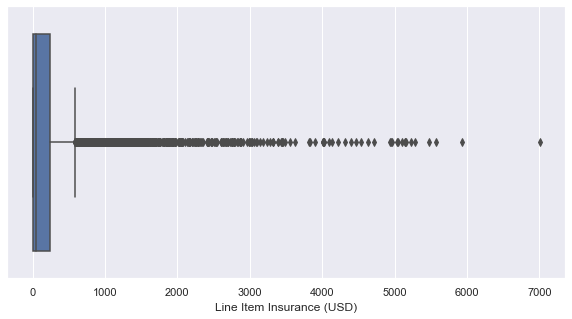

In [126]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Line Item Insurance (USD)'])
plt.show()

### Calculating Cost

In [127]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0              EXW           Air          2009-06-01 00:00:00   
1              EXW           Air          2009-06-01 00:00:00   
2              FCA           Air          2009-06-01 00:00:00   
3              EXW           Air          2009-06-01 00:00:00   
4              EXW           Air          2009-06-01 00:00:00   

  Scheduled Delivery Date Delivery Recorded Date Sub Classification  \
0              2006-06-02             2006-06-02           HIV test   
1              2006-11-14             2006-11-14          Pediatric   
2              2006-08-27             2006-08-27           HIV test   
3              2006-09-01             2006-09-01              Adult   
4              2006-08-11             2006-08-11              Adult   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price         Manufacturing Site First Line Designation  \
0       29.00        0.97                      other                    Yes   
1        6.20        0.03  Aurobindo Unit III, India                    Yes   
2       80.00        0.80                      other                    Yes   
3        3.99        0.07                      other                    Yes   
4        3.20        0.05  Aurobindo Unit III, India                    Yes   

   Freight Cost (USD)  Line Item Insurance (USD)  
0              780.34                      47.04  
1             4521.50                      47.04  
2             1653.78                      47.04  
3            16007.06                      47.04  
4            45450.08                      47.04

In [128]:
#df['Total_Cost'] = df['Line Item Value'] + df['Freight Cost (USD)'] + df['Line Item Insurance (USD)']

In [129]:
#df.head()

#### From column `Pack Price` we can say that is mesaured by dividing columns `Line Item Value` & `Line Item Quantity`. 

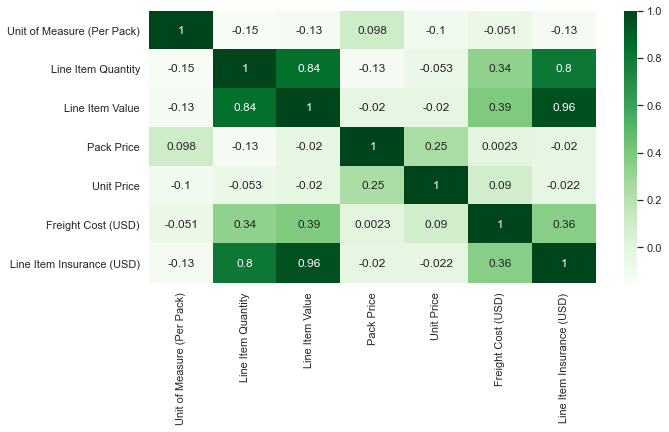

In [130]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap = 'Greens', annot = True)
plt.show()

### Inferences:
- `Total_Cost` is strongly correlated to column `Line Item Value`, `Line Item Quantity`, `Line Item Insurance (USD)`.
- We have `Line Item Value` and `Line Item Quantity` with positive linear correlation of 0.84.
- Correlation of `Line Item Insurance (USD)` and `Line Item Value` is 0.96.
- Correlation of `Line Item Insurance (USD)` and `Line Item Quantity` is 0.80.

In [131]:
# Hence, dropping columns- Line Item Value, Line Item Quantity, Freight Cost (USD), Line Item Insurance (USD)

#df = df.drop(['Line Item Value', 'Line Item Quantity', 'Freight Cost (USD)','Line Item Insurance (USD)'], axis = 1)

In [132]:
#plt.figure(figsize=(10,5))
#sns.heatmap(df.corr(), cmap = 'Greens', annot = True)
#plt.show()

### Calculating days to Process 
- from PQ First Sent to Client Date to Delivery Recorded Date

In [133]:
df['days to Process'] = df['Delivery Recorded Date'] - df['PQ First Sent to Client Date']

In [134]:
df['days to Process'].value_counts()

293 days      120
295 days       96
156 days       85
85 days        81
180 days       63
29 days        62
42 days        59
92 days        55
120 days       54
-96 days       54
114 days       54
288 days       52
84 days        51
60 days        50
167 days       49
133 days       49
224 days       48
146 days       47
97 days        46
70 days        45
184 days       45
189 days       45
12 days        44
188 days       44
257 days       43
158 days       43
57 days        43
203 days       42
78 days        42
83 days        42
153 days       42
131 days       41
98 days        41
82 days        41
341 days       40
176 days       40
219 days       40
124 days       39
111 days       39
119 days       38
122 days       38
147 days       37
169 days       36
56 days        36
175 days       36
173 days       35
68 days        34
134 days       34
195 days       34
64 days        33
112 days       33
93 days        33
190 days       33
212 days       33
139 days       32
152 days  

In [135]:
def to_int(x):
    x = np.timedelta64(x, 'ns')
    days = x.astype('timedelta64[D]')
    x = days / np.timedelta64(1, 'D')
    return x

df['days to Process'] = df['days to Process'].apply(to_int)

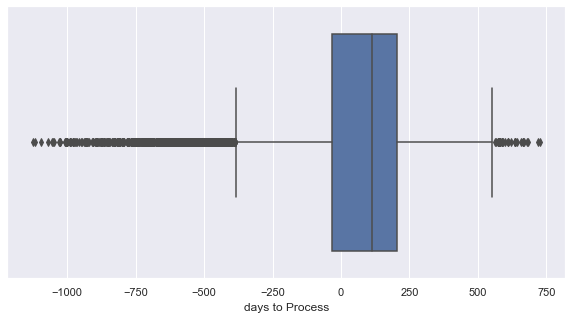

In [136]:
plt.figure(figsize=(10,5))
sns.boxplot(df['days to Process'])
plt.show()

In [137]:
# Dropping columns-'Delivery Recorded Date', 'Scheduled Delivery Date' and 'PQ First Sent to Client Date'

df = df.drop(['Delivery Recorded Date','PQ First Sent to Client Date', 'Scheduled Delivery Date'], axis= 1)

## Data Visualization

In [138]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode Sub Classification  \
0              EXW           Air           HIV test   
1              EXW           Air          Pediatric   
2              FCA           Air           HIV test   
3              EXW           Air              Adult   
4              EXW           Air              Adult   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price         Manufacturing Site First Line Designation  \
0       29.00        0.97                      other                    Yes   
1        6.20        0.03  Aurobindo Unit III, India                    Yes   
2       80.00        0.80                      other                    Yes   
3        3.99        0.07                      other                    Yes   
4        3.20        0.05  Aurobindo Unit III, India                    Yes   

   Freight Cost (USD)  Line Item Insurance (USD)  days to Process  
0              780.34                      47.04          -1095.0  
1             4521.50                      47.04           -930.0  
2             1653.78                      47.04          -1009.0  
3            16007.06                      47.04          -1004.0  
4            45450.08                      47.04          -1025.0

In [139]:
# Checking categorical columns

cat_col= df.select_dtypes(include='object')
print(cat_col.columns)
print(len(cat_col.columns))

Index(['PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Fulfill Via',
       'Vendor INCO Term', 'Shipment Mode', 'Sub Classification',
       'Manufacturing Site', 'First Line Designation'],
      dtype='object')
10


In [140]:
# Checking numerical columns

num_col= df.select_dtypes(exclude='object')
print(num_col.columns)
print(len(num_col.columns))

Index(['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'days to Process'],
      dtype='object')
8


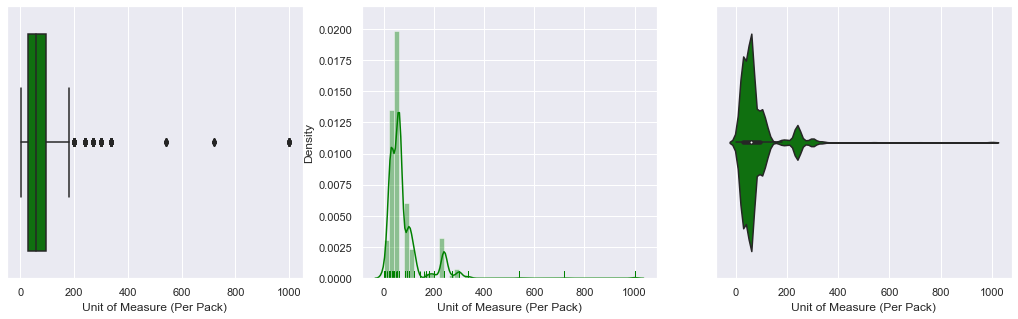

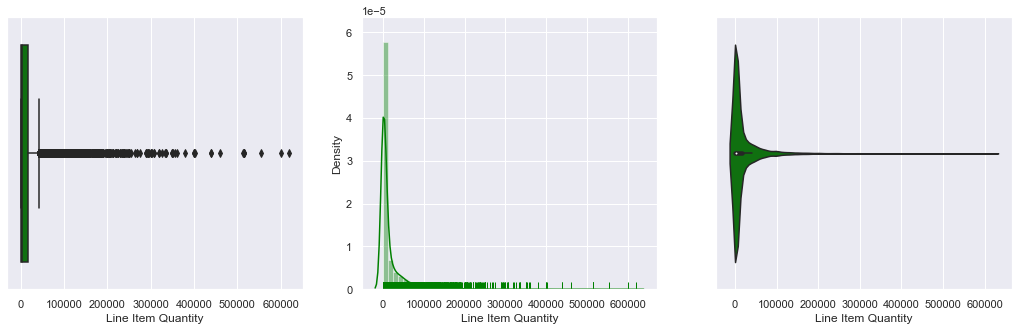

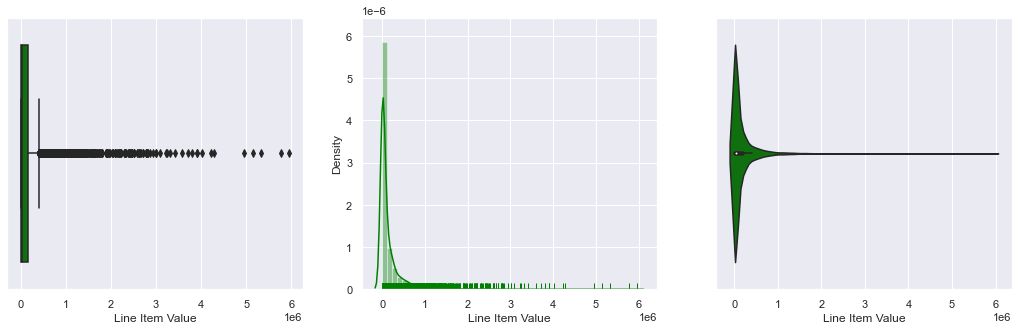

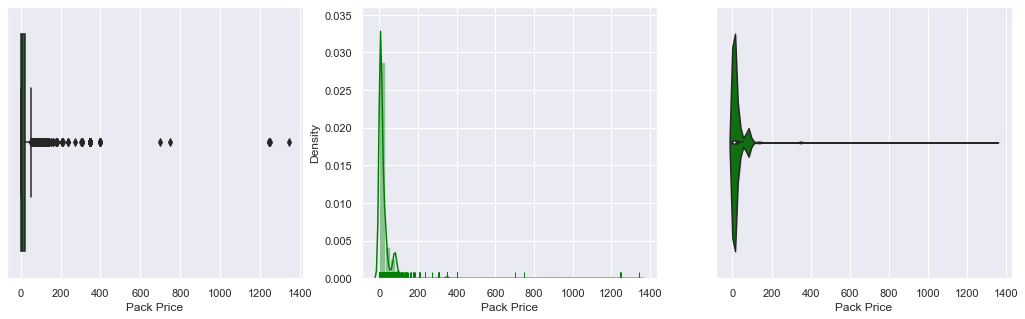

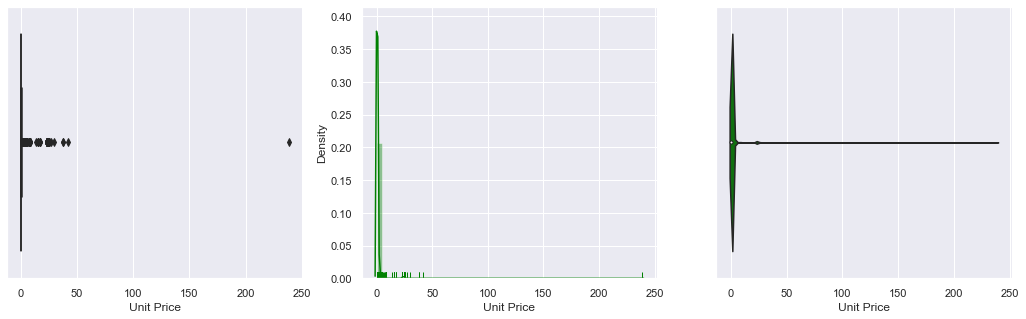

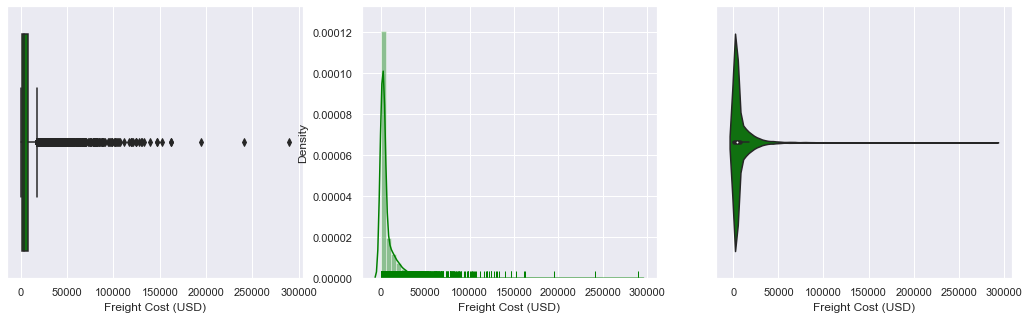

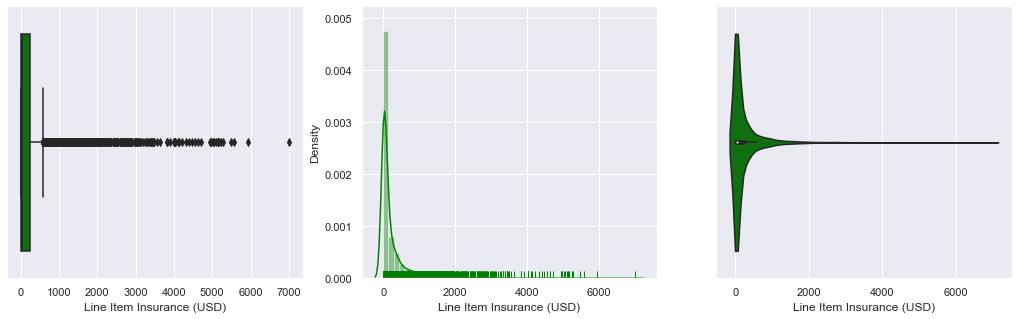

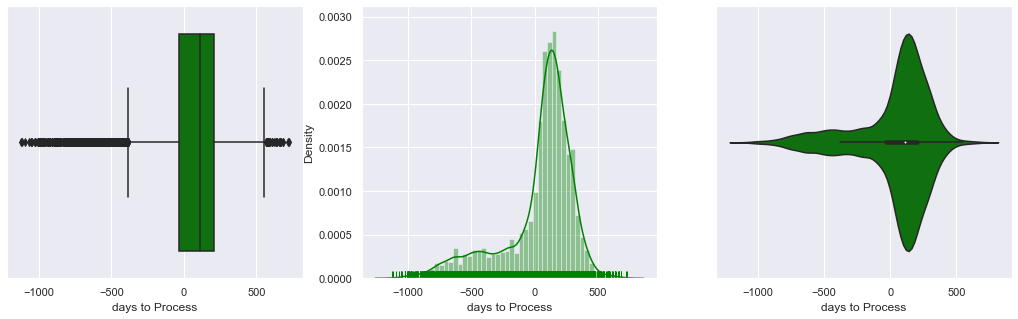

In [141]:
# Plotting numerical columns individually

f_num = num_col.columns[:]

for i in enumerate(f_num):
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(131)
    sns.boxplot(num_col[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(num_col[i[1]], rug = True,  color= 'Green')
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num_col[i[1]], orient= 'vertical',  color= 'Green')
    
    plt.show()

<Figure size 1080x720 with 0 Axes>

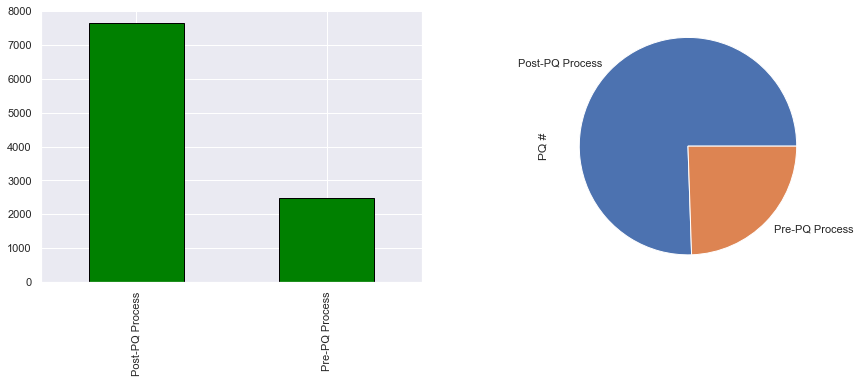

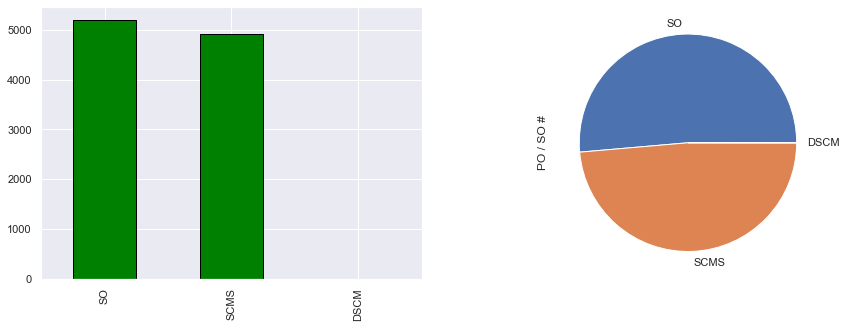

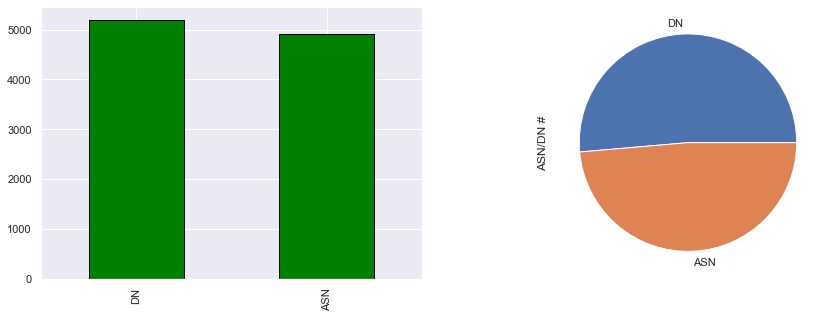

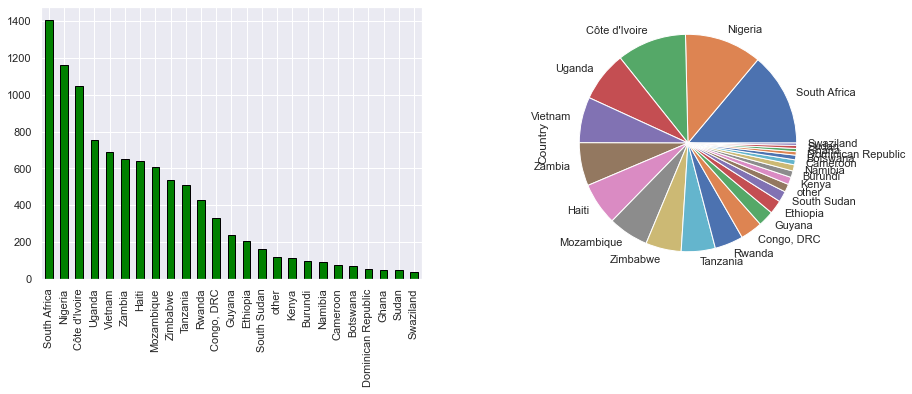

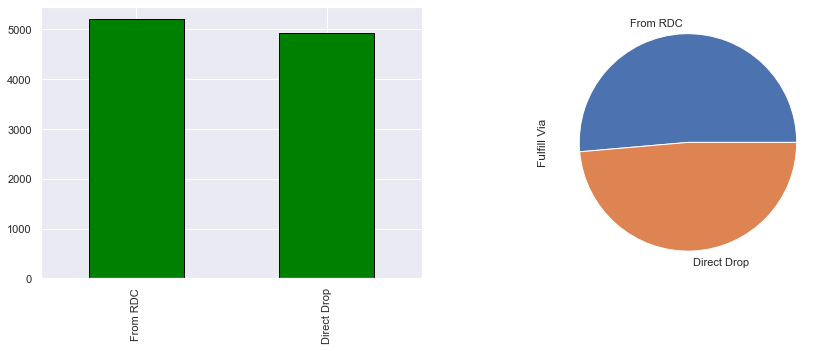

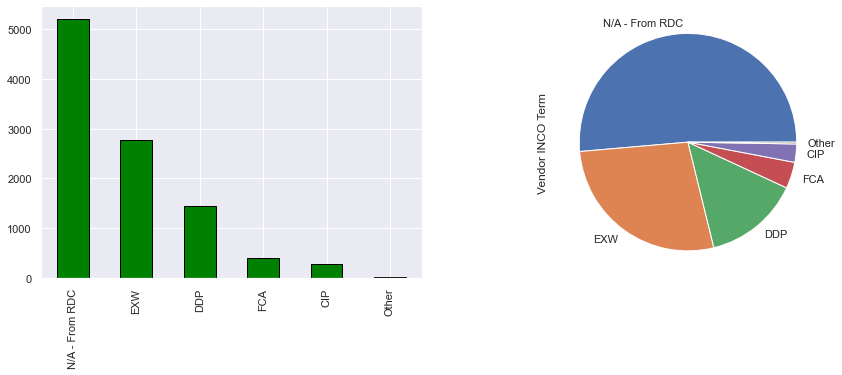

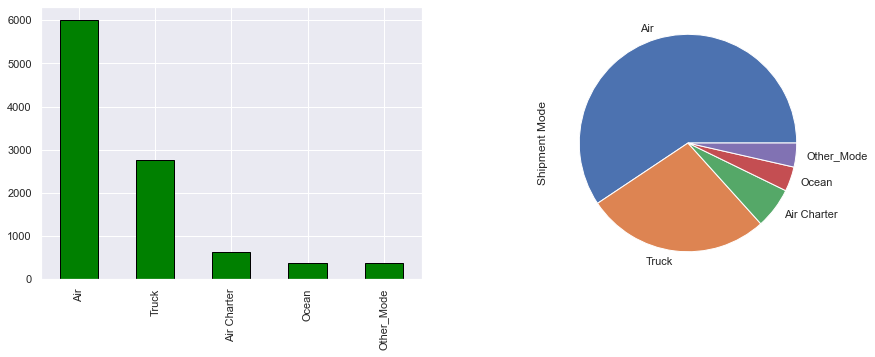

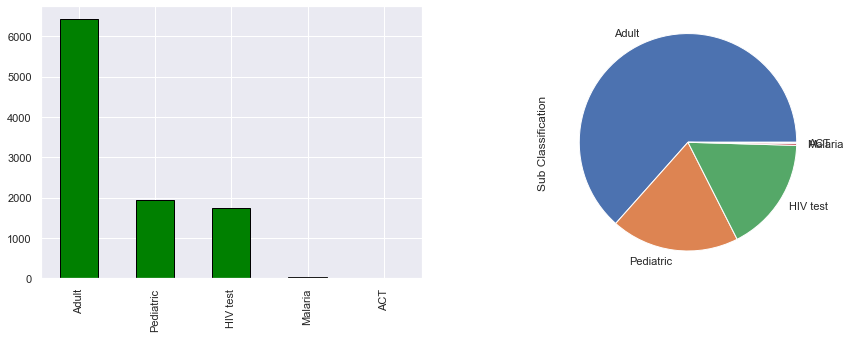

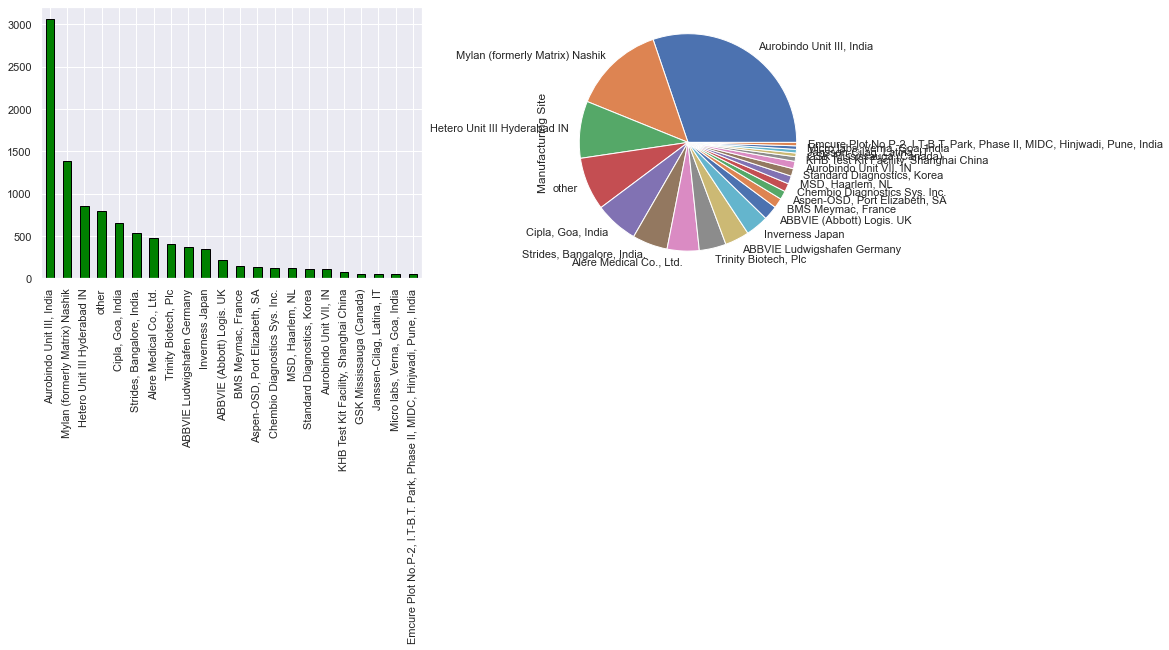

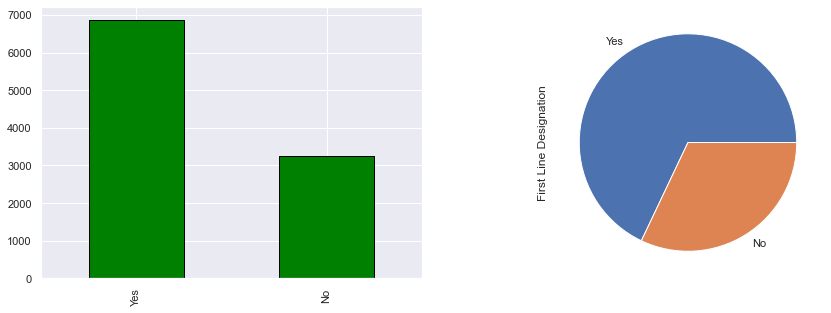

In [142]:
# Plotting categorical columns

plt.figure(figsize = (15,10))

f_cat = cat_col.columns[:]

for i in enumerate(f_cat):
    
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    cat_col[i[1]].value_counts().plot.bar(color= 'Green',edgecolor='Black')

    ax1 = f.add_subplot(122)
    cat_col[i[1]].value_counts().plot.pie()
    
    
    plt.show()

### Outlier Detection

In [143]:
# Checking quntile values 

for i in num_col.columns:
    print(i)
    print(num_col[i].quantile([0.1,0.9,0.95,0.99]))
    print(num_col[i].describe())
    print('\n')

Unit of Measure (Per Pack)
0.10     30.0
0.90    180.0
0.95    240.0
0.99    300.0
Name: Unit of Measure (Per Pack), dtype: float64
count    10119.000000
mean        78.069770
std         76.814735
min          1.000000
25%         30.000000
50%         60.000000
75%         95.000000
max       1000.000000
Name: Unit of Measure (Per Pack), dtype: float64


Line Item Quantity
0.10        50.00
0.90     53235.00
0.95     90278.00
0.99    188968.52
Name: Line Item Quantity, dtype: float64
count     10119.000000
mean      18327.125210
std       40214.723611
min           1.000000
25%         400.000000
50%        3000.000000
75%       17000.000000
max      619999.000000
Name: Line Item Quantity, dtype: float64


Line Item Value
0.10        614.760
0.90     435482.520
0.95     700024.020
0.99    1594507.289
Name: Line Item Value, dtype: float64
count    1.011900e+04
mean     1.572362e+05
std      3.446755e+05
min      0.000000e+00
25%      4.283825e+03
50%      3.040000e+04
75%      1.65451

In [144]:
# Removing values beyond 98% 

quartile_1 = df['Unit of Measure (Per Pack)'].quantile(0.99)
df = df[df["Unit of Measure (Per Pack)"] < quartile_1]

quartile_2 = df['Pack Price'].quantile(0.99)
df = df[df["Pack Price"] < quartile_2]

quartile_3 = df['Unit Price'].quantile(0.99)
df = df[df["Unit Price"] < quartile_3]

quartile_5 = df['days to Process'].quantile(0.1)
df = df[df["days to Process"] > quartile_5]

quartile_6 = df['days to Process'].quantile(0.99)
df = df[df["days to Process"] < quartile_6]

In [145]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
38  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
39  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
41  Pre-PQ Process      SCMS      ASN         Guyana  Direct Drop   
43  Pre-PQ Process      SCMS      ASN       Zimbabwe  Direct Drop   
44  Pre-PQ Process      SCMS      ASN        Nigeria  Direct Drop   

   Vendor INCO Term Shipment Mode Sub Classification  \
38              EXW           Air           HIV test   
39              EXW           Air           HIV test   
41              EXW           Air           HIV test   
43              EXW           Air           HIV test   
44              EXW           Air           HIV test   

    Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
38                          40                 476         36176.00   
39                          25                 659         13180.00   
41                         100                 213             2.13   
43                         100                1634        117631.66   
44                          20                1425         38475.00   

    Pack Price  Unit Price             Manufacturing Site  \
38       76.00        1.90                          other   
39       20.00        0.80    Standard Diagnostics, Korea   
41        0.01        0.00                Inverness Japan   
43       71.99        0.72                Inverness Japan   
44       27.00        1.35  Chembio Diagnostics Sys. Inc.   

   First Line Designation  Freight Cost (USD)  Line Item Insurance (USD)  \
38                    Yes             5446.51                      57.88   
39                    Yes             2656.12                      25.83   
41                    Yes              360.00                       0.00   
43                    Yes             4112.46                     188.21   
44                    Yes             5468.88                      61.56   

    days to Process  
38           -349.0  
39            -74.0  
41           -308.0  
43           -196.0  
44           -410.0

## Data Visualization (Bi-Variate)

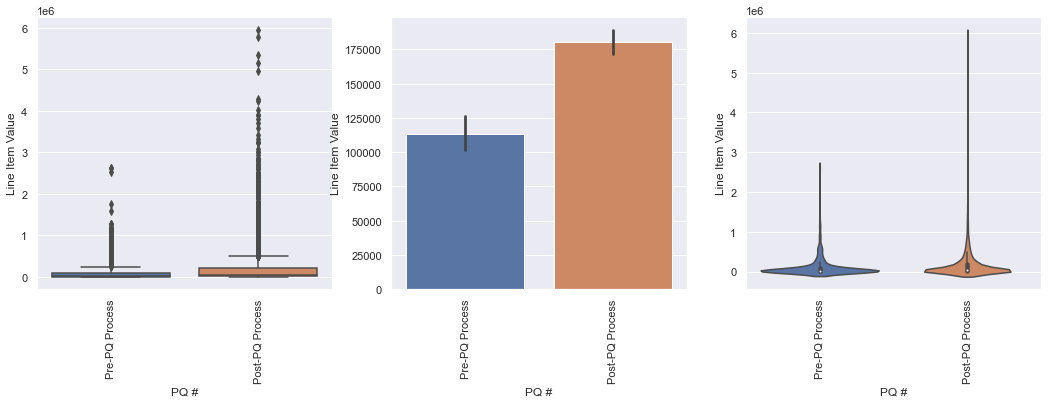

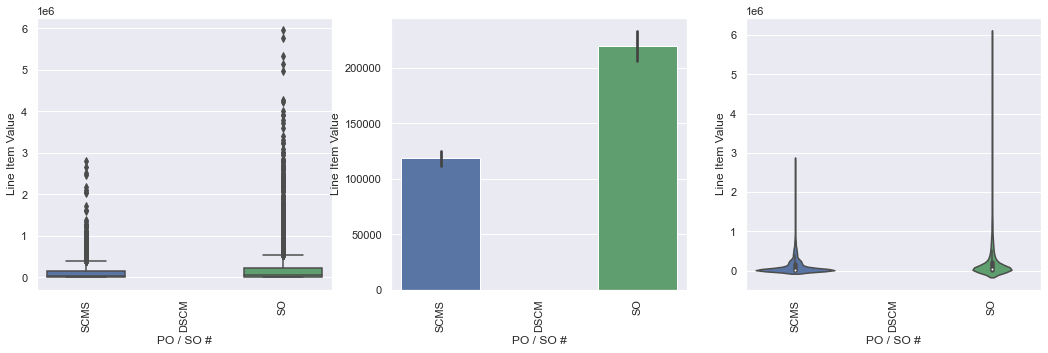

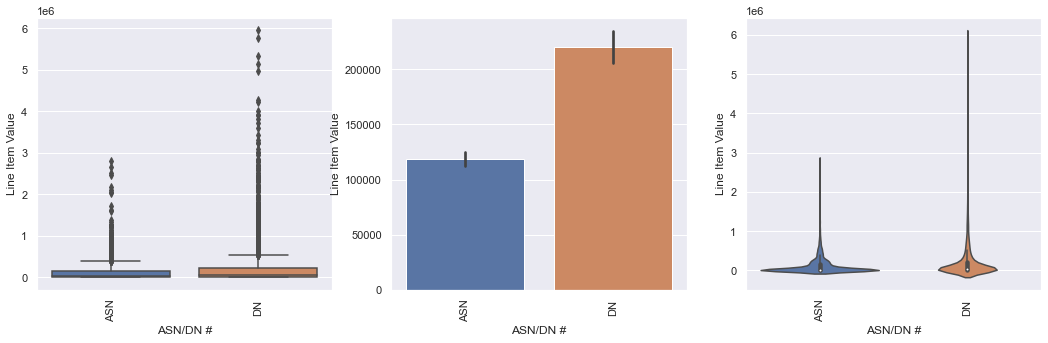

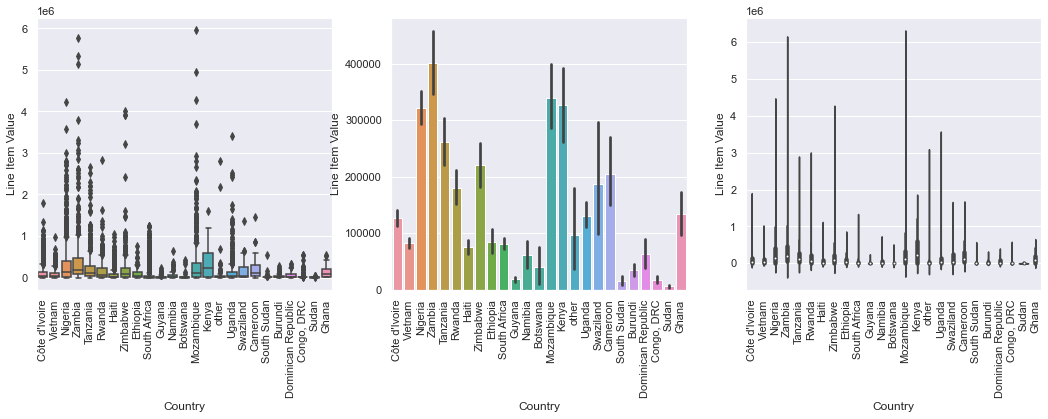

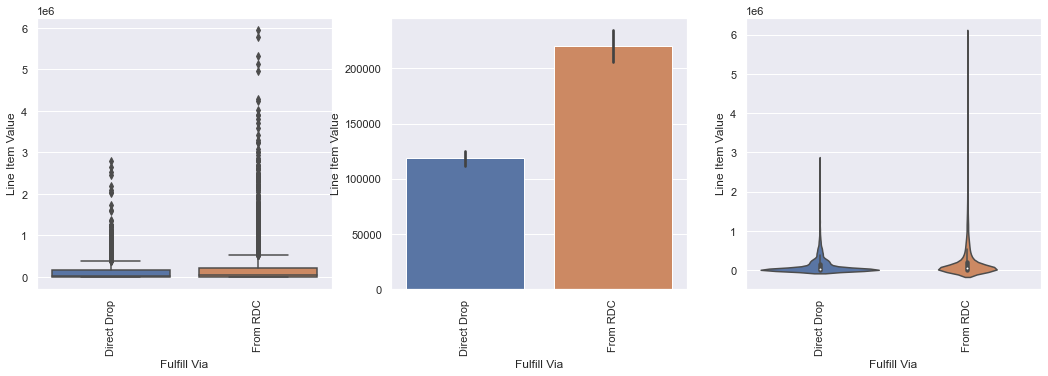

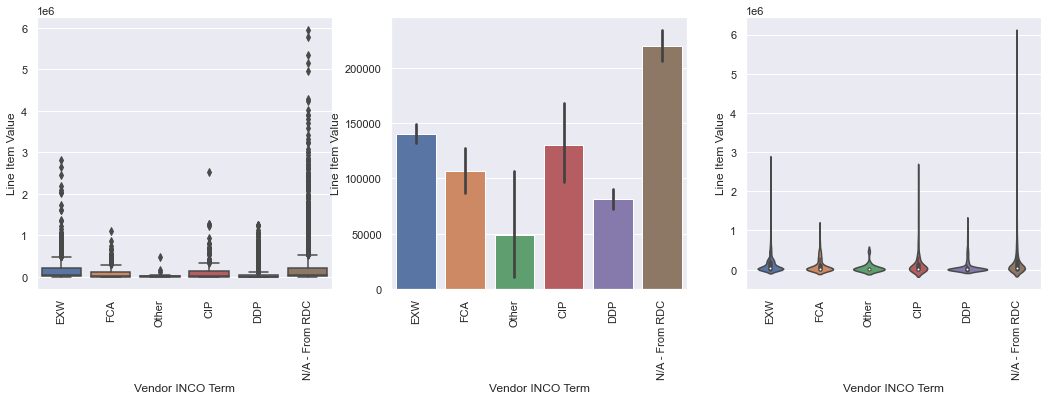

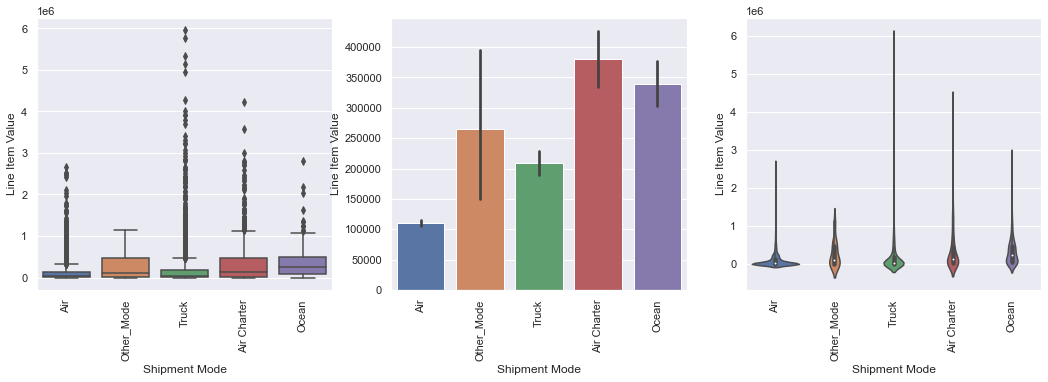

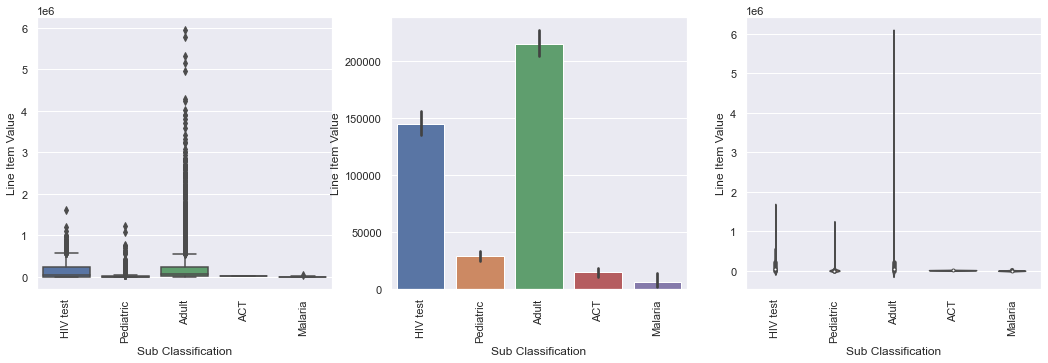

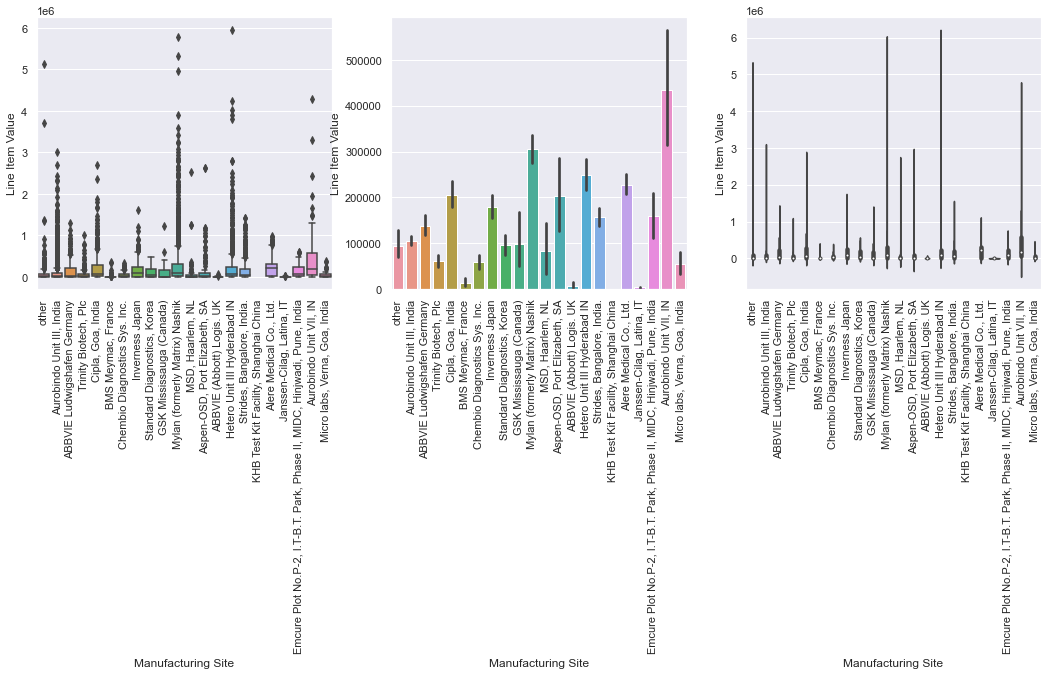

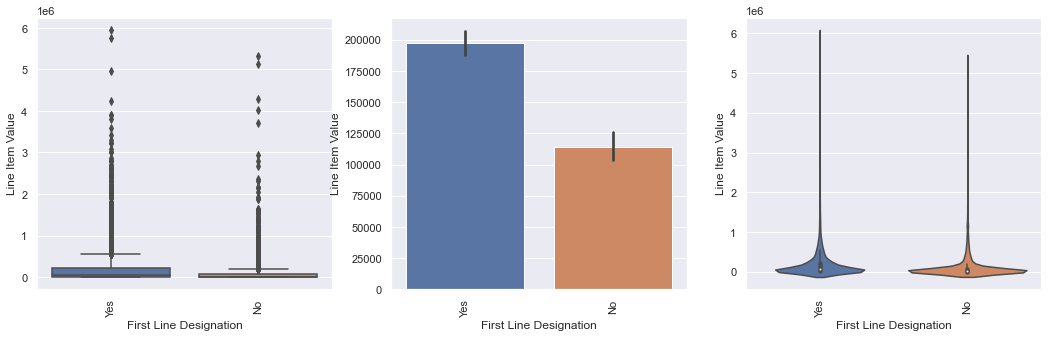

In [146]:
# Plotting categorical columns vs. Target column

f_cat = cat_col.columns[:]

for i in enumerate(f_cat):
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(131)
    sns.boxplot(x = cat_col[i[1]], y= df['Line Item Value'])
    plt.xticks(rotation=90)

    ax1 = f.add_subplot(132)
    sns.barplot(x = cat_col[i[1]], y= df['Line Item Value'])
    plt.xticks(rotation=90)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(x = cat_col[i[1]], y= df['Line Item Value'], orient= 'vertical')
    plt.xticks(rotation=90)
    plt.show()

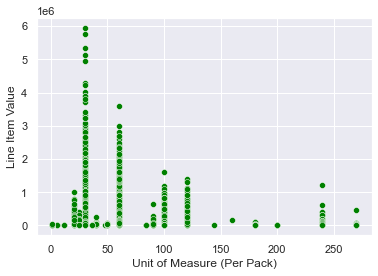

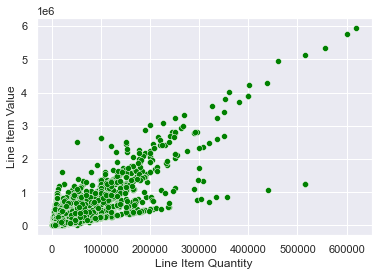

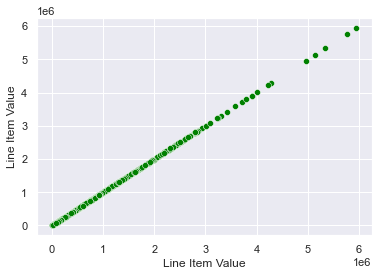

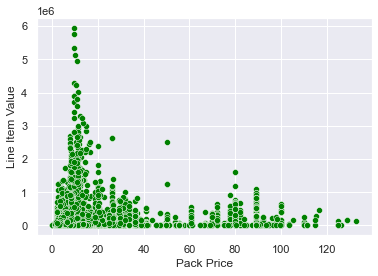

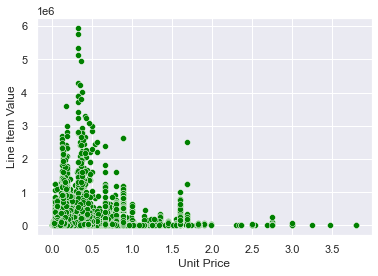

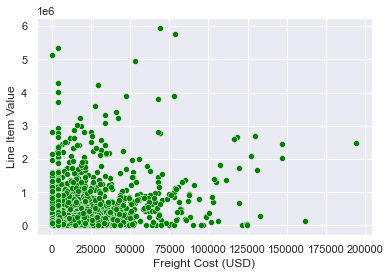

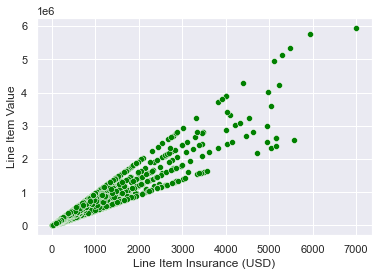

In [147]:
# Plotting numerical columns vs. Target column

f_num = num_col.columns[:-1]

for i in enumerate(f_num):

    sns.scatterplot(num_col[i[1]], y= df['Line Item Value'], color= 'Green')
    plt.show()

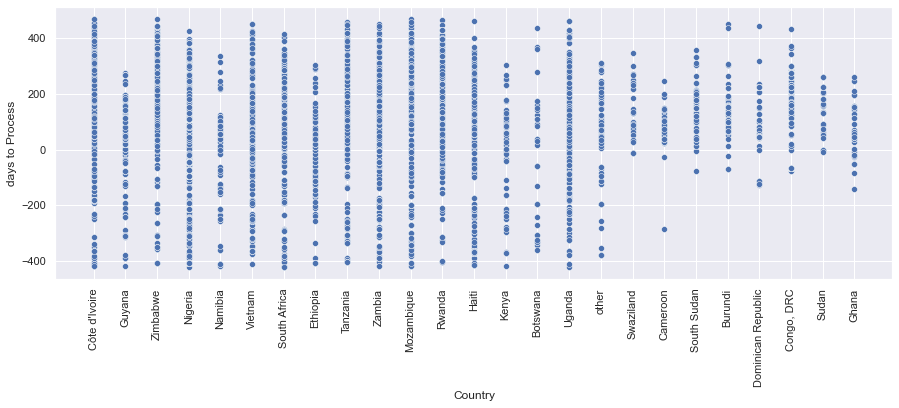

In [148]:
# Plotting Country vs days to Process
plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'], df['days to Process'])
plt.xticks(rotation=90)
plt.show()

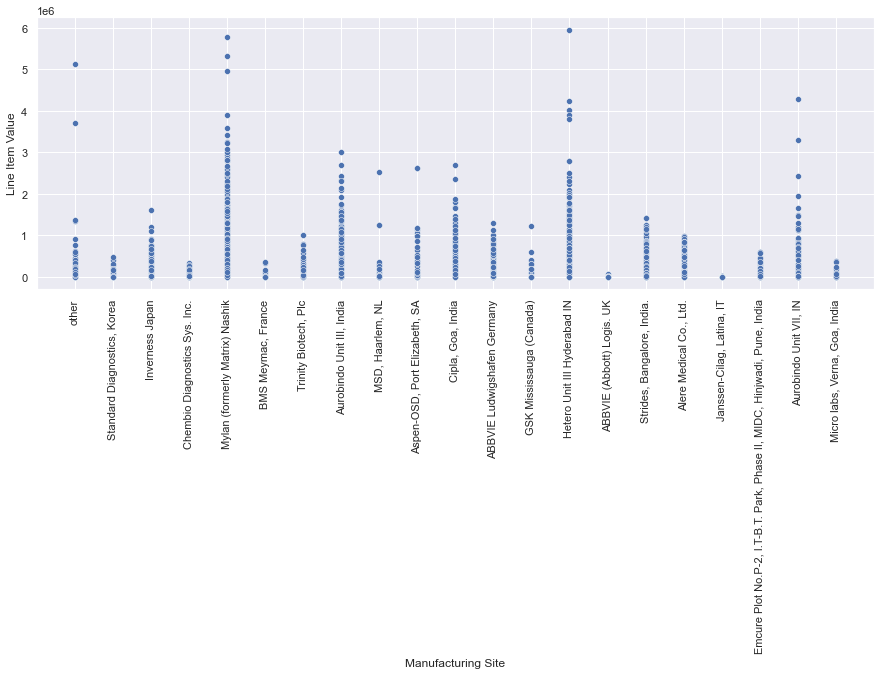

In [149]:
# Plotting Country vs. Total_Cost 
plt.figure(figsize=(15,5))
sns.scatterplot(df['Manufacturing Site'], df['Line Item Value'])
plt.xticks(rotation=90)
plt.show()


## Data Visualization (Bi-Variate)

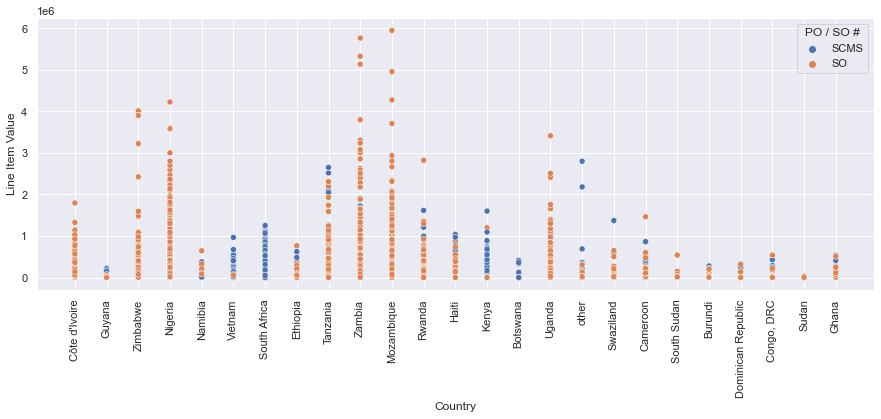

In [150]:
# Plotting Country vs. Total_Cost vs Po / SO #

plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'], df['Line Item Value'], hue = df['PO / SO #'])
plt.xticks(rotation=90)
plt.show()


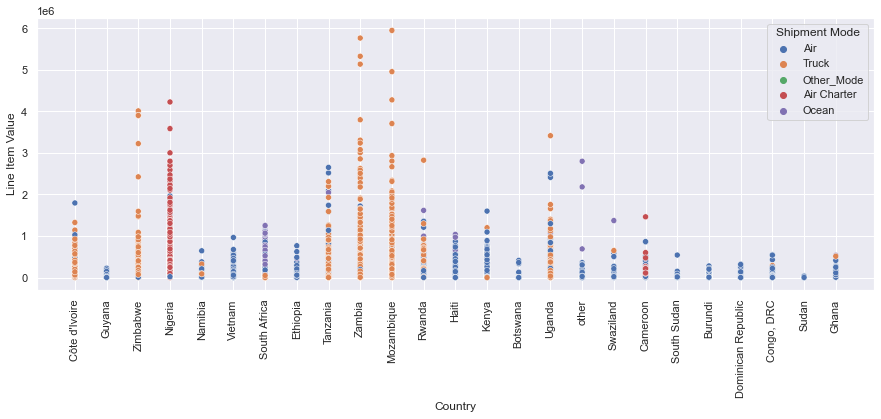

In [151]:
# Plotting Country vs. Total_Cost vs Shipment Mode

plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'], df['Line Item Value'], hue = df['Shipment Mode'])
plt.xticks(rotation=90)
plt.show()


In [152]:
# Plotting Country vs. Total_Cost vs Sub Classification

plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'],df['Line Item Value'], hue = df['Sub Classification'])
plt.xticks(rotation=90)
plt.show()

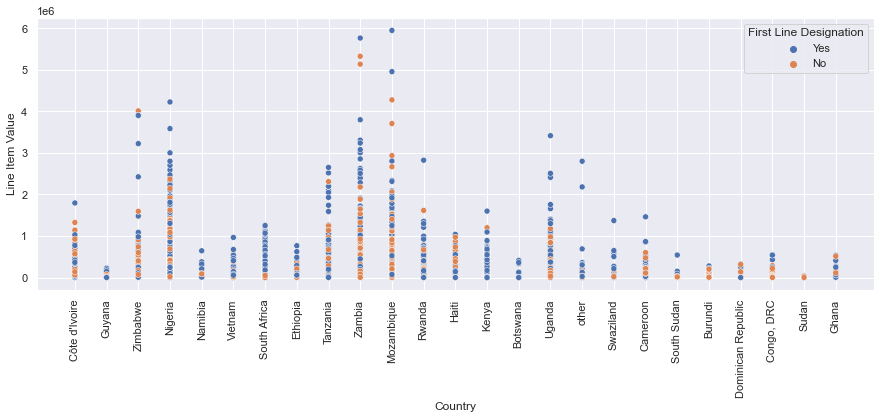

In [153]:
# Plotting Country vs. Total_Cost vs First Line Designation

plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'],df['Line Item Value'], hue = df['First Line Designation'])
plt.xticks(rotation=90)
plt.show()

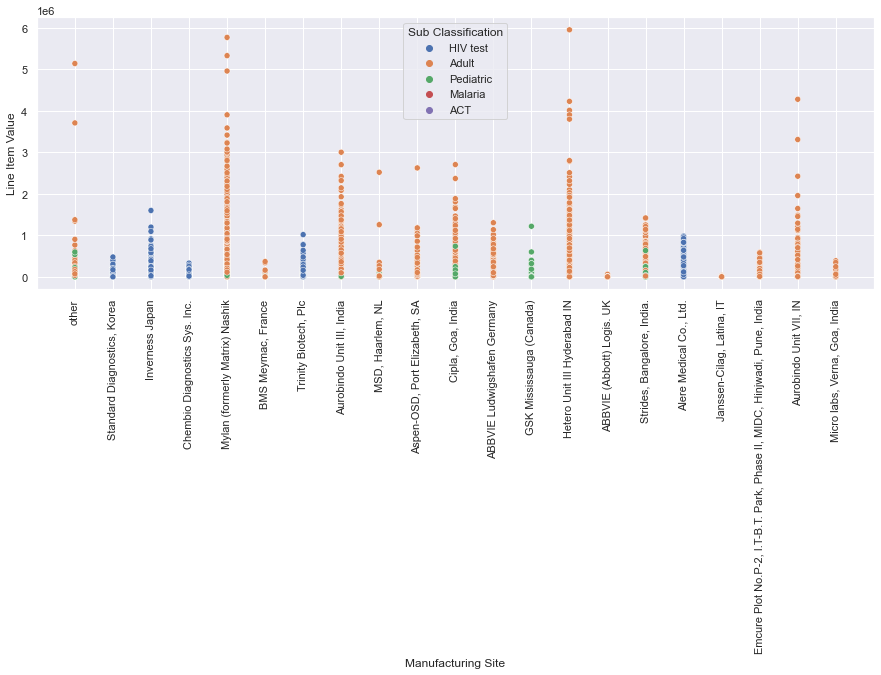

In [154]:
# Plotting Country vs. Total_Cost vs First Line Designation

plt.figure(figsize=(15,5))
sns.scatterplot(df['Manufacturing Site'],df['Line Item Value'], hue = df['Sub Classification'])
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

In [155]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
38  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
39  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
41  Pre-PQ Process      SCMS      ASN         Guyana  Direct Drop   
43  Pre-PQ Process      SCMS      ASN       Zimbabwe  Direct Drop   
44  Pre-PQ Process      SCMS      ASN        Nigeria  Direct Drop   

   Vendor INCO Term Shipment Mode Sub Classification  \
38              EXW           Air           HIV test   
39              EXW           Air           HIV test   
41              EXW           Air           HIV test   
43              EXW           Air           HIV test   
44              EXW           Air           HIV test   

    Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
38                          40                 476         36176.00   
39                          25                 659         13180.00   
41                         100                 213             2.13   
43                         100                1634        117631.66   
44                          20                1425         38475.00   

    Pack Price  Unit Price             Manufacturing Site  \
38       76.00        1.90                          other   
39       20.00        0.80    Standard Diagnostics, Korea   
41        0.01        0.00                Inverness Japan   
43       71.99        0.72                Inverness Japan   
44       27.00        1.35  Chembio Diagnostics Sys. Inc.   

   First Line Designation  Freight Cost (USD)  Line Item Insurance (USD)  \
38                    Yes             5446.51                      57.88   
39                    Yes             2656.12                      25.83   
41                    Yes              360.00                       0.00   
43                    Yes             4112.46                     188.21   
44                    Yes             5468.88                      61.56   

    days to Process  
38           -349.0  
39            -74.0  
41           -308.0  
43           -196.0  
44           -410.0

In [156]:
# Converting Nominal data columns using dummiy variables

PQ = pd.get_dummies(df['PQ #'], drop_first=True)
df = pd.concat([df, PQ], axis = 1)

PO_SO = pd.get_dummies(df['PO / SO #'],prefix ='PO_SO', drop_first=True)
df = pd.concat([df, PO_SO], axis = 1)

ASN_DN = pd.get_dummies(df['ASN/DN #'],prefix ='ASN_DN', drop_first=True)
df = pd.concat([df, ASN_DN], axis = 1)

#Country = pd.get_dummies(df['Country'],prefix ='Country', drop_first=True)
#df = pd.concat([df, Country], axis = 1)

Fulfill_Via = pd.get_dummies(df['Fulfill Via'],prefix ='Fulfill_Via', drop_first=True)
df = pd.concat([df, Fulfill_Via], axis = 1)

Vendor_INCO_Term = pd.get_dummies(df['Vendor INCO Term'],prefix ='Vendor_INCO_Term', drop_first=True)
df = pd.concat([df, Vendor_INCO_Term], axis = 1)

Shipment_Mode = pd.get_dummies(df['Shipment Mode'],prefix ='Shipment_Mode', drop_first=True)
df = pd.concat([df, Shipment_Mode], axis = 1)

Sub_Classification = pd.get_dummies(df['Sub Classification'],prefix ='Sub_Classification', drop_first=True)
df = pd.concat([df, Sub_Classification], axis = 1)

#Manufacturing_Site = pd.get_dummies(df['Manufacturing Site'],prefix ='Manufacturing_Site', drop_first=True)
#df = pd.concat([df, Manufacturing_Site], axis = 1)

First_Line_Designation = pd.get_dummies(df['First Line Designation'],prefix ='First_Line_Designation', drop_first=True)
df = pd.concat([df, First_Line_Designation], axis = 1)

In [157]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
38  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
39  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
41  Pre-PQ Process      SCMS      ASN         Guyana  Direct Drop   
43  Pre-PQ Process      SCMS      ASN       Zimbabwe  Direct Drop   
44  Pre-PQ Process      SCMS      ASN        Nigeria  Direct Drop   

   Vendor INCO Term Shipment Mode Sub Classification  \
38              EXW           Air           HIV test   
39              EXW           Air           HIV test   
41              EXW           Air           HIV test   
43              EXW           Air           HIV test   
44              EXW           Air           HIV test   

    Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
38                          40                 476         36176.00   
39                          25                 659         13180.00   
41                         100                 213             2.13   
43                         100                1634        117631.66   
44                          20                1425         38475.00   

    Pack Price  Unit Price             Manufacturing Site  \
38       76.00        1.90                          other   
39       20.00        0.80    Standard Diagnostics, Korea   
41        0.01        0.00                Inverness Japan   
43       71.99        0.72                Inverness Japan   
44       27.00        1.35  Chembio Diagnostics Sys. Inc.   

   First Line Designation  Freight Cost (USD)  Line Item Insurance (USD)  \
38                    Yes             5446.51                      57.88   
39                    Yes             2656.12                      25.83   
41                    Yes              360.00                       0.00   
43                    Yes             4112.46                     188.21   
44                    Yes             5468.88                      61.56   

    days to Process  Pre-PQ Process  PO_SO_SO  ASN_DN_DN  \
38           -349.0               1         0          0   
39            -74.0               1         0          0   
41           -308.0               1         0          0   
43           -196.0               1         0          0   
44           -410.0               1         0          0   

    Fulfill_Via_From RDC  Vendor_INCO_Term_DDP  Vendor_INCO_Term_EXW  \
38                     0                     0                     1   
39                     0                     0                     1   
41                     0                     0                     1   
43                     0                     0                     1   
44                     0                     0                     1   

    Vendor_INCO_Term_FCA  Vendor_INCO_Term_N/A - From RDC  \
38                     0                                0   
39                     0                                0   
41                     0                                0   
43                     0                                0   
44                     0                                0   

    Vendor_INCO_Term_Other  Shipment_Mode_Air Charter  Shipment_Mode_Ocean  \
38                       0                          0                    0   
39                       0                          0                    0   
41                       0                          0                    0   
43                       0                          0                    0   
44                       0                          0                    0   

    Shipment_Mode_Other_Mode  Shipment_Mode_Truck  Sub_Classification_Adult  \
38                         0                    0                         0   
39                         0                    0                         0   
41                         0                    0                         0   
43                         0                    0                

In [158]:
# Dropping original columns whose dummiy variables are created

df = df.drop(['PQ #', 
              'PO / SO #', 
              'ASN/DN #', 
              'Country', 
              'Fulfill Via', 
              'Vendor INCO Term', 
              'Shipment Mode',
              'Sub Classification', 
              'Manufacturing Site', 
              'First Line Designation'], axis= 1)

In [159]:
df.head()

Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
38                          40                 476         36176.00   
39                          25                 659         13180.00   
41                         100                 213             2.13   
43                         100                1634        117631.66   
44                          20                1425         38475.00   

    Pack Price  Unit Price  Freight Cost (USD)  Line Item Insurance (USD)  \
38       76.00        1.90             5446.51                      57.88   
39       20.00        0.80             2656.12                      25.83   
41        0.01        0.00              360.00                       0.00   
43       71.99        0.72             4112.46                     188.21   
44       27.00        1.35             5468.88                      61.56   

    days to Process  Pre-PQ Process  PO_SO_SO  ASN_DN_DN  \
38           -349.0               1         0          0   
39            -74.0               1         0          0   
41           -308.0               1         0          0   
43           -196.0               1         0          0   
44           -410.0               1         0          0   

    Fulfill_Via_From RDC  Vendor_INCO_Term_DDP  Vendor_INCO_Term_EXW  \
38                     0                     0                     1   
39                     0                     0                     1   
41                     0                     0                     1   
43                     0                     0                     1   
44                     0                     0                     1   

    Vendor_INCO_Term_FCA  Vendor_INCO_Term_N/A - From RDC  \
38                     0                                0   
39                     0                                0   
41                     0                                0   
43                     0                                0   
44                     0                                0   

    Vendor_INCO_Term_Other  Shipment_Mode_Air Charter  Shipment_Mode_Ocean  \
38                       0                          0                    0   
39                       0                          0                    0   
41                       0                          0                    0   
43                       0                          0                    0   
44                       0                          0                    0   

    Shipment_Mode_Other_Mode  Shipment_Mode_Truck  Sub_Classification_Adult  \
38                         0                    0                         0   
39                         0                    0                         0   
41                         0                    0                         0   
43                         0                    0                         0   
44                         0                    0                         0   

    Sub_Classification_HIV test  Sub_Classification_Malaria  \
38                            1                           0   
39                            1                           0   
41                            1                           0   
43                            1                           0   
44                            1                           0   

    Sub_Classification_Pediatric  First_Line_Designation_Yes  
38                             0                           1  
39                             0                           1  
41                             0                           1  
43                             0                           1  
44                             0                           1

In [160]:
df.shape

(8606, 26)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8606 entries, 38 to 10323
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unit of Measure (Per Pack)       8606 non-null   int64  
 1   Line Item Quantity               8606 non-null   int64  
 2   Line Item Value                  8606 non-null   float64
 3   Pack Price                       8606 non-null   float64
 4   Unit Price                       8606 non-null   float64
 5   Freight Cost (USD)               8606 non-null   float64
 6   Line Item Insurance (USD)        8606 non-null   float64
 7   days to Process                  8606 non-null   float64
 8   Pre-PQ Process                   8606 non-null   uint8  
 9   PO_SO_SO                         8606 non-null   uint8  
 10  ASN_DN_DN                        8606 non-null   uint8  
 11  Fulfill_Via_From RDC             8606 non-null   uint8  
 12  Vendor_INCO_Term_D

<AxesSubplot:>

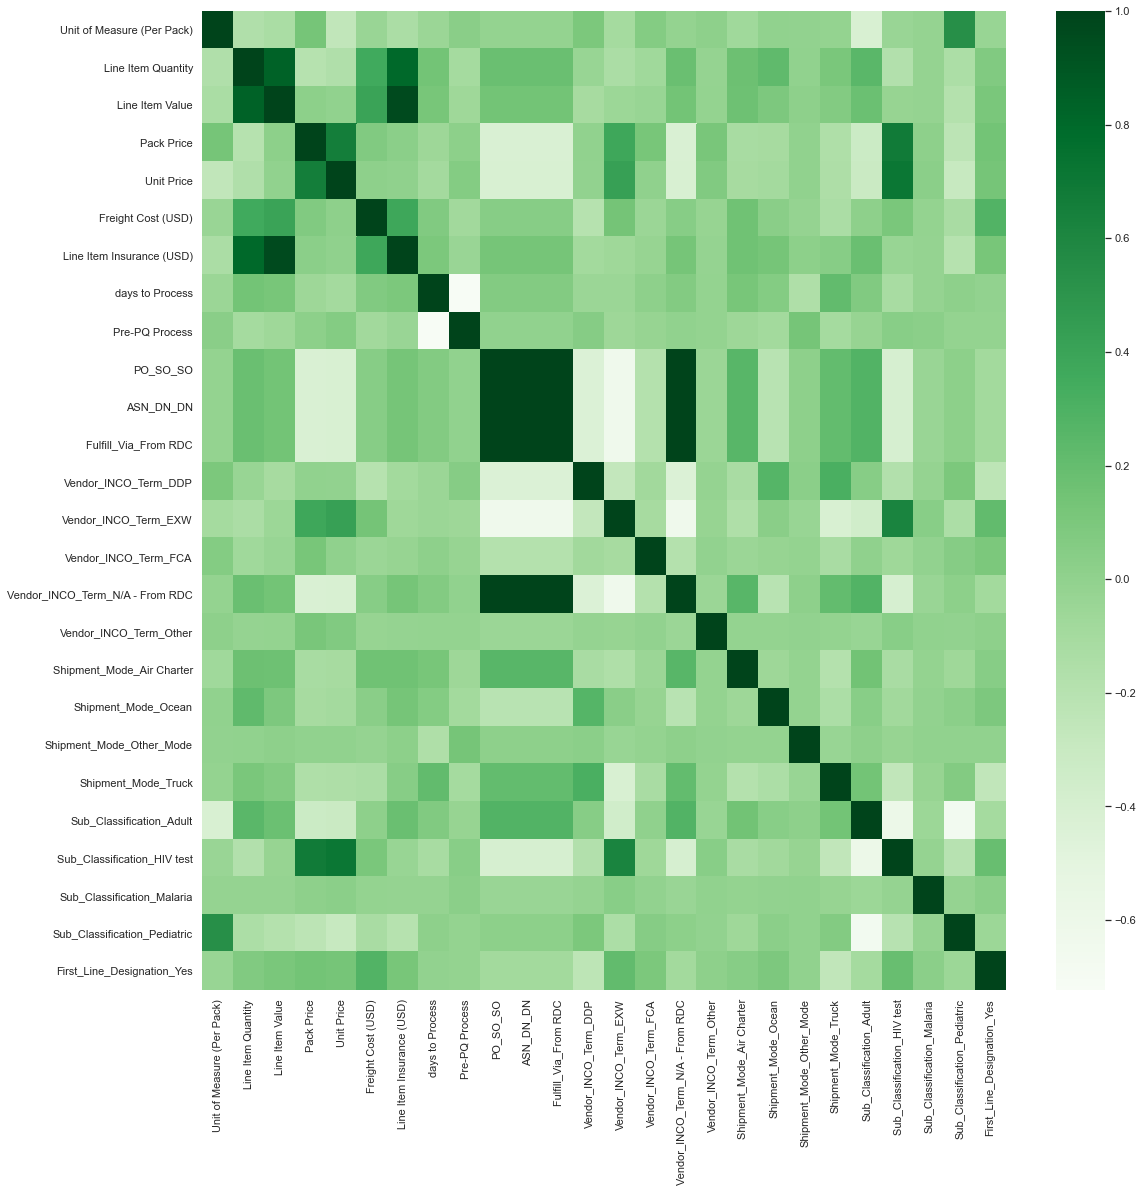

In [162]:
# Checking correlation
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot = True, cmap='Greens')

In [163]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print()
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations

ASN_DN_DN  Vendor_INCO_Term_N/A - From RDC    1.0
PO_SO_SO   ASN_DN_DN                          1.0
           Vendor_INCO_Term_N/A - From RDC    1.0
dtype: float64


#### We will use dimenstionality reduction techniques to reduce number of columns

## Data Pre-Processing

In [164]:
# Train-test split

from sklearn.model_selection import train_test_split

In [165]:
# Splitting dataset into train and test with train size 0.7

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(6024, 26)
(2582, 26)


In [166]:
# Checking numerical columns for scaling.

df_train.describe()

Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
count                 6024.000000         6024.000000     6.024000e+03   
mean                    70.760624        19922.633798     1.697866e+05   
std                     55.014189        42233.928825     3.674861e+05   
min                      1.000000            1.000000     0.000000e+00   
25%                     30.000000          470.000000     4.368820e+03   
50%                     60.000000         3500.000000     3.200000e+04   
75%                     60.000000        19997.000000     1.849887e+05   
max                    270.000000       600906.000000     5.768698e+06   

        Pack Price   Unit Price  Freight Cost (USD)  \
count  6024.000000  6024.000000         6024.000000   
mean     17.937874     0.340093         7602.236808   
std      23.315476     0.424720        12445.826321   
min       0.000000     0.000000            0.000000   
25%       4.040000     0.070000         1116.842500   
50%       8.550000     0.160000         3526.690000   
75%      20.000000     0.420000         8191.657500   
max     133.000000     3.800000       146734.850000   

       Line Item Insurance (USD)  days to Process  Pre-PQ Process  \
count                6024.000000      6024.000000      6024.00000   
mean                  250.941426       106.997510         0.15322   
std                   510.909857       171.383675         0.36023   
min                     0.000000      -420.000000         0.00000   
25%                     6.657500        40.000000         0.00000   
50%                    49.315000       129.000000         0.00000   
75%                   271.797500       216.000000         0.00000   
max                  5930.220000       468.000000         1.00000   

          PO_SO_SO    ASN_DN_DN  Fulfill_Via_From RDC  Vendor_INCO_Term_DDP  \
count  6024.000000  6024.000000           6024.000000           6024.000000   
mean      0.504482     0.504482              0.504482              0.158699   
std       0.500021     0.500021              0.500021              0.365425   
min       0.000000     0.000000              0.000000              0.000000   
25%       0.000000     0.000000              0.000000              0.000000   
50%       1.000000     1.000000              1.000000              0.000000   
75%       1.000000     1.000000              1.000000              0.000000   
max       1.000000     1.000000              1.000000              1.000000   

       Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
count           6024.000000           6024.000000   
mean               0.277224              0.029382   
std                0.447665              0.168890   
min                0.000000              0.000000   
25%                0.000000              0.000000   
50%                0.000000              0.000000   
75%                1.000000              0.000000   
max                1.000000              1.000000   

       Vendor_INCO_Term_N/A - From RDC  Vendor_INCO_Term_Other  \
count                      6024.000000             6024.000000   
mean                          0.504482                0.002158   
std                           0.500021                0.046408   
min                           0.000000                0.000000   
25%                           0.000000                0.000000   
50%                           1.000000                0.000000   
75%                           1.000000                0.000000   
max                           1.000000                1.000000   

       Shipment_Mode_Air Charter  Shipment_Mode_Ocean  \
count                6024.000000          6024.000000   
mean                    0.071713             0.042497   
std                     0.258034             0.201736   
min                     0.000000             0.000000   
25%                     0.000000             0.000000   
50%                     0.000000             0.000000   
75%                     0.000000      

In [167]:
df_test.describe()

Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
count                 2582.000000         2582.000000     2.582000e+03   
mean                    70.731216        20693.677769     1.699431e+05   
std                     55.734222        43677.115929     3.609320e+05   
min                      1.000000            1.000000     0.000000e+00   
25%                     30.000000          500.000000     4.554158e+03   
50%                     60.000000         3848.000000     3.593961e+04   
75%                     60.000000        19803.250000     1.820323e+05   
max                    270.000000       619999.000000     5.951990e+06   

        Pack Price   Unit Price  Freight Cost (USD)  \
count  2582.000000  2582.000000         2582.000000   
mean     18.491813     0.348842         7762.066538   
std      24.027027     0.444811        13388.706613   
min       0.000000     0.000000            0.000000   
25%       3.950000     0.080000         1376.930000   
50%       8.550000     0.160000         3526.690000   
75%      20.220000     0.410000         8225.947500   
max     128.750000     3.800000       194623.440000   

       Line Item Insurance (USD)  days to Process  Pre-PQ Process  \
count                2582.000000      2582.000000     2582.000000   
mean                  257.741991       111.179318        0.162665   
std                   529.812894       168.005164        0.369131   
min                     0.000000      -420.000000        0.000000   
25%                     6.952500        44.000000        0.000000   
50%                    56.380000       133.500000        0.000000   
75%                   275.082500       219.000000        0.000000   
max                  7005.490000       468.000000        1.000000   

          PO_SO_SO    ASN_DN_DN  Fulfill_Via_From RDC  Vendor_INCO_Term_DDP  \
count  2582.000000  2582.000000           2582.000000           2582.000000   
mean      0.509295     0.509295              0.509295              0.153757   
std       0.500010     0.500010              0.500010              0.360785   
min       0.000000     0.000000              0.000000              0.000000   
25%       0.000000     0.000000              0.000000              0.000000   
50%       1.000000     1.000000              1.000000              0.000000   
75%       1.000000     1.000000              1.000000              0.000000   
max       1.000000     1.000000              1.000000              1.000000   

       Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
count           2582.000000           2582.000000   
mean               0.278079              0.032920   
std                0.448139              0.178462   
min                0.000000              0.000000   
25%                0.000000              0.000000   
50%                0.000000              0.000000   
75%                1.000000              0.000000   
max                1.000000              1.000000   

       Vendor_INCO_Term_N/A - From RDC  Vendor_INCO_Term_Other  \
count                      2582.000000             2582.000000   
mean                          0.509295                0.002324   
std                           0.500010                0.048159   
min                           0.000000                0.000000   
25%                           0.000000                0.000000   
50%                           1.000000                0.000000   
75%                           1.000000                0.000000   
max                           1.000000                1.000000   

       Shipment_Mode_Air Charter  Shipment_Mode_Ocean  \
count                2582.000000          2582.000000   
mean                    0.072037             0.043377   
std                     0.258600             0.203744   
min                     0.000000             0.000000   
25%                     0.000000             0.000000   
50%                     0.000000             0.000000   
75%                     0.000000      

##  Feature Scaling

In [168]:
# Importing Sklearn library for scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [169]:
# Instantiate an object

scaler = MinMaxScaler()

df_train_sc = scaler.fit_transform(df_train)

df_test_sc = scaler.transform(df_test)

In [170]:
df_train_sc = pd.DataFrame(df_train_sc, columns = df_train.columns)
df_train_sc.head()

Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                    0.219331            0.019968         0.015081   
1                    0.107807            0.001516         0.002184   
2                    0.219331            0.007575         0.002368   
3                    0.107807            0.001330         0.003828   
4                    0.219331            0.000008         0.000083   

   Pack Price  Unit Price  Freight Cost (USD)  Line Item Insurance (USD)  \
0    0.054511    0.031579            0.042579                   0.024207   
1    0.103835    0.121053            0.000000                   0.002501   
2    0.022556    0.013158            0.000000                   0.004514   
3    0.207519    0.242105            0.005441                   0.003828   
4    0.601429    0.350000            0.000000                   0.000083   

   days to Process  Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Fulfill_Via_From RDC  \
0         0.582207             0.0       0.0        0.0                   0.0   
1         0.520270             0.0       0.0        0.0                   0.0   
2         0.477477             1.0       0.0        0.0                   0.0   
3         0.567568             0.0       0.0        0.0                   0.0   
4         0.582207             0.0       0.0        0.0                   0.0   

   Vendor_INCO_Term_DDP  Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
0                   0.0                   1.0                   0.0   
1                   1.0                   0.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   1.0                   0.0                   0.0   

   Vendor_INCO_Term_N/A - From RDC  Vendor_INCO_Term_Other  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   

   Shipment_Mode_Air Charter  Shipment_Mode_Ocean  Shipment_Mode_Other_Mode  \
0                        0.0                  0.0                       0.0   
1                        0.0                  0.0                       0.0   
2                        0.0                  0.0                       0.0   
3                        0.0                  0.0                       0.0   
4                        0.0                  0.0                       0.0   

   Shipment_Mode_Truck  Sub_Classification_Adult  Sub_Classification_HIV test  \
0                  0.0                       1.0                          0.0   
1                  1.0                       1.0                          0.0   
2                  1.0                       1.0                          0.0   
3                  0.0                       0.0                          1.0   
4                  1.0                       1.0                          0.0   

   Sub_Classification_Malaria  Sub_Classification_Pediatric  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                         0.0                           0.0   

   First_Line_Designation_Yes  
0                         1.0  
1                         0.0  
2                         0.0  
3                         1.0  
4                         0.0

In [171]:
df_test_sc = pd.DataFrame(df_test_sc, columns = df_test.columns)
df_test_sc.head()

Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                    0.368030            0.000331         0.002496   
1                    0.107807            0.016830         0.014429   
2                    0.107807            0.015928         0.007483   
3                    0.107807            0.000107         0.000023   
4                    0.070632            0.000612         0.002047   

   Pack Price  Unit Price  Freight Cost (USD)  Line Item Insurance (USD)  \
0    0.541278    0.189474            0.007007                   0.003885   
1    0.061880    0.071053            0.024034                   0.023159   
2    0.033910    0.039474            0.000000                   0.015694   
3    0.015038    0.018421            0.005338                   0.000027   
4    0.240602    0.421053            0.011790                   0.002047   

   days to Process  Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Fulfill_Via_From RDC  \
0         0.065315             1.0       0.0        0.0                   0.0   
1         0.766892             0.0       1.0        1.0                   1.0   
2         0.878378             0.0       0.0        0.0                   0.0   
3         0.388514             0.0       0.0        0.0                   0.0   
4         0.614865             0.0       0.0        0.0                   0.0   

   Vendor_INCO_Term_DDP  Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
0                   0.0                   1.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   0.0                   1.0                   0.0   

   Vendor_INCO_Term_N/A - From RDC  Vendor_INCO_Term_Other  \
0                              0.0                     0.0   
1                              1.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   

   Shipment_Mode_Air Charter  Shipment_Mode_Ocean  Shipment_Mode_Other_Mode  \
0                        0.0                  0.0                       0.0   
1                        0.0                  0.0                       0.0   
2                        0.0                  1.0                       0.0   
3                        0.0                  0.0                       0.0   
4                        0.0                  0.0                       0.0   

   Shipment_Mode_Truck  Sub_Classification_Adult  Sub_Classification_HIV test  \
0                  0.0                       0.0                          1.0   
1                  1.0                       1.0                          0.0   
2                  0.0                       1.0                          0.0   
3                  0.0                       0.0                          0.0   
4                  0.0                       0.0                          1.0   

   Sub_Classification_Malaria  Sub_Classification_Pediatric  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           1.0   
4                         0.0                           0.0   

   First_Line_Designation_Yes  
0                         1.0  
1                         0.0  
2                         1.0  
3                         1.0  
4                         1.0

### Defining X_train & y_train for model building

In [172]:
# Defining the X_train, y_train

y_train_sc = df_train_sc['Line Item Value']
X_train_sc = df_train_sc.drop('Line Item Value',axis=1)
y_test_sc = df_test_sc['Line Item Value']
X_test_sc = df_test_sc.drop('Line Item Value',axis=1)

In [173]:
X_train_sc.head()

Unit of Measure (Per Pack)  Line Item Quantity  Pack Price  Unit Price  \
0                    0.219331            0.019968    0.054511    0.031579   
1                    0.107807            0.001516    0.103835    0.121053   
2                    0.219331            0.007575    0.022556    0.013158   
3                    0.107807            0.001330    0.207519    0.242105   
4                    0.219331            0.000008    0.601429    0.350000   

   Freight Cost (USD)  Line Item Insurance (USD)  days to Process  \
0            0.042579                   0.024207         0.582207   
1            0.000000                   0.002501         0.520270   
2            0.000000                   0.004514         0.477477   
3            0.005441                   0.003828         0.567568   
4            0.000000                   0.000083         0.582207   

   Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Fulfill_Via_From RDC  \
0             0.0       0.0        0.0                   0.0   
1             0.0       0.0        0.0                   0.0   
2             1.0       0.0        0.0                   0.0   
3             0.0       0.0        0.0                   0.0   
4             0.0       0.0        0.0                   0.0   

   Vendor_INCO_Term_DDP  Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
0                   0.0                   1.0                   0.0   
1                   1.0                   0.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   1.0                   0.0                   0.0   

   Vendor_INCO_Term_N/A - From RDC  Vendor_INCO_Term_Other  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   

   Shipment_Mode_Air Charter  Shipment_Mode_Ocean  Shipment_Mode_Other_Mode  \
0                        0.0                  0.0                       0.0   
1                        0.0                  0.0                       0.0   
2                        0.0                  0.0                       0.0   
3                        0.0                  0.0                       0.0   
4                        0.0                  0.0                       0.0   

   Shipment_Mode_Truck  Sub_Classification_Adult  Sub_Classification_HIV test  \
0                  0.0                       1.0                          0.0   
1                  1.0                       1.0                          0.0   
2                  1.0                       1.0                          0.0   
3                  0.0                       0.0                          1.0   
4                  1.0                       1.0                          0.0   

   Sub_Classification_Malaria  Sub_Classification_Pediatric  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                         0.0                           0.0   

   First_Line_Designation_Yes  
0                         1.0  
1                         0.0  
2                         0.0  
3                         1.0  
4                         0.0

In [174]:
y_train_sc.head()

0    0.015081
1    0.002184
2    0.002368
3    0.003828
4    0.000083
Name: Line Item Value, dtype: float64

## Linear Regression

Fitting a regression line through the training data using `statsmodels`.
by default, statsmodels fit a regression line passing through the origin. So adding a constant to explicitly fit using `sm.add_constant(X)`.

In [175]:
# Importng statsmodels library for api

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [176]:
# Linear model for X_train

X_train_lr = sm.add_constant(X_train_sc)

X_train_lr.head()

const  Unit of Measure (Per Pack)  Line Item Quantity  Pack Price  \
0    1.0                    0.219331            0.019968    0.054511   
1    1.0                    0.107807            0.001516    0.103835   
2    1.0                    0.219331            0.007575    0.022556   
3    1.0                    0.107807            0.001330    0.207519   
4    1.0                    0.219331            0.000008    0.601429   

   Unit Price  Freight Cost (USD)  Line Item Insurance (USD)  days to Process  \
0    0.031579            0.042579                   0.024207         0.582207   
1    0.121053            0.000000                   0.002501         0.520270   
2    0.013158            0.000000                   0.004514         0.477477   
3    0.242105            0.005441                   0.003828         0.567568   
4    0.350000            0.000000                   0.000083         0.582207   

   Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Fulfill_Via_From RDC  \
0             0.0       0.0        0.0                   0.0   
1             0.0       0.0        0.0                   0.0   
2             1.0       0.0        0.0                   0.0   
3             0.0       0.0        0.0                   0.0   
4             0.0       0.0        0.0                   0.0   

   Vendor_INCO_Term_DDP  Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
0                   0.0                   1.0                   0.0   
1                   1.0                   0.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   1.0                   0.0                   0.0   

   Vendor_INCO_Term_N/A - From RDC  Vendor_INCO_Term_Other  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   

   Shipment_Mode_Air Charter  Shipment_Mode_Ocean  Shipment_Mode_Other_Mode  \
0                        0.0                  0.0                       0.0   
1                        0.0                  0.0                       0.0   
2                        0.0                  0.0                       0.0   
3                        0.0                  0.0                       0.0   
4                        0.0                  0.0                       0.0   

   Shipment_Mode_Truck  Sub_Classification_Adult  Sub_Classification_HIV test  \
0                  0.0                       1.0                          0.0   
1                  1.0                       1.0                          0.0   
2                  1.0                       1.0                          0.0   
3                  0.0                       0.0                          1.0   
4                  1.0                       1.0                          0.0   

   Sub_Classification_Malaria  Sub_Classification_Pediatric  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                         0.0                           0.0   

   First_Line_Designation_Yes  
0                         1.0  
1                         0.0  
2                         0.0  
3                         1.0  
4                         0.0

In [177]:
# Checking dimensions of y_train

y_train_sc.shape

(6024,)

In [178]:
# Training OLS model

lr_sm = sm.OLS(y_train_sc,X_train_lr).fit()

In [179]:
# Checking p-values

round(lr_sm.pvalues,4)

const                              0.0332
Unit of Measure (Per Pack)         0.0205
Line Item Quantity                 0.0000
Pack Price                         0.0000
Unit Price                         0.0000
Freight Cost (USD)                 0.0000
Line Item Insurance (USD)          0.0000
days to Process                    0.8742
Pre-PQ Process                     0.0521
PO_SO_SO                           0.0083
ASN_DN_DN                          0.0083
Fulfill_Via_From RDC               0.0083
Vendor_INCO_Term_DDP               0.3281
Vendor_INCO_Term_EXW               0.0000
Vendor_INCO_Term_FCA               0.0009
Vendor_INCO_Term_N/A - From RDC    0.0083
Vendor_INCO_Term_Other             0.5730
Shipment_Mode_Air Charter          0.0292
Shipment_Mode_Ocean                0.0000
Shipment_Mode_Other_Mode           0.3469
Shipment_Mode_Truck                0.0000
Sub_Classification_Adult           0.2824
Sub_Classification_HIV test        0.5708
Sub_Classification_Malaria        

In [180]:
#Backward Elimination 

cols = list(X_train_sc.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_sc[cols]
    X_1 = sm.add_constant(X_1)
    lr = sm.OLS(y_train_sc,X_1).fit()
    p = pd.Series(lr.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Freight Cost (USD)', 'Line Item Insurance (USD)', 'Pre-PQ Process', 'PO_SO_SO', 'ASN_DN_DN', 'Fulfill_Via_From RDC', 'Vendor_INCO_Term_EXW', 'Vendor_INCO_Term_FCA', 'Vendor_INCO_Term_N/A - From RDC', 'Shipment_Mode_Air Charter', 'Shipment_Mode_Ocean', 'Shipment_Mode_Truck', 'Sub_Classification_Adult', 'Sub_Classification_Pediatric', 'First_Line_Designation_Yes']


In [181]:
# Training X_train and y_train with selected features

X_train_be = X_train_sc[selected_features_BE]
X_test_be = X_test_sc[selected_features_BE]

In [182]:
# Building a linear regression model
lr = LinearRegression()

# Fitting
lr.fit(X_train_be,y_train_sc)

# Predictions
y_pred_train_be = lr.predict(X_train_be)

y_pred_test_be = lr.predict(X_test_be)

In [183]:
# Check R2 score, rmse

from sklearn.metrics import r2_score,mean_squared_error

In [184]:
# Function for adjusted r2_score

def adjusted_r2_score(data,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [185]:
# Function for rmse

def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [186]:
#Evaluation 

print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_be))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_be))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_be))

R2 score of train data is  0.943643704772894
Adj. R2 score of train data is  0.9434653620664791
rmse score of train data is  0.015121620164794077

R2 score of test data is  0.9439674783789344
Adj. R2 score of test data is  0.9435519366495041
rmse score of test data is  0.014807564618234828


In [187]:
#Storing results

results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Linear Regression_BE',r2_score(y_train_sc,y_pred_train_be),
                             adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be),
                             rmse(y_train_sc,y_pred_train_be),r2_score(y_test_sc,y_pred_test_be),
                             adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be),rmse(y_test_sc,y_pred_test_be)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  Train_RMSE score  \
0  Linear Regression_BE        0.943644            0.943465          0.015122   

   Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0       0.943967           0.943552         0.014808

### Feature selection using RFE ( Recursive Feature Elimination)

In [188]:
from sklearn.feature_selection import RFE

# Features

features = X_train_sc.columns.tolist()

nof_list = np.arange(1,len(features)+1)   

high_score=0

# Variable to store the optimum features

nof=0  

score_list =[]

for n in range(len(nof_list)):
    
    lr = LinearRegression()
    rfe = RFE(lr,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_sc,y_train_sc)
    X_test_rfe = rfe.transform(X_test_sc)
    lr.fit(X_train_rfe,y_train_sc)
    score = lr.score(X_test_rfe,y_test_sc)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 22
Score with 22 features: 0.944022


In [189]:
#RFE with 8 features

lr = LinearRegression()

rfe = RFE(lr,n_features_to_select=nof)

X_train_rfe = rfe.fit_transform(X_train_sc,y_train_sc)

X_test_rfe = rfe.transform(X_test_sc)

#Fitting the data to model

lr.fit(X_train_rfe,y_train_sc)  

temp = pd.Series(rfe.support_,index = features)

selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price',
       'Unit Price', 'Freight Cost (USD)', 'Line Item Insurance (USD)',
       'Pre-PQ Process', 'PO_SO_SO', 'ASN_DN_DN', 'Vendor_INCO_Term_DDP',
       'Vendor_INCO_Term_EXW', 'Vendor_INCO_Term_FCA',
       'Vendor_INCO_Term_Other', 'Shipment_Mode_Air Charter',
       'Shipment_Mode_Ocean', 'Shipment_Mode_Other_Mode',
       'Shipment_Mode_Truck', 'Sub_Classification_Adult',
       'Sub_Classification_HIV test', 'Sub_Classification_Malaria',
       'Sub_Classification_Pediatric', 'First_Line_Designation_Yes'],
      dtype='object')


In [190]:
# predictions
y_pred_train_rfe = lr.predict(X_train_rfe)
y_pred_test_rfe = lr.predict(X_test_rfe)

In [191]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_rfe))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_rfe))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_rfe))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_rfe))

R2 score of train data is  0.9436762182191153
Adj. R2 score of train data is  0.9434697321002719
rmse score of train data is  0.015117257502957965

R2 score of test data is  0.9440216928724907
Adj. R2 score of test data is  0.9435404413067208
rmse score of test data is  0.014800399325011124


In [192]:
#Storing results
results.loc[len(results)] = ['Linear Regression_RFE',r2_score(y_train_sc,y_pred_train_rfe),
                             adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe),
                             rmse(y_train_sc,y_pred_train_rfe),r2_score(y_test_sc,y_pred_test_rfe),
                             adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe),rmse(y_test_sc,y_pred_test_rfe)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0   Linear Regression_BE        0.943644            0.943465   
1  Linear Regression_RFE        0.943676            0.943470   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.015122       0.943967           0.943552         0.014808  
1          0.015117       0.944022           0.943540         0.014800

### Feature selection using Lasso CV

In [193]:
# Using Lasso regression CV

from sklearn.linear_model import LassoCV

reg = LassoCV()

reg.fit(X_train_sc, y_train_sc)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

print("Best score using built-in LassoCV: %f" %reg.score(X_train_sc,y_train_sc))

coef = pd.Series(reg.coef_, index = X_train_sc.columns)

Best alpha using built-in LassoCV: 0.000005
Best score using built-in LassoCV: 0.943651


In [194]:
#Feature importance by Lasso
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 22 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

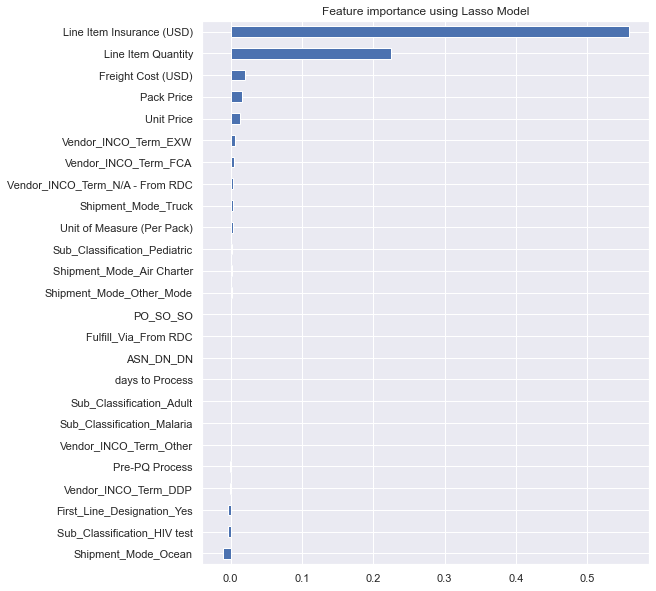

In [195]:
#Visualization

imp_coef_lasso = coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_coef_lasso.plot(kind = "barh")

plt.title("Feature importance using Lasso Model")

In [196]:
features_by_lasso = imp_coef_lasso

In [197]:
#predictions on train data

y_pred_train_ls = reg.predict(X_train_sc)

#predictions on test data

y_pred_test_ls = reg.predict(X_test_sc)

In [198]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ls))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ls))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ls))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ls))

R2 score of train data is  0.9436512807595043
Adj. R2 score of train data is  0.9434164161411295
rmse score of train data is  0.015120603729613127

R2 score of test data is  0.9441909673494157
Adj. R2 score of test data is  0.943645104354007
rmse score of test data is  0.014778004697188237


In [199]:
results.loc[len(results)] = ['Linear Regression_Lasso',r2_score(y_train_sc,y_pred_train_ls),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls),
                             rmse(y_train_sc,y_pred_train_ls),r2_score(y_test_sc,y_pred_test_ls),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls),rmse(y_test_sc,y_pred_test_ls)]

results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0     Linear Regression_BE        0.943644            0.943465   
1    Linear Regression_RFE        0.943676            0.943470   
2  Linear Regression_Lasso        0.943651            0.943416   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.015122       0.943967           0.943552         0.014808  
1          0.015117       0.944022           0.943540         0.014800  
2          0.015121       0.944191           0.943645         0.014778

In [200]:
from sklearn.linear_model import ElasticNetCV

# Instantiating ElasticNetCV
ECV = ElasticNetCV() 

# fitting on the training data
ECV.fit(X_train_sc, y_train_sc)  

# feature importance by ElasticNetCV
Coef = pd.Series(ECV.coef_, index=X_train_sc.columns)  

imp_Coef_elastic = Coef.sort_values(ascending=False)

Text(0.5, 1.0, 'Feature importance using ElasticNetCV Model')

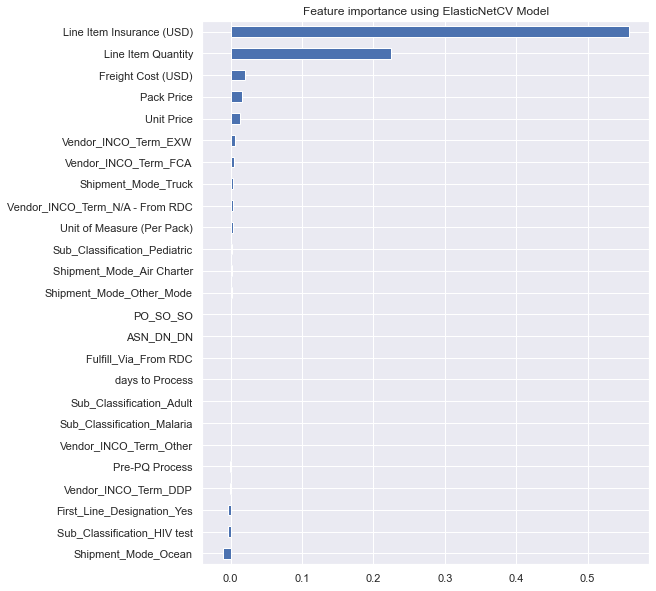

In [201]:
#Visualization

imp_Coef_elastic = Coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_Coef_elastic.plot(kind = "barh")

plt.title("Feature importance using ElasticNetCV Model")

In [202]:
features_by_ECV = imp_Coef_elastic

In [203]:
# predictions on the data
y_pred_train_ECV = ECV.predict(X_train_sc)  
y_pred_test_ECV = ECV.predict(X_test_sc)  

In [204]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ECV))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ECV))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ECV))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ECV))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ECV))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ECV))

R2 score of train data is  0.9436505856463899
Adj. R2 score of train data is  0.9434157181307447
rmse score of train data is  0.015120696992580574

R2 score of test data is  0.9442239865217401
Adj. R2 score of test data is  0.9436784464838072
rmse score of test data is  0.014773632379156812


In [205]:
results.loc[len(results)] = ['Linear Regression_ElasticNetCV',
                             r2_score(y_train_sc,y_pred_train_ECV),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ECV),
                             rmse(y_train_sc,y_pred_train_ECV),
                             r2_score(y_test_sc,y_pred_test_ECV),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ECV),
                             rmse(y_test_sc,y_pred_test_ECV)]

results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0            Linear Regression_BE        0.943644            0.943465   
1           Linear Regression_RFE        0.943676            0.943470   
2         Linear Regression_Lasso        0.943651            0.943416   
3  Linear Regression_ElasticNetCV        0.943651            0.943416   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.015122       0.943967           0.943552         0.014808  
1          0.015117       0.944022           0.943540         0.014800  
2          0.015121       0.944191           0.943645         0.014778  
3          0.015121       0.944224           0.943678         0.014774

### Residual Analysis

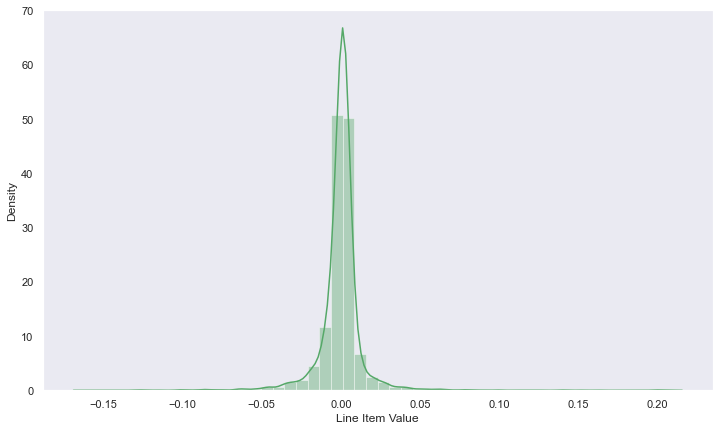

In [206]:
# check how error terms are distributed on train data
y_res = y_train_sc - y_pred_train_rfe
plt.figure(figsize=(12,7))
sns.distplot(y_res, kde = True, color = 'g')
plt.grid()
plt.show()

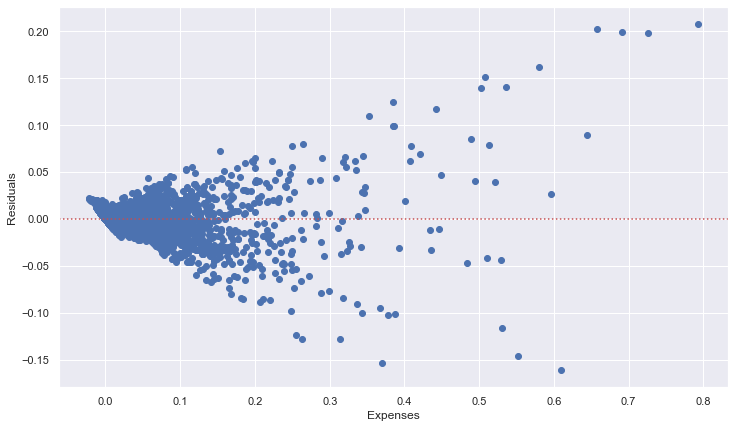

In [207]:
# residual vs predicitons plot

plt.figure(figsize=(12,7))
plt.scatter(y_pred_train_rfe, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Expenses")
plt.ylabel("Residuals")
plt.show()

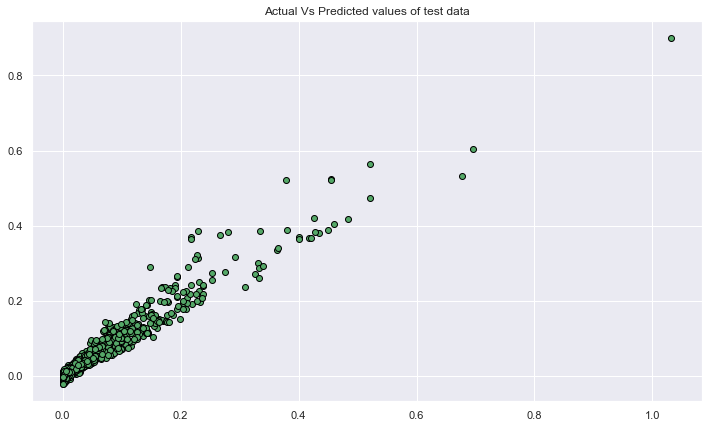

In [208]:
#actual test values vs predicted test values

plt.figure(figsize=(12,7))
plt.title('Actual Vs Predicted values of test data')
plt.scatter(y_test_sc, y_pred_test_rfe, color='g', edgecolor = 'Black')
plt.show()

## Decision Tree Regressor

In [209]:
# Importing decision tree regressor

from sklearn.tree import DecisionTreeRegressor

In [210]:
# Instantiating DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [211]:
# Splitting data set

y = df['Line Item Value']
X = df.drop('Line Item Value',axis=1)

In [212]:
#Train-test-split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42, shuffle = True)

print('The shapes of X_train = {0}, y_train = {1}, X_test = {2},y_test = {3}'.format(X_train.shape,
                                                                                     y_train.shape,
                                                                                     X_test.shape,
                                                                                     y_test.shape))

The shapes of X_train = (6024, 25), y_train = (6024,), X_test = (2582, 25),y_test = (2582,)


In [213]:
# Importing Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10]}

# randomized search cv

RCV = RandomizedSearchCV(estimator=dt, 
                         param_distributions=params, 
                         n_iter = 10,  
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [214]:
# Best estimator
RCV.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=4, min_samples_split=4)

In [215]:
# Best parameters
RCV.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'friedman_mse'}

In [216]:
# Based on the above parameters, let's build a decision tree regressor

dt1 = RCV.best_estimator_
dt1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=4, min_samples_split=4)

In [217]:
# Feature importance

dt1.feature_importances_

array([1.72728927e-04, 5.91150008e-02, 1.18073992e-02, 3.23229350e-03,
       1.39304009e-03, 9.19709363e-01, 2.63410998e-03, 3.33639682e-04,
       5.60056389e-08, 6.23017837e-06, 7.77256773e-08, 1.23218372e-03,
       8.55231470e-05, 0.00000000e+00, 6.38011484e-07, 0.00000000e+00,
       2.97750552e-05, 0.00000000e+00, 0.00000000e+00, 2.06385118e-04,
       1.32954640e-07, 0.00000000e+00, 0.00000000e+00, 1.10367606e-08,
       4.14120941e-05])

In [218]:
dt1_feature_imp = pd.DataFrame(dt1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])

dt1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace=True)

dt1_feature_imp

Feature_importance
Line Item Insurance (USD)              9.197094e-01
Line Item Quantity                     5.911500e-02
Pack Price                             1.180740e-02
Unit Price                             3.232293e-03
days to Process                        2.634110e-03
Freight Cost (USD)                     1.393040e-03
Vendor_INCO_Term_DDP                   1.232184e-03
Pre-PQ Process                         3.336397e-04
Shipment_Mode_Truck                    2.063851e-04
Unit of Measure (Per Pack)             1.727289e-04
Vendor_INCO_Term_EXW                   8.552315e-05
First_Line_Designation_Yes             4.141209e-05
Shipment_Mode_Air Charter              2.977506e-05
ASN_DN_DN                              6.230178e-06
Vendor_INCO_Term_N/A - From RDC        6.380115e-07
Sub_Classification_Adult               1.329546e-07
Fulfill_Via_From RDC                   7.772568e-08
PO_SO_SO                               5.600564e-08
Sub_Classification_Pediatric           1.103676e-08
Vendor_INCO_Term_FCA                   0.000000e+00
Vendor_INCO_Term_Other                 0.000000e+00
Shipment_Mode_Ocean                    0.000000e+00
Shipment_Mode_Other_Mode               0.000000e+00
Sub_Classification_HIV test            0.000000e+00
Sub_Classification_Malaria             0.000000e+00

In [219]:
dt1_feature_imp['Feature_importance'] = dt1_feature_imp[dt1_feature_imp['Feature_importance'] > 0.0001] 

dt1_feature_imp = dt1_feature_imp[dt1_feature_imp['Feature_importance'].notna()]

dt1_feature_imp

Feature_importance
Line Item Insurance (USD)             0.919709
Line Item Quantity                    0.059115
Pack Price                            0.011807
Unit Price                            0.003232
days to Process                       0.002634
Freight Cost (USD)                    0.001393
Vendor_INCO_Term_DDP                  0.001232
Pre-PQ Process                        0.000334
Shipment_Mode_Truck                   0.000206
Unit of Measure (Per Pack)            0.000173

In [220]:
top_features_dt1 = dt1_feature_imp.index

In [221]:
# Instantiating

dt2 = DecisionTreeRegressor()

#Considering only the above features

X_train_dt = X_train[top_features_dt1]

X_test_dt = X_test[top_features_dt1]

In [222]:
X_train_dt.head()

Line Item Insurance (USD)  Line Item Quantity  Pack Price  Unit Price  \
757                        1.45                 650        1.14        0.01   
1110                      68.55                3226       13.28        0.22   
4511                       5.54                1764        2.24        0.07   
8255                     776.63               59680       10.52        0.35   
6019                     573.60               56970        4.67        0.16   

      days to Process  Freight Cost (USD)  Vendor_INCO_Term_DDP  \
757            -131.0                0.00                     1   
1110           -377.0             2750.89                     0   
4511             96.0             1615.07                     0   
8255            247.0             4529.65                     0   
6019            159.0             5886.90                     1   

      Pre-PQ Process  Shipment_Mode_Truck  Unit of Measure (Per Pack)  
757                1                    0                         200  
1110               1                    0                          60  
4511               0                    0                          30  
8255               0                    1                          30  
6019               0                    0                          30

In [223]:
# Using randomized search CV for finding out the best hyper parameters

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10]}

RCV = RandomizedSearchCV(estimator=dt2, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train_dt,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [224]:
# Best params

RCV.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'friedman_mse'}

In [225]:
# Best estimator

RCV.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=4, min_samples_split=4)

In [226]:
# Best score

RCV.best_score_

0.9610187884823758

In [227]:
# Building a decision tree regressor using the best params by the Randomized search CV

dt2 = RCV.best_estimator_

# Fitting on train data

dt2.fit(X_train_dt,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=4, min_samples_split=4)

In [228]:
# Predictions on train data

y_pred_train = dt2.predict(X_train_dt)

In [229]:
# Predictions on test data

y_pred_test = dt2.predict(X_test_dt)

In [230]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_dt,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_dt,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.9892205689431675
Adj. R2 score of train data is  0.9892026420663059
rmse score of train data is  37218.79541674281

R2 score of test data is  0.9721726811247531
Adj. R2 score of test data is  0.9720644457343398
rmse score of test data is  63581.19137651201


In [231]:
#Updating the results
results.loc[len(results)] = ['Decision tree regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_dt,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_dt,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0            Linear Regression_BE        0.943644            0.943465   
1           Linear Regression_RFE        0.943676            0.943470   
2         Linear Regression_Lasso        0.943651            0.943416   
3  Linear Regression_ElasticNetCV        0.943651            0.943416   
4         Decision tree regressor        0.989221            0.989203   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.015122       0.943967           0.943552         0.014808  
1          0.015117       0.944022           0.943540         0.014800  
2          0.015121       0.944191           0.943645         0.014778  
3          0.015121       0.944224           0.943678         0.014774  
4      37218.795417       0.972173           0.972064     63581.191377

## Random Forest Regressor

In [232]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [233]:
params = {'n_estimators':[5,10,20,40,80],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10],
          'oob_score': [True]}


#randomized search cv
RCV = RandomizedSearchCV(estimator = rf, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         cv = 10, 
                         verbose=5, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [234]:
# Best parameters

RCV.best_params_

{'oob_score': True,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'mae'}

In [235]:
# Best estimator

RCV.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [236]:
# Best score

RCV.best_score_

0.9760411851740635

In [237]:
# Building randomforest regressor with the best estimator 

rf1 = RCV.best_estimator_

# Fitting

rf1.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [238]:
# Feature importances

rf1.feature_importances_

rf1_feature_imp = pd.DataFrame(rf1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])

rf1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)

round(rf1_feature_imp,3)

Feature_importance
Line Item Insurance (USD)                     0.850
Line Item Quantity                            0.073
Pack Price                                    0.028
Freight Cost (USD)                            0.012
days to Process                               0.011
Unit Price                                    0.011
Unit of Measure (Per Pack)                    0.003
Shipment_Mode_Truck                           0.003
Vendor_INCO_Term_DDP                          0.002
Pre-PQ Process                                0.002
Vendor_INCO_Term_EXW                          0.001
Shipment_Mode_Air Charter                     0.001
First_Line_Designation_Yes                    0.001
Shipment_Mode_Ocean                           0.000
PO_SO_SO                                      0.000
ASN_DN_DN                                     0.000
Fulfill_Via_From RDC                          0.000
Vendor_INCO_Term_N/A - From RDC               0.000
Sub_Classification_Pediatric                  0.000
Vendor_INCO_Term_FCA                          0.000
Sub_Classification_Adult                      0.000
Sub_Classification_HIV test                   0.000
Shipment_Mode_Other_Mode                      0.000
Vendor_INCO_Term_Other                        0.000
Sub_Classification_Malaria                    0.000

In [239]:
rf1_feature_imp['Feature_importance'] = rf1_feature_imp[rf1_feature_imp['Feature_importance'] > 0.001] 

rf1_feature_imp = rf1_feature_imp[rf1_feature_imp['Feature_importance'].notna()]

rf1_feature_imp

Feature_importance
Line Item Insurance (USD)             0.849637
Line Item Quantity                    0.072951
Pack Price                            0.028279
Freight Cost (USD)                    0.012014
days to Process                       0.010802
Unit Price                            0.010611
Unit of Measure (Per Pack)            0.003372
Shipment_Mode_Truck                   0.002506
Vendor_INCO_Term_DDP                  0.002448
Pre-PQ Process                        0.002265
Vendor_INCO_Term_EXW                  0.001173

In [240]:
features_by_rf = rf1_feature_imp.index

In [241]:
# Considering only the above features

X_train_rf = X_train[features_by_rf]
X_test_rf = X_test[features_by_rf]

In [242]:
# instantiating random forest regressor
rf2 = RandomForestRegressor()

#using Randomized Search CV for hyper parameter tuning
params = {'n_estimators':[5,10,20,40,80],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10],
          'oob_score': [True]}

RCV = RandomizedSearchCV(estimator = rf2, 
                         param_distributions = params, 
                         n_iter = 5, 
                         scoring = 'r2', 
                         cv = 10, 
                         verbose=5, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train_rf,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [243]:
# Best parameters

RCV.best_params_

{'oob_score': True,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'mae'}

In [244]:
# Best estimator
RCV.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [245]:
# Best score
RCV.best_score_

0.9755547056550717

In [246]:
# Rebuilding the random forest regressor using the best estimator suggested by the Randomized Search CV
rf2 = RCV.best_estimator_

# Fitting on the training data
rf2.fit(X_train_rf,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [247]:
# Predictions on train data
y_pred_train = rf2.predict(X_train_rf)

In [248]:
# Predictions on test data
y_pred_test = rf2.predict(X_test_rf)

In [249]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rf,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_rf,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.9904204822500136
Adj. R2 score of train data is  0.990402954855594
rmse score of train data is  35086.190476500014

R2 score of test data is  0.9842348719606218
Adj. R2 score of test data is  0.9841673947588968
rmse score of test data is  47856.58783043588


In [250]:
# Updating the results

results.loc[len(results)] = ['Random Forest regressor',
                             r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_rf,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_rf,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]

results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0            Linear Regression_BE        0.943644            0.943465   
1           Linear Regression_RFE        0.943676            0.943470   
2         Linear Regression_Lasso        0.943651            0.943416   
3  Linear Regression_ElasticNetCV        0.943651            0.943416   
4         Decision tree regressor        0.989221            0.989203   
5         Random Forest regressor        0.990420            0.990403   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.015122       0.943967           0.943552         0.014808  
1          0.015117       0.944022           0.943540         0.014800  
2          0.015121       0.944191           0.943645         0.014778  
3          0.015121       0.944224           0.943678         0.014774  
4      37218.795417       0.972173           0.972064     63581.191377  
5      35086.190477       0.984235           0.984167     47856.587830

## AdaBoost regressor

In [251]:
from sklearn.ensemble import AdaBoostRegressor

adb = AdaBoostRegressor()

In [252]:
params = {'n_estimators':[5,10,20,40,80,100],
          'learning_rate':[0.001,0.005,0.01,0.05,0.1],
          'loss':['linear','square','exponential']}


# randomized search cv
RCV = RandomizedSearchCV(estimator = adb, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         n_jobs = -1, 
                         cv = 10, 
                         verbose = 5, 
                         random_state = 42, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [5, 10, 20, 40, 80,
                                                         100]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [253]:
# Best params
RCV.best_params_

{'n_estimators': 100, 'loss': 'square', 'learning_rate': 0.05}

In [254]:
# Best estimator
RCV.best_estimator_

AdaBoostRegressor(learning_rate=0.05, loss='square', n_estimators=100)

In [255]:
# Best score
RCV.best_score_

0.9360175793642866

In [256]:
# Rebuilding the AdaBoost regressor using the best estimator suggested by the Randomized Search CV
adb1 = RCV.best_estimator_

# Fitting
adb1.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.05, loss='square', n_estimators=100)

In [257]:
# Feature importances
adb1.feature_importances_

adb1_feature_imp = pd.DataFrame(adb1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])

adb1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)

adb1_feature_imp

Feature_importance
Line Item Insurance (USD)                  0.904656
Line Item Quantity                         0.091731
days to Process                            0.001574
Unit Price                                 0.001078
Pack Price                                 0.000540
Freight Cost (USD)                         0.000422
Unit of Measure (Per Pack)                 0.000000
Shipment_Mode_Air Charter                  0.000000
Sub_Classification_Pediatric               0.000000
Sub_Classification_Malaria                 0.000000
Sub_Classification_HIV test                0.000000
Sub_Classification_Adult                   0.000000
Shipment_Mode_Truck                        0.000000
Shipment_Mode_Other_Mode                   0.000000
Shipment_Mode_Ocean                        0.000000
Vendor_INCO_Term_EXW                       0.000000
Vendor_INCO_Term_Other                     0.000000
Vendor_INCO_Term_N/A - From RDC            0.000000
Vendor_INCO_Term_FCA                       0.000000
Vendor_INCO_Term_DDP                       0.000000
Fulfill_Via_From RDC                       0.000000
ASN_DN_DN                                  0.000000
PO_SO_SO                                   0.000000
Pre-PQ Process                             0.000000
First_Line_Designation_Yes                 0.000000

In [258]:
adb1_feature_imp['Feature_importance'] = adb1_feature_imp[adb1_feature_imp['Feature_importance'] > 0.0001] 

adb1_feature_imp = adb1_feature_imp[adb1_feature_imp['Feature_importance'].notna()]

adb1_feature_imp

Feature_importance
Line Item Insurance (USD)            0.904656
Line Item Quantity                   0.091731
days to Process                      0.001574
Unit Price                           0.001078
Pack Price                           0.000540
Freight Cost (USD)                   0.000422

In [259]:
top_features_adb = adb1_feature_imp.index

In [260]:
X_train_adb = X_train[top_features_adb]
X_test_adb = X_test[top_features_adb]

In [261]:
adb2 = AdaBoostRegressor()

params = {'n_estimators':[5,10,20,40,80,100],
          'learning_rate':[0.001,0.005,0.01,0.05,0.1],
          'loss':['linear','square','exponential']}

# randomized search cv
RCV = RandomizedSearchCV(estimator = adb2, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         n_jobs = -1, 
                         cv = 10, 
                         verbose = 5, 
                         random_state = 42, 
                         return_train_score=True)

RCV.fit(X_train_adb,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [5, 10, 20, 40, 80,
                                                         100]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [262]:
# Best score
RCV.best_score_

0.9365671458565134

In [263]:
# Building an adaboost regressor

adb2 = RCV.best_estimator_

In [264]:
# Fitting on the training data

adb2.fit(X_train_adb,y_train)

AdaBoostRegressor(learning_rate=0.05, loss='exponential', n_estimators=80)

In [265]:
# Predictions on training data

y_pred_train = adb2.predict(X_train_adb)

In [266]:
# Predictions on testing data 

y_pred_test = adb2.predict(X_test_adb)

In [267]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_adb,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_adb,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.951872923797363
Adj. R2 score of train data is  0.9518249326959477
rmse score of train data is  78642.82987528664

R2 score of test data is  0.9480306009108216
Adj. R2 score of test data is  0.947909507165371
rmse score of test data is  86889.4056808987


In [268]:
# storing in results
results.loc[len(results)] = ['AdaBoost regressor',
                             r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_adb,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_adb,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0            Linear Regression_BE        0.943644            0.943465   
1           Linear Regression_RFE        0.943676            0.943470   
2         Linear Regression_Lasso        0.943651            0.943416   
3  Linear Regression_ElasticNetCV        0.943651            0.943416   
4         Decision tree regressor        0.989221            0.989203   
5         Random Forest regressor        0.990420            0.990403   
6              AdaBoost regressor        0.951873            0.951825   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.015122       0.943967           0.943552         0.014808  
1          0.015117       0.944022           0.943540         0.014800  
2          0.015121       0.944191           0.943645         0.014778  
3          0.015121       0.944224           0.943678         0.014774  
4      37218.795417       0.972173           0.972064     63581.191377  
5      35086.190477       0.984235           0.984167     47856.587830  
6      78642.829875       0.948031           0.947910     86889.405681

## Gradient Boosting Regressor

In [269]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

In [270]:
params = {'n_estimators':[5,10,20,40,80],
          'learning_rate':[0.1,0.2,0.5],
          'loss':['lr','lad','huber'],
          'subsample':[0.001,0.009,0.01,0.09,0.1,0.4,0.9],
          'criterion':['friedman_mse','mse'],
          'min_samples_split':[2,4,8,10],
          'min_samples_leaf':[1,10,20,50]
         }

#randomized search cv
RCV = RandomizedSearchCV(estimator = gbr, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         n_jobs = -1,
                         cv = 10, 
                         verbose = 5, 
                         random_state = 42, 
                         return_train_score = True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'learning_rate': [0.1, 0.2, 0.5],
                                        'loss': ['lr', 'lad', 'huber'],
                                        'min_samples_leaf': [1, 10, 20, 50],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [5, 10, 20, 40, 80],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [271]:
# Best estimator
RCV.best_estimator_

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, loss='huber',
                          min_samples_leaf=50, min_samples_split=4,
                          n_estimators=40, subsample=0.9)

In [272]:
# Best parameters
RCV.best_params_

{'subsample': 0.9,
 'n_estimators': 40,
 'min_samples_split': 4,
 'min_samples_leaf': 50,
 'loss': 'huber',
 'learning_rate': 0.2,
 'criterion': 'mse'}

In [273]:
# Best score
RCV.best_score_

0.9082329831145393

In [274]:
# Building Gradient boosting regressor
gbr1 = RCV.best_estimator_

In [275]:
# Fitting
gbr1.fit(X_train,y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, loss='huber',
                          min_samples_leaf=50, min_samples_split=4,
                          n_estimators=40, subsample=0.9)

In [276]:
#feature importances

gbr1_feature_imp = pd.DataFrame(gbr1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
gbr1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
gbr1_feature_imp

Feature_importance
Line Item Insurance (USD)                  0.958172
Line Item Quantity                         0.022878
Pack Price                                 0.009783
Unit Price                                 0.002578
Vendor_INCO_Term_DDP                       0.002086
Freight Cost (USD)                         0.001725
Unit of Measure (Per Pack)                 0.001125
Pre-PQ Process                             0.000826
days to Process                            0.000474
Shipment_Mode_Truck                        0.000187
Vendor_INCO_Term_EXW                       0.000166
Fulfill_Via_From RDC                       0.000000
ASN_DN_DN                                  0.000000
Vendor_INCO_Term_FCA                       0.000000
Vendor_INCO_Term_N/A - From RDC            0.000000
Vendor_INCO_Term_Other                     0.000000
Shipment_Mode_Air Charter                  0.000000
Shipment_Mode_Ocean                        0.000000
Shipment_Mode_Other_Mode                   0.000000
PO_SO_SO                                   0.000000
Sub_Classification_Adult                   0.000000
Sub_Classification_HIV test                0.000000
Sub_Classification_Malaria                 0.000000
Sub_Classification_Pediatric               0.000000
First_Line_Designation_Yes                 0.000000

In [277]:
gbr1_feature_imp['Feature_importance'] = gbr1_feature_imp[gbr1_feature_imp['Feature_importance'] > 0.0001] 

gbr1_feature_imp = gbr1_feature_imp[gbr1_feature_imp['Feature_importance'].notna()]

gbr1_feature_imp

Feature_importance
Line Item Insurance (USD)             0.958172
Line Item Quantity                    0.022878
Pack Price                            0.009783
Unit Price                            0.002578
Vendor_INCO_Term_DDP                  0.002086
Freight Cost (USD)                    0.001725
Unit of Measure (Per Pack)            0.001125
Pre-PQ Process                        0.000826
days to Process                       0.000474
Shipment_Mode_Truck                   0.000187
Vendor_INCO_Term_EXW                  0.000166

In [278]:
top_features_gbr = gbr1_feature_imp.index

In [279]:
X_train_gbr = X_train[top_features_gbr]
X_test_gbr = X_test[top_features_gbr]

In [280]:
gbr2 = GradientBoostingRegressor()

params = {'n_estimators':[5,10,20,40,80],
          'learning_rate':[0.1,0.2,0.5],
          'loss':['lr','lad','huber'],
          'subsample':[0.001,0.009,0.01,0.09,0.1,0.4,0.9],
          'criterion':['friedman_mse','mse'],
          'min_samples_split':[2,4,8,10],
          'min_samples_leaf':[1,10,20,50]
         }

#randomized search cv
RCV = RandomizedSearchCV(estimator = gbr2, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         n_jobs = -1,
                         cv = 10, 
                         verbose = 5, 
                         random_state = 42, 
                         return_train_score = True)

RCV.fit(X_train_gbr,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'learning_rate': [0.1, 0.2, 0.5],
                                        'loss': ['lr', 'lad', 'huber'],
                                        'min_samples_leaf': [1, 10, 20, 50],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [5, 10, 20, 40, 80],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [281]:
# Best score
RCV.best_score_

0.9069985746873753

In [282]:
# Best estimator

RCV.best_estimator_

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, loss='huber',
                          min_samples_leaf=50, min_samples_split=4,
                          n_estimators=40, subsample=0.9)

In [283]:
# Best parameters
RCV.best_params_

{'subsample': 0.9,
 'n_estimators': 40,
 'min_samples_split': 4,
 'min_samples_leaf': 50,
 'loss': 'huber',
 'learning_rate': 0.2,
 'criterion': 'mse'}

In [284]:
# Building Gradient boosting regressor

gbr2 = RCV.best_estimator_

# Fitting the best estimator on the training data

gbr2.fit(X_train_gbr,y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, loss='huber',
                          min_samples_leaf=50, min_samples_split=4,
                          n_estimators=40, subsample=0.9)

In [285]:
# Predictions on train set

y_pred_train = gbr2.predict(X_train_gbr)

In [286]:
# Predictions on test set

y_pred_test = gbr2.predict(X_test_gbr)

In [287]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_gbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_gbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.9064677746388854
Adj. R2 score of train data is  0.906296641159349
rmse score of train data is  109633.94132532307

R2 score of test data is  0.9408444978419618
Adj. R2 score of test data is  0.9405913030856433
rmse score of test data is  92702.30904316637


In [288]:
# Storing in results
results.loc[len(results)] = ['Gradient Boost regressor',
                             r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_gbr,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_gbr,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0            Linear Regression_BE        0.943644            0.943465   
1           Linear Regression_RFE        0.943676            0.943470   
2         Linear Regression_Lasso        0.943651            0.943416   
3  Linear Regression_ElasticNetCV        0.943651            0.943416   
4         Decision tree regressor        0.989221            0.989203   
5         Random Forest regressor        0.990420            0.990403   
6              AdaBoost regressor        0.951873            0.951825   
7        Gradient Boost regressor        0.906468            0.906297   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.015122       0.943967           0.943552         0.014808  
1          0.015117       0.944022           0.943540         0.014800  
2          0.015121       0.944191           0.943645         0.014778  
3          0.015121       0.944224           0.943678         0.014774  
4      37218.795417       0.972173           0.972064     63581.191377  
5      35086.190477       0.984235           0.984167     47856.587830  
6      78642.829875       0.948031           0.947910     86889.405681  
7     109633.941325       0.940844           0.940591     92702.309043

## XGBoost Regressor

In [289]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgbr = XGBRegressor()

params = {'learning_rate': [0.1,0.2,0.5,0.8],
          'max_depth': [2,3,4,5,6,7,8],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9],
          'min_child_weight': [1,2,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8],
          'reg_lambda': [1,4,5,10,20,50,100,200,500]}

# Using Randomized search cv
RCV = RandomizedSearchCV(estimator=xgbr, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7, 1.0,
                                                             1.4],
                                        'ga

In [290]:
# Best estimator

RCV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=8, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=5, scale_pos_weight=1, subsample=0.09,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [291]:
# Best estimator

RCV.best_params_

{'subsample': 0.09,
 'reg_lambda': 5,
 'reg_alpha': 0.1,
 'min_child_weight': 8,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 1.0}

In [292]:
# Best score
RCV.best_score_

0.9087006104229406

In [293]:
# Building XGboost regressor with best hyperparameters
xgbr = RCV.best_estimator_

# Fitting on train data
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=8, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=5, scale_pos_weight=1, subsample=0.09,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [294]:
# feature importances
xgbr_feature_imp = pd.DataFrame(xgbr.feature_importances_, index = X_train.columns, columns=['Feature_importance'])
xgbr_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
round(xgbr_feature_imp,3)

Feature_importance
Line Item Insurance (USD)                     0.520
Line Item Quantity                            0.156
Freight Cost (USD)                            0.064
PO_SO_SO                                      0.056
Vendor_INCO_Term_DDP                          0.047
Shipment_Mode_Air Charter                     0.042
Unit Price                                    0.037
Pack Price                                    0.026
days to Process                               0.016
Unit of Measure (Per Pack)                    0.016
Shipment_Mode_Truck                           0.010
Pre-PQ Process                                0.006
Vendor_INCO_Term_FCA                          0.003
Vendor_INCO_Term_EXW                          0.002
Sub_Classification_Adult                      0.001
Vendor_INCO_Term_N/A - From RDC               0.000
Vendor_INCO_Term_Other                        0.000
Fulfill_Via_From RDC                          0.000
Shipment_Mode_Ocean                           0.000
Shipment_Mode_Other_Mode                      0.000
ASN_DN_DN                                     0.000
Sub_Classification_HIV test                   0.000
Sub_Classification_Malaria                    0.000
Sub_Classification_Pediatric                  0.000
First_Line_Designation_Yes                    0.000

In [295]:
xgbr_feature_imp['Feature_importance'] = xgbr_feature_imp[xgbr_feature_imp['Feature_importance'] > 0.0001] 

xgbr_feature_imp = xgbr_feature_imp[xgbr_feature_imp['Feature_importance'].notna()]

xgbr_feature_imp

Feature_importance
Line Item Insurance (USD)             0.520062
Line Item Quantity                    0.156001
Freight Cost (USD)                    0.063617
PO_SO_SO                              0.055714
Vendor_INCO_Term_DDP                  0.046955
Shipment_Mode_Air Charter             0.042018
Unit Price                            0.036627
Pack Price                            0.025502
days to Process                       0.015727
Unit of Measure (Per Pack)            0.015701
Shipment_Mode_Truck                   0.009865
Pre-PQ Process                        0.006463
Vendor_INCO_Term_FCA                  0.003147
Vendor_INCO_Term_EXW                  0.001639
Sub_Classification_Adult              0.000961

In [296]:
xgbr_top_features = xgbr_feature_imp.index

In [297]:
X_train_xgbr = X_train[xgbr_top_features]
X_test_xgbr = X_test[xgbr_top_features]

In [298]:
# Fitting on the training data

xgbr2 = XGBRegressor()

params = {'learning_rate': [0.1,0.2,0.5,0.8],
          'max_depth': [2,3,4,5,6,7,8],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9],
          'min_child_weight': [1,2,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8],
          'reg_lambda': [1,4,5,10,20,50,100,200,500]}

#Using Randomized search cv
RCV = RandomizedSearchCV(estimator=xgbr2, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train_xgbr,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7, 1.0,
                                                             1.4],
                                        'ga

In [299]:
# Best estimator

RCV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=8, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=5, scale_pos_weight=1, subsample=0.09,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [300]:
# Best params

RCV.best_params_

{'subsample': 0.09,
 'reg_lambda': 5,
 'reg_alpha': 0.1,
 'min_child_weight': 8,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 1.0}

In [301]:
# Best score

RCV.best_score_

0.9082022279899983

In [302]:
xgbr2 = RCV.best_estimator_

# Fitting

xgbr2.fit(X_train_xgbr, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=8, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=5, scale_pos_weight=1, subsample=0.09,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [303]:
# Predictions on train data

y_pred_train = xgbr2.predict(X_train_xgbr)

In [304]:
# Predictions on test data

y_pred_test = xgbr2.predict(X_test_xgbr)

In [305]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_xgbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_xgbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.918559957412884
Adj. R2 score of train data is  0.918356628411751
rmse score of train data is  102301.82694210976

R2 score of test data is  0.9530181170228605
Adj. R2 score of test data is  0.9527434762416224
rmse score of test data is  82614.86327915349


In [306]:
# storing in results
results.loc[len(results)] = ['XG Boost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_xgbr,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_xgbr,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0            Linear Regression_BE        0.943644            0.943465   
1           Linear Regression_RFE        0.943676            0.943470   
2         Linear Regression_Lasso        0.943651            0.943416   
3  Linear Regression_ElasticNetCV        0.943651            0.943416   
4         Decision tree regressor        0.989221            0.989203   
5         Random Forest regressor        0.990420            0.990403   
6              AdaBoost regressor        0.951873            0.951825   
7        Gradient Boost regressor        0.906468            0.906297   
8              XG Boost regressor        0.918560            0.918357   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.015122       0.943967           0.943552         0.014808  
1          0.015117       0.944022           0.943540         0.014800  
2          0.015121       0.944191           0.943645         0.014778  
3          0.015121       0.944224           0.943678         0.014774  
4      37218.795417       0.972173           0.972064     63581.191377  
5      35086.190477       0.984235           0.984167     47856.587830  
6      78642.829875       0.948031           0.947910     86889.405681  
7     109633.941325       0.940844           0.940591     92702.309043  
8     102301.826942       0.953018           0.952743     82614.863279

In [307]:
# saving the final model

import sklearn.externals as extjoblib
import joblib

# Save the model as a pickle in a file
joblib.dump(rf2, r'C:\Users\sushi\Data Science\iNeuron\Internship project\Consignment Pricing\Consignment_Pricing\Pickle files\RandomForest_Regressor_model.pkl')

#joblib.dump(gbr2, r'C:\Users\sushi\Data Science\iNeuron\Internship project\Consignment Pricing\Consignment_Pricing\Pickle files\GridentBoosting_Regressor_model.pkl')

['C:\\Users\\sushi\\Data Science\\iNeuron\\Internship project\\Consignment Pricing\\Consignment_Pricing\\Pickle files\\RandomForest_Regressor_model.pkl']

In [308]:
model_load = joblib.load(r'C:\Users\sushi\Data Science\iNeuron\Internship project\Consignment Pricing\Consignment_Pricing\Pickle files\RandomForest_Regressor_model.pkl')

In [309]:
input_val = [26,30,1,1,3]
final_features = [np.array(input_val)]
df = pd.DataFrame(final_features)

output = model_load.predict(df)
result = "%.2f" % round(output[0], 2)

ValueError: X has 5 features, but DecisionTreeRegressor is expecting 11 features as input.

In [ ]:
result